In [1]:
#Basic Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.graph_objects as go
from matplotlib.pyplot import figure

In [2]:
#importing database of stock data
googl_data = pd.read_csv('C:/Users/Jonat/Desktop/Springboard/Data/Data/Data/GOOGL/GOOGL.csv',parse_dates=['Date'],index_col='Date')

In [3]:
#checking data
googl_data.info(),googl_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4020 entries, 2004-08-19 to 2020-08-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4020 non-null   float64
 1   High       4020 non-null   float64
 2   Low        4020 non-null   float64
 3   Close      4020 non-null   float64
 4   Adj Close  4020 non-null   float64
 5   Volume     4020 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 219.8 KB


(None,
 Open         0
 High         0
 Low          0
 Close        0
 Adj Close    0
 Volume       0
 dtype: int64)

In [4]:
#renaming
df = googl_data

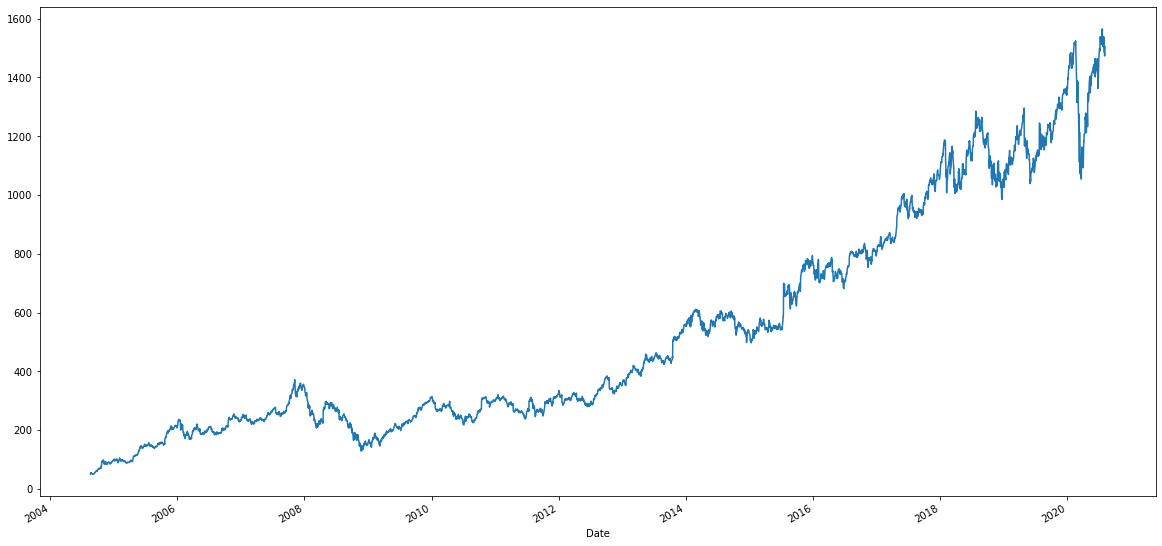

In [5]:
#Plot of data 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
df['Adj Close'].plot(ax=ax)

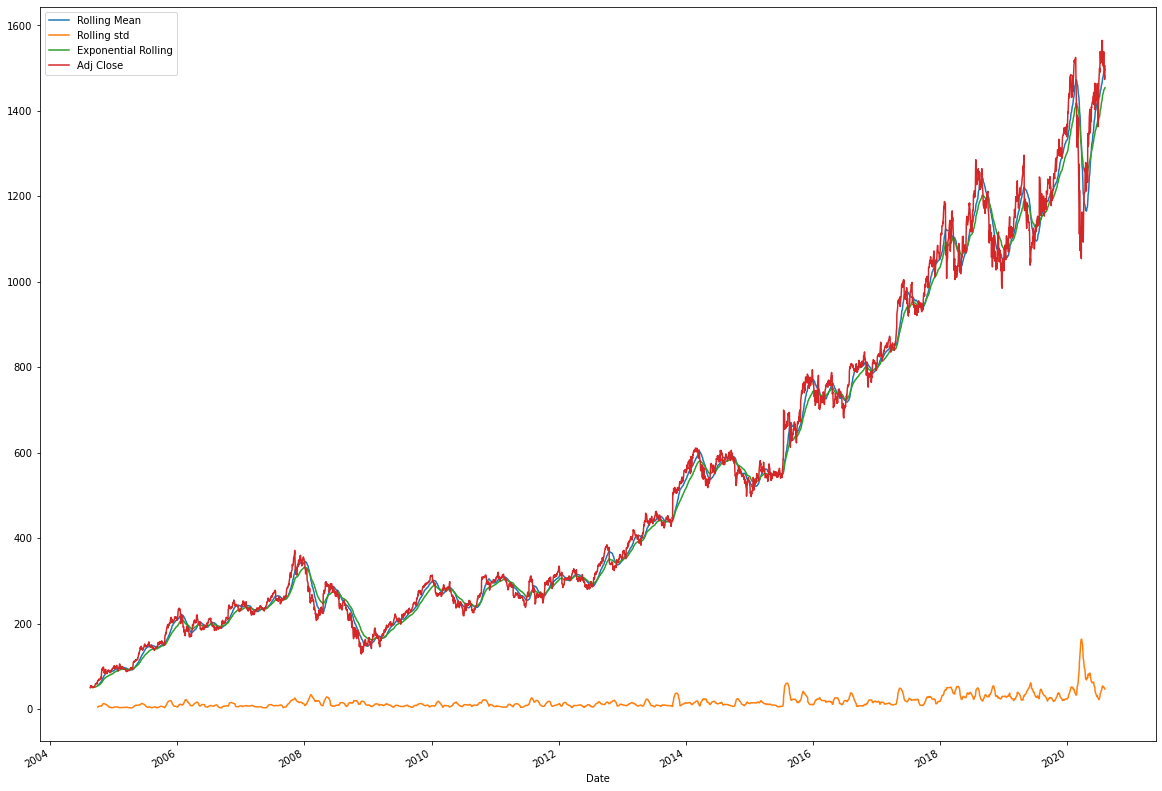

In [6]:
#Rolling data,std,mean and exponential rolling mean of data over a 30day period 
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
df['Adj Close'].rolling(30).mean().plot(ax=ax,label='Rolling Mean')
df['Adj Close'].rolling(30).std().plot(ax=ax,label='Rolling std')
df['Adj Close'].ewm(30,adjust=False).mean().plot(ax=ax,label='Exponential Rolling')
df['Adj Close'].plot(ax=ax,label='Adj Close')
plt.legend()

In [7]:
#Creating functions of indicators to add to data frame to check which ones are best for predicting future stock price

In [8]:
#normalizing
df['Open'] = df['Open']/df['Open'].iloc[0]-1
df['High'] = df['High']/df['High'].iloc[0]-1
df['Low'] = df['Low']/df['Low'].iloc[0]-1
df['Close'] = df['Close']/df['Close'].iloc[0]-1
df['Adj Close'] = df['Adj Close']/df['Adj Close'].iloc[0]-1
df['Volume'] = df['Volume']/df['Volume'].iloc[0]-1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017A485E50D0>,
      dtype=object)

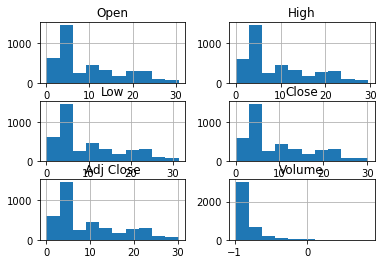

In [9]:
df.hist()

In [10]:
from ta.momentum import RSIIndicator,AwesomeOscillatorIndicator,KAMAIndicator,PercentagePriceOscillator,PercentageVolumeOscillator
from ta.momentum import ROCIndicator,StochRSIIndicator,StochasticOscillator,TSIIndicator,UltimateOscillator
from ta.momentum import WilliamsRIndicator

In [11]:
rsi_indicator = RSIIndicator(close=df['Adj Close'])
awesome_oscillator_indicator = AwesomeOscillatorIndicator(high=df['High'],low=df['Low'])
kama_indicator = KAMAIndicator(close=df['Adj Close'])
percentage_price_oscillator_indicator = PercentagePriceOscillator(close=df['Adj Close'])
percentage_volume_oscillator_indicator = PercentageVolumeOscillator(volume=df['Volume'])
roc_indicator = ROCIndicator(close=df['Adj Close'])
stoch_rsi_indicator = StochRSIIndicator(close=df['Adj Close'])
stoch_rsi_oscillator_indicator = StochasticOscillator(high=df['High'],low=df['Low'],close=df['Adj Close'])
tsi_indicator = TSIIndicator(close=df['Adj Close'])
ultimate_oscillator_indicator = UltimateOscillator(high=df['High'],low=df['Low'],close=df['Adj Close'])
williams_r_indicator = WilliamsRIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'])

In [12]:
df['RSI'] = rsi_indicator.rsi()
df['Awesome Oscillator'] = awesome_oscillator_indicator.awesome_oscillator()
df['KAMA'] = kama_indicator.kama()
df['PPO'] = percentage_price_oscillator_indicator.ppo()
df['PVO'] = percentage_volume_oscillator_indicator.pvo()
df['ROC'] = roc_indicator.roc()
df['Stoch RSI In'] = stoch_rsi_indicator.stochrsi()
df['Stoch RSI OS'] = stoch_rsi_oscillator_indicator.stoch()
df['TSI'] = tsi_indicator.tsi()
df['Ult Osc'] = ultimate_oscillator_indicator.ultimate_oscillator()
df['Williams R'] = williams_r_indicator.williams_r() 

In [13]:
from ta.trend import MACD, ADXIndicator, AroonIndicator,CCIIndicator,DPOIndicator
from ta.trend import EMAIndicator,IchimokuIndicator,KSTIndicator,MassIndex,PSARIndicator
from ta.trend import STCIndicator,TRIXIndicator,VortexIndicator,WMAIndicator

In [14]:
macd_indicator = MACD(df['Adj Close'])
adx_indicator = ADXIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'])
aroon_indicator = AroonIndicator(close=df['Adj Close'])
cci_indicator = CCIIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'])
dpo_indicator = DPOIndicator(close=df['Adj Close'])
ema_indicator = EMAIndicator(close=df['Adj Close'])
ichimoku_indicator = IchimokuIndicator(high=df['High'],low=df['Low'])
kst_indicator = KSTIndicator(close=df['Adj Close'])
mass_indicator = MassIndex(high=df['High'],low=df['Low'])
psar_indicator = PSARIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'])
stc_indicator = STCIndicator(close=df['Adj Close'])
trix_indicator = TRIXIndicator(close=df['Adj Close'])
vortex_indicator = VortexIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'])
wma_indicator = WMAIndicator(close=df['Adj Close'])

In [15]:
df['MACD'] = macd_indicator.macd()
df['ADX'] = adx_indicator.adx()
df['Aroon'] = aroon_indicator.aroon_indicator()
df['CCI'] = cci_indicator.cci()
df['DPO'] = dpo_indicator.dpo()
df['EMA'] = ema_indicator.ema_indicator()
df['Ichimoku Base'] = ichimoku_indicator.ichimoku_base_line() 
df['Ichimoku CL'] = ichimoku_indicator.ichimoku_conversion_line()
df['KST'] = kst_indicator.kst()
df['MASS'] = mass_indicator.mass_index() 
df['PSAR'] = psar_indicator.psar()
df['STC'] = stc_indicator.stc()
df['TRIX'] = trix_indicator.trix() 
df['VI'] = vortex_indicator.vortex_indicator_diff()
df['WMA'] = wma_indicator.wma()

C:\Users\Jonat\anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\Jonat\anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [16]:
from ta.volatility import BollingerBands,AverageTrueRange,DonchianChannel,KeltnerChannel,UlcerIndex

In [17]:
bollinger_band_indicator = BollingerBands(close=df['Adj Close'])
average_true_range_indicator = AverageTrueRange(high=df['High'],low=df['Low'],close=df['Adj Close'])
donchain_channel_indicator = DonchianChannel(high=df['High'],low=df['Low'],close=df['Adj Close'])
keltner_channel_indicator = KeltnerChannel(high=df['High'],low=df['Low'],close=df['Adj Close'])
ulcer_indicator = UlcerIndex(close=df['Adj Close'])

In [18]:
df['Bollinger Avg'] = bollinger_band_indicator.bollinger_mavg()
df['Bollinger High'] = bollinger_band_indicator.bollinger_hband()
df['Bollinger Low'] = bollinger_band_indicator.bollinger_lband()
df['ATR'] = average_true_range_indicator.average_true_range()
df['Donchain Mid'] = donchain_channel_indicator.donchian_channel_mband()
df['Donchain High'] = donchain_channel_indicator.donchian_channel_hband()
df['Donchain Low'] = donchain_channel_indicator.donchian_channel_lband()
df['Keltner Mid'] = keltner_channel_indicator.keltner_channel_mband()
df['Keltner High'] = keltner_channel_indicator.keltner_channel_hband()
df['Keltner Low'] = keltner_channel_indicator.keltner_channel_lband()
df['Ulcer'] = ulcer_indicator.ulcer_index()

In [19]:
from ta.volume import OnBalanceVolumeIndicator,AccDistIndexIndicator,ChaikinMoneyFlowIndicator,EaseOfMovementIndicator,ForceIndexIndicator
from ta.volume import MFIIndicator,NegativeVolumeIndexIndicator,VolumePriceTrendIndicator,VolumeWeightedAveragePrice

In [20]:
on_balance_volume_indicator = OnBalanceVolumeIndicator(close=df['Adj Close'],volume=df['Volume'])
acc_dist_indicator_indicator = AccDistIndexIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'],volume=df['Volume'])
chaikin_money_flow_indicator = ChaikinMoneyFlowIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'],volume=df['Volume'])
ease_movement_indicator = EaseOfMovementIndicator(high=df['High'],low=df['Low'],volume=df['Volume'])
rorce_index_indicator = ForceIndexIndicator(close=df['Adj Close'],volume=df['Volume'])
mfi_indicator = MFIIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'],volume=df['Volume'])
nvi_indicator = NegativeVolumeIndexIndicator(close=df['Adj Close'],volume=df['Volume'])
vpt_indicator = VolumePriceTrendIndicator(close=df['Adj Close'],volume=df['Volume'])
vwap_indicator = VolumeWeightedAveragePrice(high=df['High'],low=df['Low'],close=df['Adj Close'],volume=df['Volume'])

In [21]:
df['OBV'] = on_balance_volume_indicator.on_balance_volume() 
df['ADI'] = acc_dist_indicator_indicator.acc_dist_index()
df['CMF'] = chaikin_money_flow_indicator.chaikin_money_flow()
df['EoM'] = ease_movement_indicator.ease_of_movement()
df['FI'] = rorce_index_indicator.force_index()
df['MFI'] = mfi_indicator.money_flow_index()
#df['NVI'] = nvi_indicator.negative_volume_index()
df['VPT'] = vpt_indicator.volume_price_trend()
df['VWAP'] = vwap_indicator.volume_weighted_average_price()

In [22]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,RSI,Awesome Oscillator,KAMA,PPO,...,Keltner Low,Ulcer,OBV,ADI,CMF,EoM,FI,MFI,VPT,VWAP
Date,,,,,,,,,,,,,,,,,,,,,
2004-08-19,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,-inf,NaN
2004-08-20,0.0101,0.048241,0.047311,0.079430,0.079430,-0.488697,NaN,NaN,NaN,NaN,...,0.028699,NaN,-0.488697,-33.267577,NaN,-9091.693754,NaN,NaN,-inf,NaN
2004-08-23,0.1075,0.090525,0.136411,0.090293,0.090293,-0.591211,NaN,NaN,NaN,NaN,...,0.069676,NaN,-1.079908,-33.864758,NaN,509858.033987,NaN,NaN,-inf,NaN
2004-08-24,0.1124,0.072458,0.079304,0.045147,0.045147,-0.658584,NaN,NaN,NaN,NaN,...,0.070377,NaN,-0.421324,-39.778292,NaN,-39070.095641,NaN,NaN,0.248436,NaN
2004-08-25,0.0496,0.037863,0.082534,0.056408,0.056408,-0.794250,NaN,NaN,NaN,NaN,...,0.077023,NaN,-1.215574,-39.913075,NaN,-88204.041635,NaN,NaN,0.131167,NaN


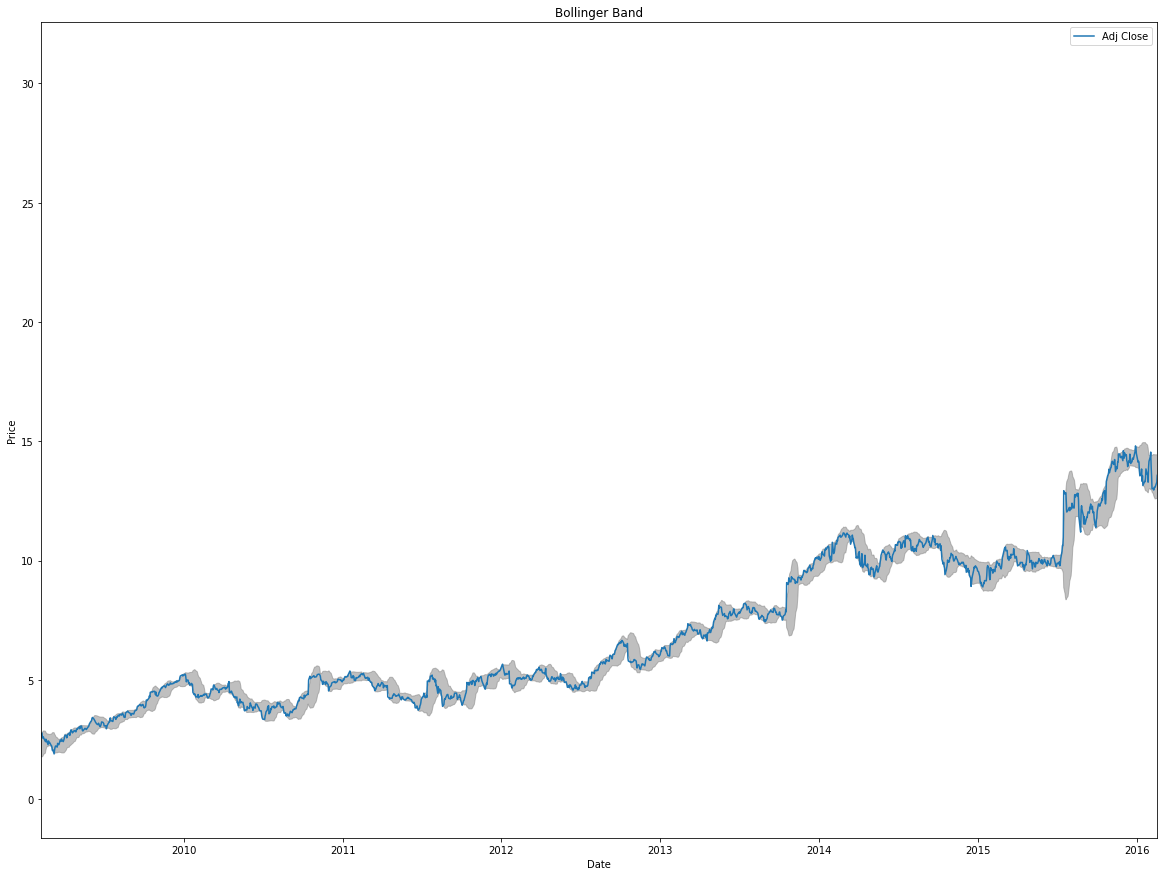

In [23]:
#Plotting Bollinger Band 
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
x_axis = df.index
plt.fill_between(x_axis,df['Bollinger High'],df['Bollinger Low'],color='grey',alpha=.5)
ax.plot(x_axis,df['Adj Close'],label='Adj Close')
ax.set_title('Bollinger Band')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.xaxis.zoom(3)
ax.legend()

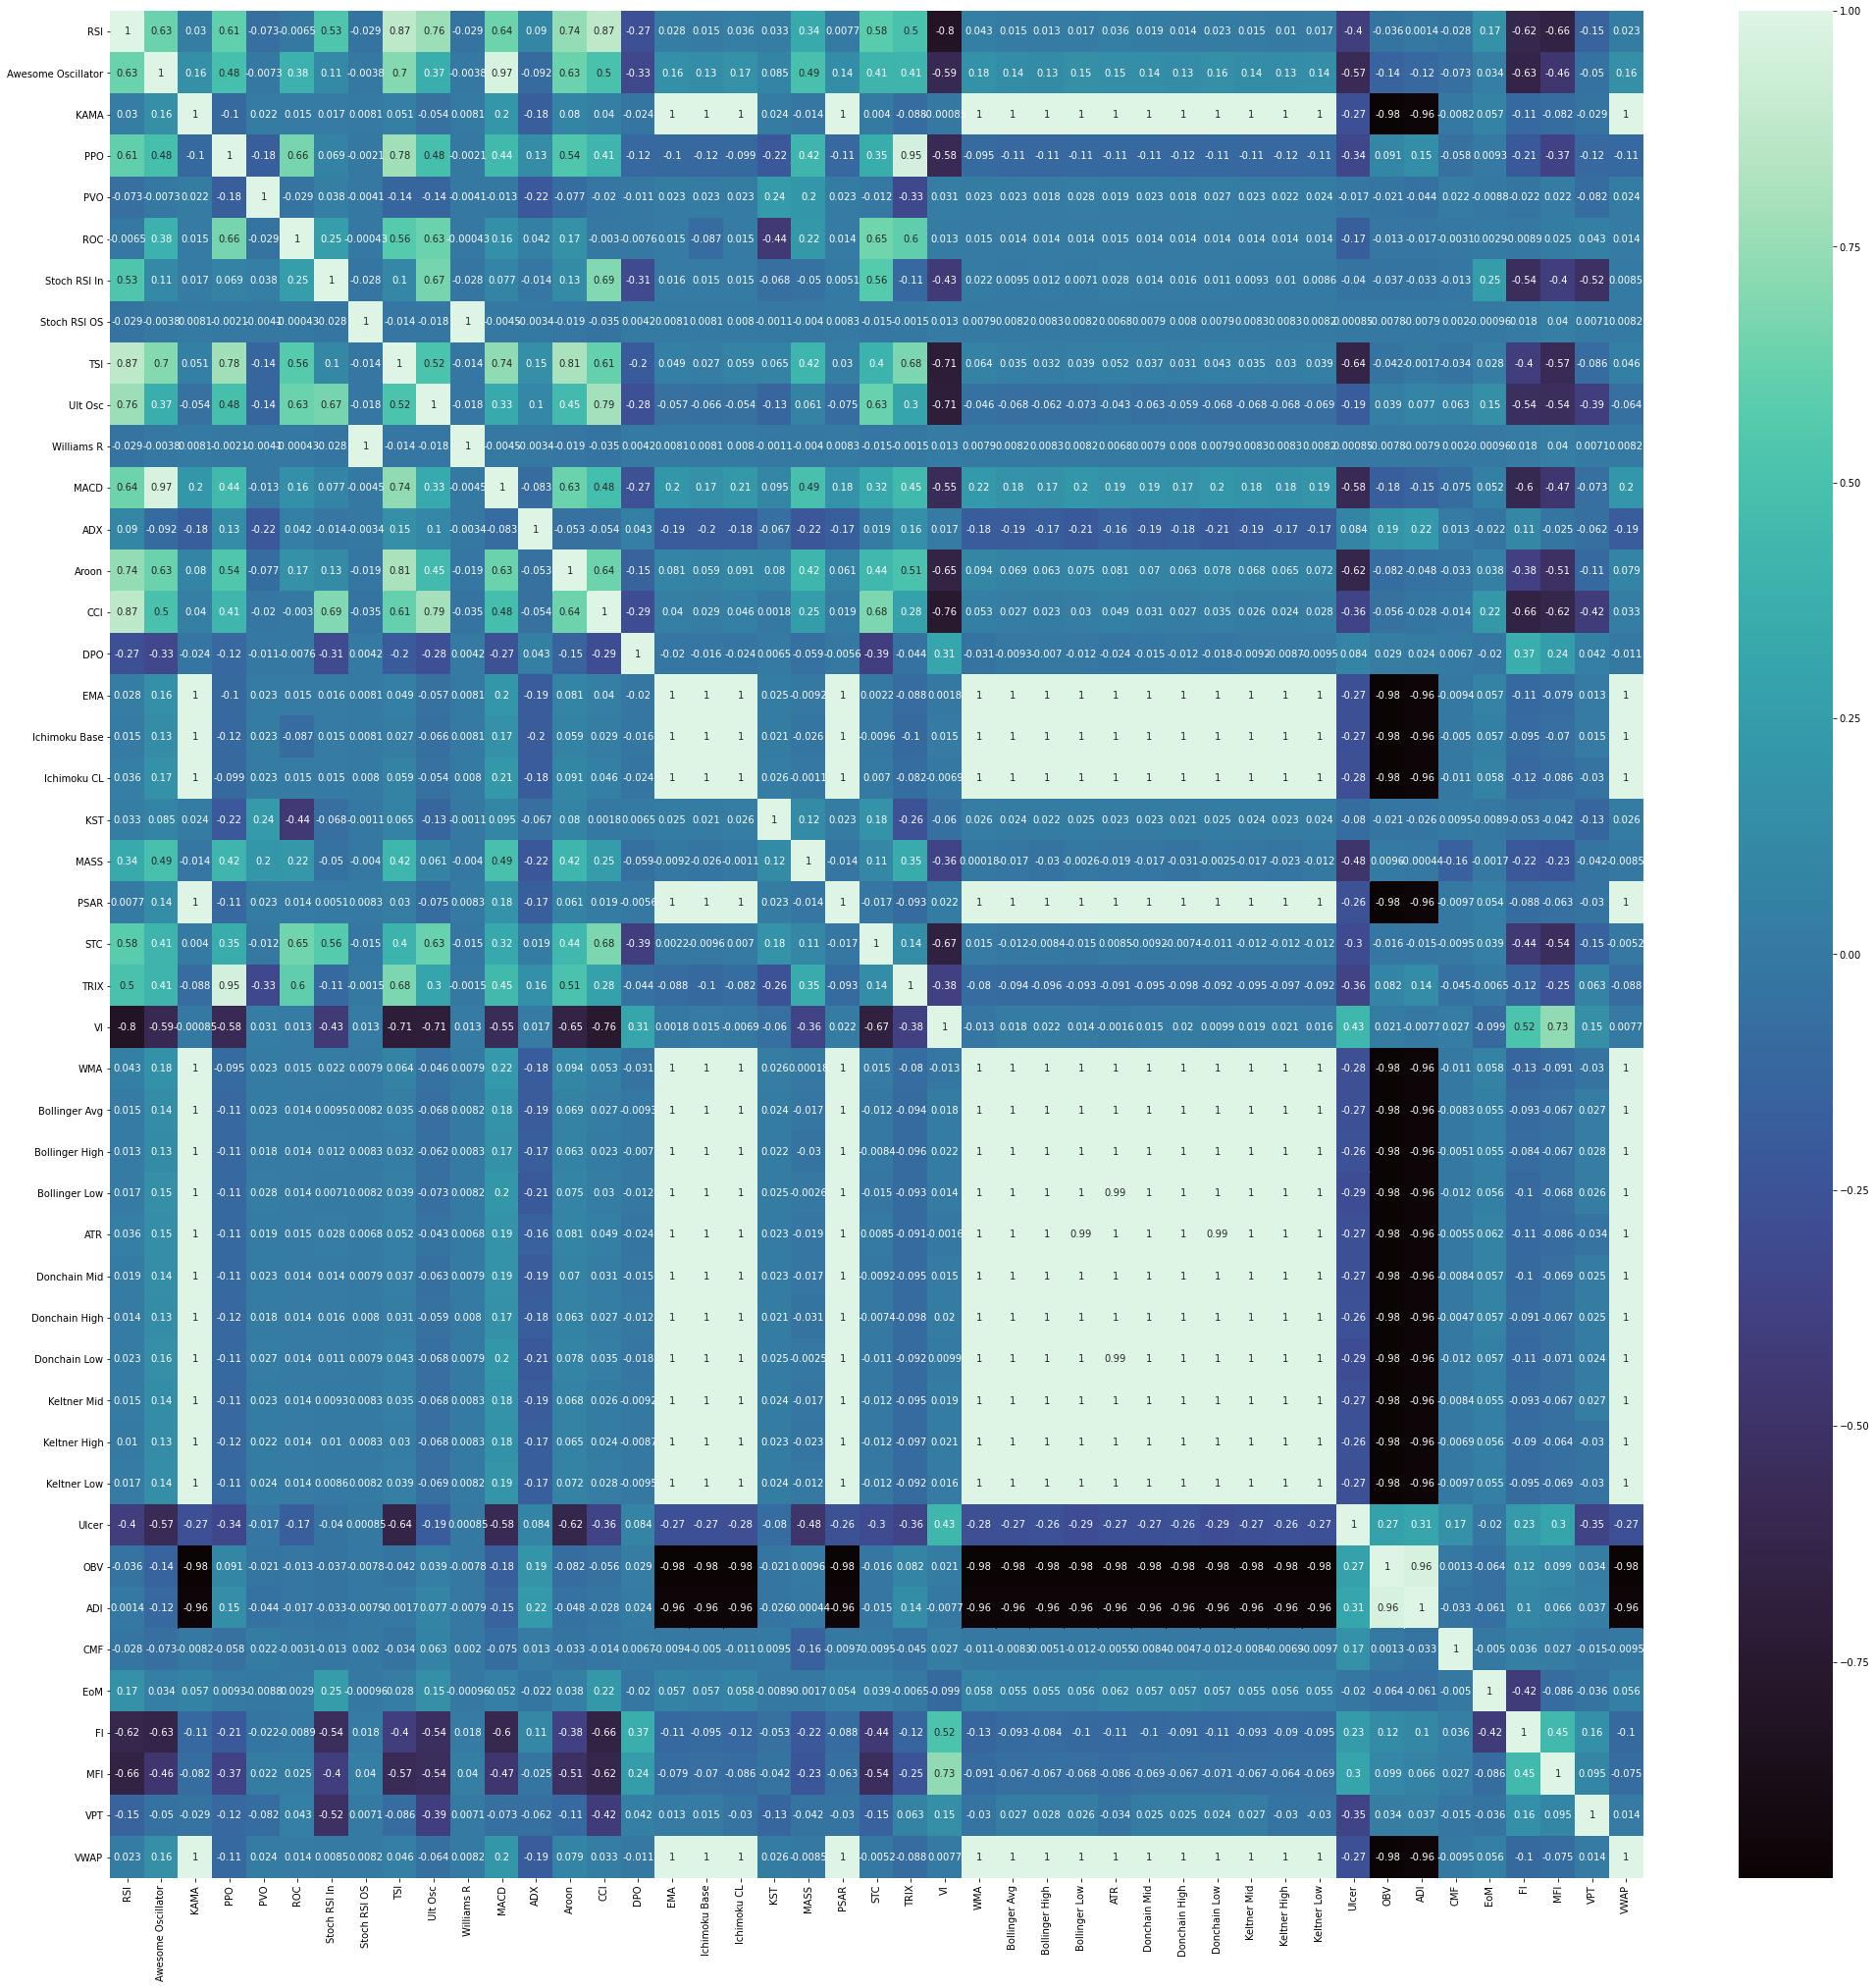

In [24]:
#Checking Corr
fig, ax = plt.subplots(figsize=(35,35))
sns.heatmap(df.drop(columns=['Open','Close','High','Low','Adj Close','Volume']).corr(),annot=True,cmap='mako')

In [25]:
#We will be predicting the next day price. We are shifting the data by 1 day
df['Adj Close Shift'] = df['Adj Close'].shift(-1)
df.dropna(inplace=True)

In [26]:
#Checking data before we split it into training and testing 
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3948 entries, 2004-11-30 to 2020-08-05
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Open                3948 non-null   float64
 1   High                3948 non-null   float64
 2   Low                 3948 non-null   float64
 3   Close               3948 non-null   float64
 4   Adj Close           3948 non-null   float64
 5   Volume              3948 non-null   float64
 6   RSI                 3948 non-null   float64
 7   Awesome Oscillator  3948 non-null   float64
 8   KAMA                3948 non-null   float64
 9   PPO                 3948 non-null   float64
 10  PVO                 3948 non-null   float64
 11  ROC                 3948 non-null   float64
 12  Stoch RSI In        3948 non-null   float64
 13  Stoch RSI OS        3948 non-null   float64
 14  TSI                 3948 non-null   float64
 15  Ult Osc             3948 non-null   f

,Open,High,Low,Close,Adj Close,Volume,RSI,Awesome Oscillator,KAMA,PPO,...,Ulcer,OBV,ADI,CMF,EoM,FI,MFI,VPT,VWAP,Adj Close Shift
Date,,,,,,,,,,,,,,,,,,,,,
2004-11-30,0.8071,0.758601,0.878387,0.813634,0.813634,-0.655510,59.376760,0.042434,0.784841,6.046950,...,20.190168,-11.962288,-49.817761,1.093280,265281.248044,-0.007233,32.974943,-0.018531,0.749826,0.793502
2004-12-01,0.8195,0.753796,0.871092,0.793502,0.793502,-0.648169,57.383357,0.055695,0.785235,6.008174,...,18.658772,-11.314118,-50.027104,1.071035,-109481.022346,-0.004335,35.389875,0.008484,0.761480,0.787921
2004-12-02,0.7990,0.744282,0.860671,0.787921,0.787921,-0.719895,56.813906,0.054463,0.785343,5.844640,...,18.383068,-10.594223,-50.207165,0.958414,-161147.110625,-0.003142,44.977180,0.021101,0.764710,0.797887
2004-12-03,0.7995,0.739958,0.850771,0.797887,0.797887,-0.737419,57.622635,0.047340,0.786927,5.749704,...,18.016088,-11.331642,-50.173588,0.885322,-106877.228776,-0.003743,52.993616,-0.004264,0.765764,0.756926
2004-12-06,0.7913,0.736498,0.834306,0.756926,0.756926,-0.720204,53.212079,0.033839,0.785627,5.180134,...,17.841905,-10.611438,-50.592947,0.533645,-135294.513831,0.001006,61.764353,0.027645,0.761983,0.708491


In [27]:
#Spliting the dta into training and testing
#X_train = df.drop(columns=['Adj Close Shift','Adj Close','Open','High','Low','Close','Volume']).loc['2004-09-24':'2015-11-06']
#X_test = df.drop(columns=['Adj Close Shift','Adj Close','Open','High','Low','Close','Volume']).loc['2015-11-07':'2020-08-05']
#y_train = df['Adj Close Shift'].loc['2004-09-24':'2015-11-06']
#y_test = df['Adj Close Shift'].loc['2015-11-07':'2020-08-05']

In [28]:
#Spliting the dta into training and testing
X = df.drop(columns=['Adj Close Shift','Open','High','Low','Close','Volume'])
y = df['Adj Close Shift']
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
y_train = y[:int(X.shape[0]*0.7)]
y_test = y[int(X.shape[0]*0.7):]

In [29]:
X_train_columns= X_train.columns
X_train_columns

Index(['Adj Close', 'RSI', 'Awesome Oscillator', 'KAMA', 'PPO', 'PVO', 'ROC',
       'Stoch RSI In', 'Stoch RSI OS', 'TSI', 'Ult Osc', 'Williams R', 'MACD',
       'ADX', 'Aroon', 'CCI', 'DPO', 'EMA', 'Ichimoku Base', 'Ichimoku CL',
       'KST', 'MASS', 'PSAR', 'STC', 'TRIX', 'VI', 'WMA', 'Bollinger Avg',
       'Bollinger High', 'Bollinger Low', 'ATR', 'Donchain Mid',
       'Donchain High', 'Donchain Low', 'Keltner Mid', 'Keltner High',
       'Keltner Low', 'Ulcer', 'OBV', 'ADI', 'CMF', 'EoM', 'FI', 'MFI', 'VPT',
       'VWAP'],
      dtype='object')

In [30]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler().fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

LM Train R-Squared: 0.9983933628082344
LM Test R-Squared: 0.9926314135042422
LM Mean Absolute Error: 0.2377038519290828


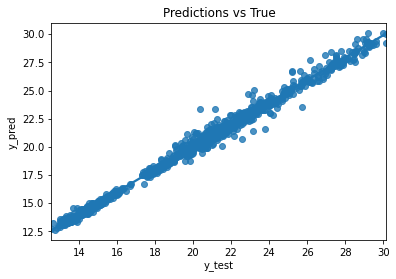

In [31]:
#OLS Linear Model
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
rModel = linear_model.LinearRegression()
rModel.fit(X_train,y_train)
y_pred = rModel.predict(X_test)
#R-Squared coefficent
train_score = rModel.score(X_train,y_train)
test_score = rModel.score(X_test,y_test)
print('LM Train R-Squared:',train_score)
print('LM Test R-Squared:',test_score)
#check to see how prediction repersnt true results
#plt.scatter(y_test,y_pred)
sns.regplot(x=y_test,y=y_pred)
plt.title('Predictions vs True')
plt.xlabel('y_test')
plt.ylabel('y_pred')
lm_mean_abs_error = mean_absolute_error(y_test,y_pred)
print('LM Mean Absolute Error:',lm_mean_abs_error)

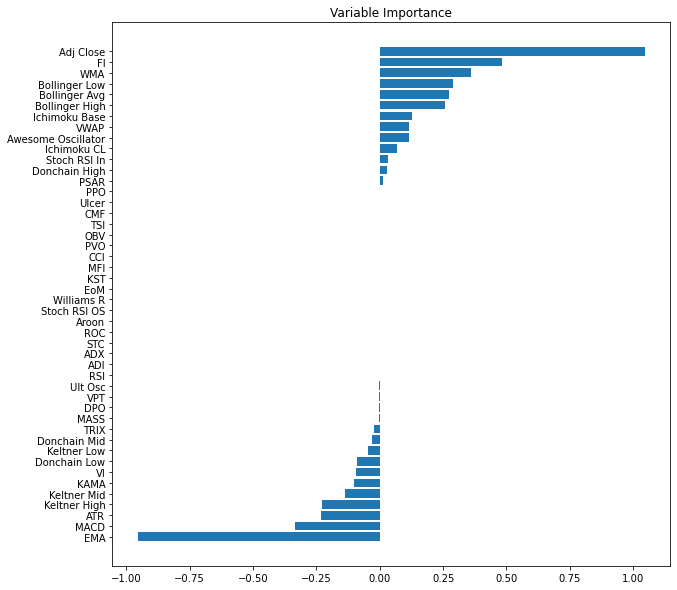

In [32]:
#Feature Importance
lm_imp = rModel.coef_
sorted_idx = np.argsort(lm_imp)
num_features = np.arange(sorted_idx.shape[0])

plt.figure(figsize=(10,10))
plt.barh(num_features,lm_imp[sorted_idx],align='center')
plt.yticks(num_features, X_train_columns[sorted_idx])
#plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.59207e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge Train R-Squared: 0.9983856696846353
Ridge Test R-Squared: 0.9927257007080004
Ridge Mean Absolute Error: 0.2371861397572631


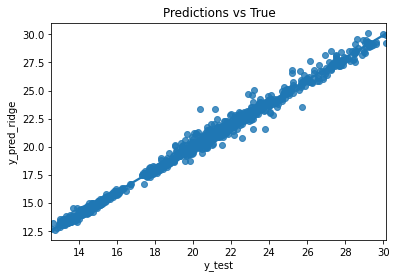

In [33]:
#Ridge Model
ridge_model = linear_model.Ridge()
ridge_model.fit(X_train,y_train)
y_pred_ridge = ridge_model.predict(X_test)
#R-Squared coefficent
ridge_train_score = ridge_model.score(X_train,y_train)
ridge_test_score = ridge_model.score(X_test,y_test)
print('Ridge Train R-Squared:',ridge_train_score)
print('Ridge Test R-Squared:',ridge_test_score )
sns.regplot(x=y_test,y=y_pred_ridge)
plt.title('Predictions vs True')
plt.xlabel('y_test')
plt.ylabel('y_pred_ridge')
ridge_mean_abs_error = mean_absolute_error(y_test,y_pred_ridge)
print('Ridge Mean Absolute Error:',ridge_mean_abs_error)


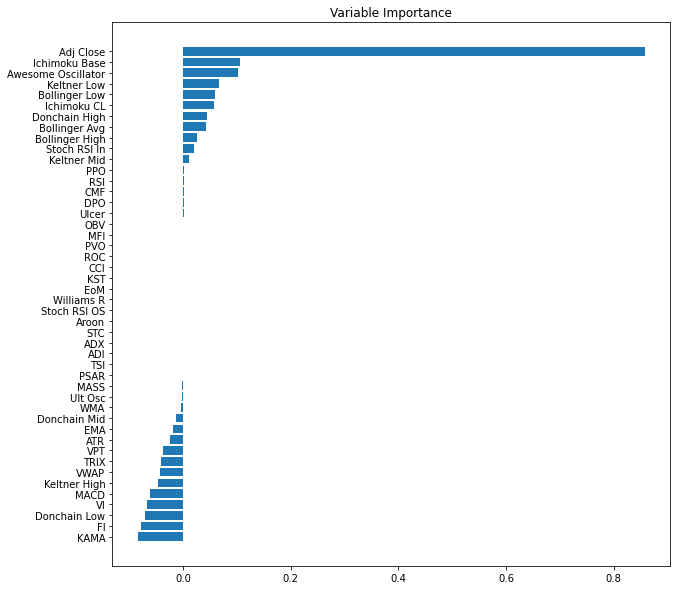

In [34]:
#Feature Importance
ridge_imp = ridge_model.coef_
sorted_idx = np.argsort(ridge_imp)
num_features = np.arange(sorted_idx.shape[0])

plt.figure(figsize=(10,10))
plt.barh(num_features,ridge_imp[sorted_idx],align='center')
plt.yticks(num_features, X_train_columns[sorted_idx])
#plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Lasso Train R-Squared: 0.913948981521695
Lasso Test R-Squared: -0.3854120610184244
Lasso Mean Absolute Error: 4.637576455295026


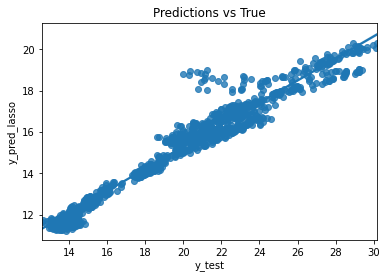

In [35]:
#Lasso Model
lasso_model = linear_model.Lasso()
lasso_model.fit(X_train,y_train)
y_pred_lasso = lasso_model.predict(X_test)
#R-Squared coefficent
lasso_train_score = lasso_model.score(X_train,y_train)
lasso_test_score = lasso_model.score(X_test,y_test)
print('Lasso Train R-Squared:',lasso_train_score)
print('Lasso Test R-Squared:',lasso_test_score)

sns.regplot(x=y_test,y=y_pred_lasso)
plt.title('Predictions vs True')
plt.xlabel('y_test')
plt.ylabel('y_pred_lasso')
lasso_mean_abs_error = mean_absolute_error(y_test,y_pred_lasso)
print('Lasso Mean Absolute Error:',lasso_mean_abs_error)

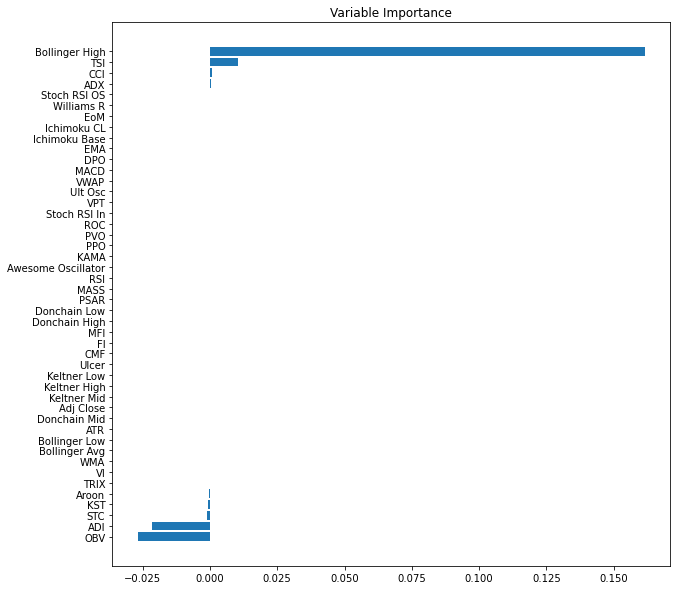

In [36]:
lasso_imp = lasso_model.coef_
sorted_idx = np.argsort(lasso_imp)
num_features = np.arange(sorted_idx.shape[0])

plt.figure(figsize=(10,10))
plt.barh(num_features,lasso_imp[sorted_idx],align='center')
plt.yticks(num_features, X_train_columns[sorted_idx])
#plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [37]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

mean_abs_error = mean_absolute_error(y_test,y_pred)
print('R^2 Train:',rfr.score(X_train,y_train))
print('R^2 Test:',rfr.score(X_test,y_test))
print('Mean Absolute Error:',mean_abs_error)

R^2 Train: 0.999750145284585
R^2 Test: -1.923017418013583
Mean Absolute Error: 0.2377038519290828


Text(0, 0.5, 'y_pred_rfr')

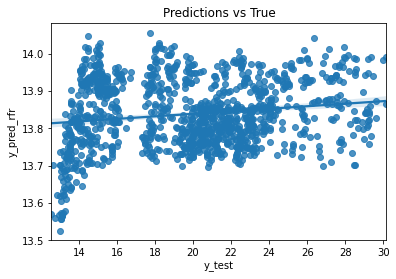

In [38]:
sns.regplot(x=y_test,y=y_pred_rfr)
plt.title('Predictions vs True')
plt.xlabel('y_test')
plt.ylabel('y_pred_rfr')

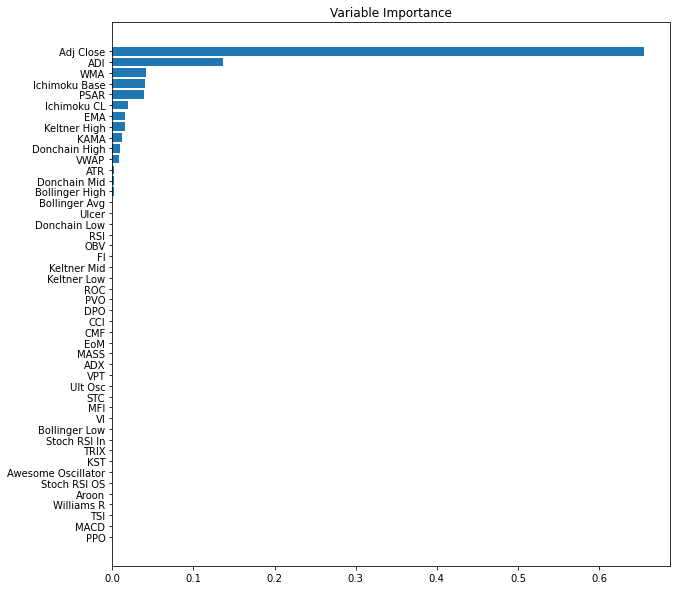

In [39]:
rfr_imp = rfr.feature_importances_
sorted_idx = np.argsort(rfr_imp)
num_features = np.arange(sorted_idx.shape[0])

plt.figure(figsize=(10,10))
plt.barh(num_features,rfr_imp[sorted_idx],align='center')
plt.yticks(num_features, X_train_columns[sorted_idx])
#plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Now we are going to make separate models for each Technical category and see which performs best and then see if mixing the best
does better

In [40]:
df_momentum = df[['Adj Close','Adj Close Shift','RSI','Awesome Oscillator','KAMA','PPO','PVO','ROC','Stoch RSI In','Stoch RSI OS','TSI','Ult Osc','Williams R']]

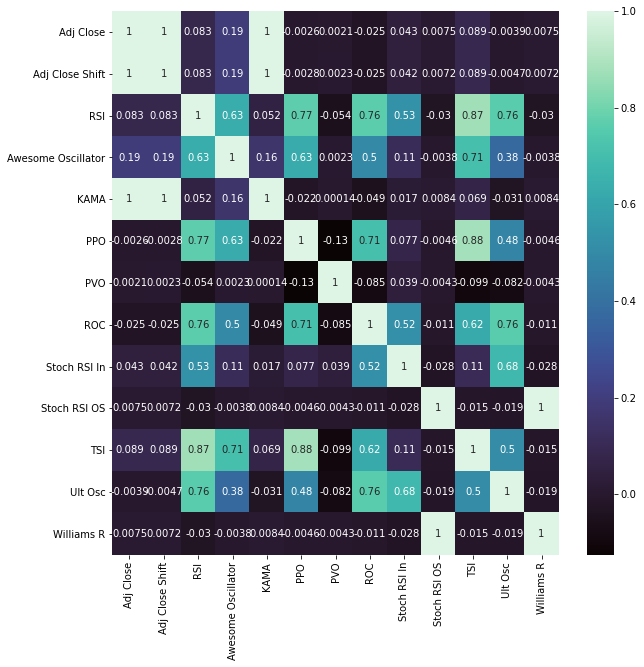

In [41]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_momentum.corr(),annot=True,cmap='mako')

In [42]:
#We can drop KAMA and Williams R as they have a perfect corr with other indicators
df_momentum.drop(columns=['KAMA','Williams R'],inplace=True)

C:\Users\Jonat\anaconda3\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [45]:
#Spliting the dta into training and testing
X = df_momentum.drop(columns=['Adj Close Shift'])
y = df_momentum['Adj Close Shift']
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
y_train = y[:int(X.shape[0]*0.7)]
y_test = y[int(X.shape[0]*0.7):]
X_train_columns= X_train.columns

LM Train R-Squared: 0.9955172610521512
LM Test R-Squared: 0.9889585343493142


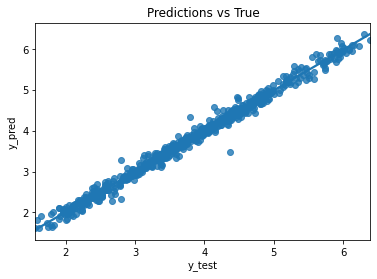

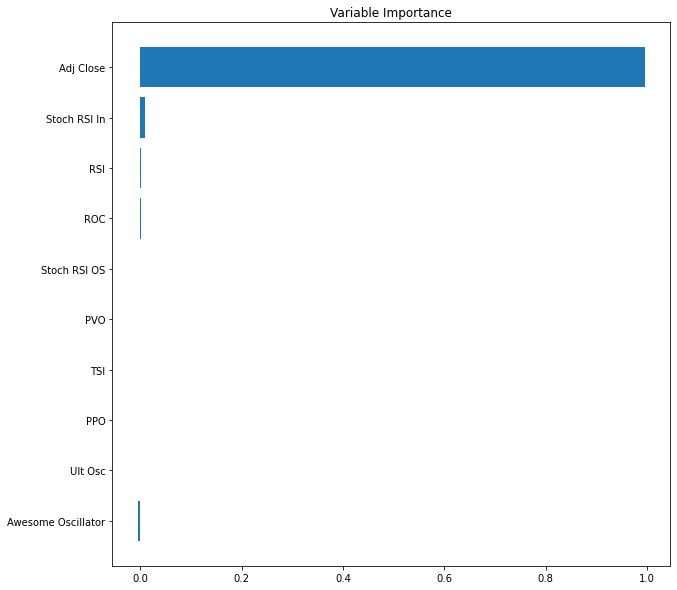

LM Train R-Squared: 0.9939997032556461
LM Test R-Squared: 0.9734431460879304


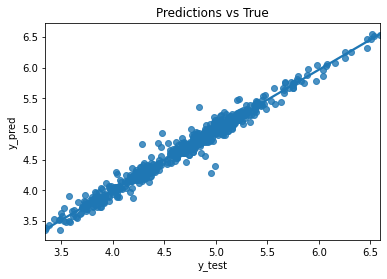

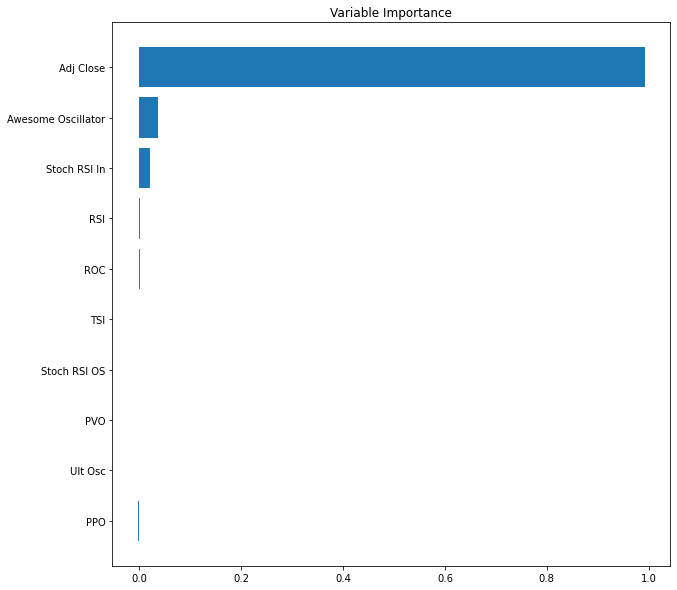

LM Train R-Squared: 0.9943220300265506
LM Test R-Squared: 0.992731329400182


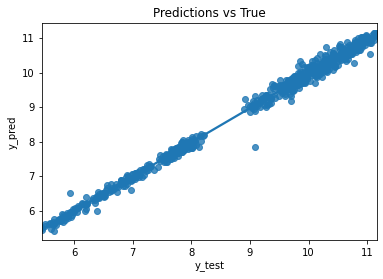

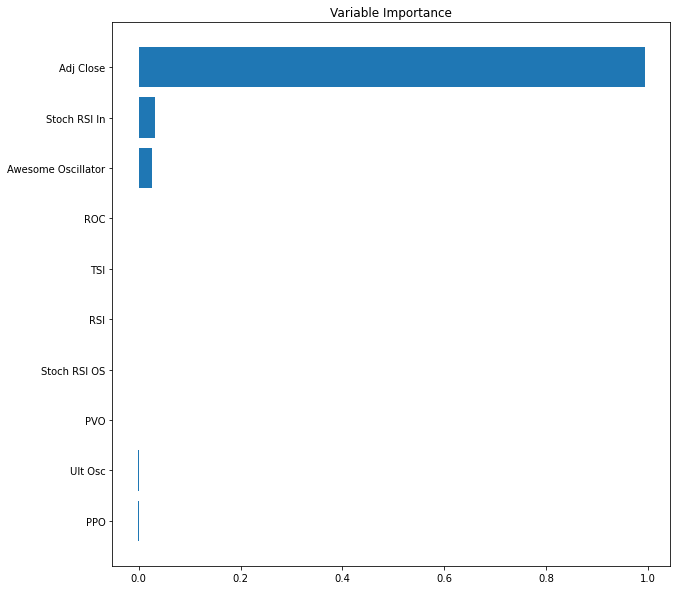

LM Train R-Squared: 0.9983473930070554
LM Test R-Squared: 0.9933025281620176


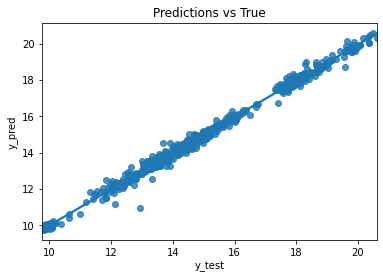

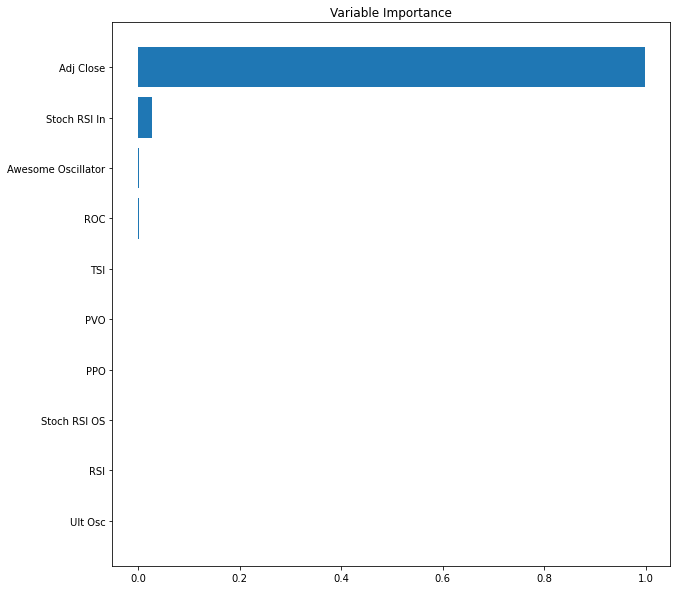

LM Train R-Squared: 0.9992301420453885
LM Test R-Squared: 0.9696776428032676


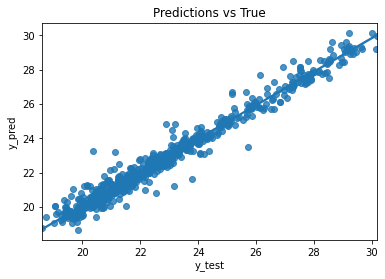

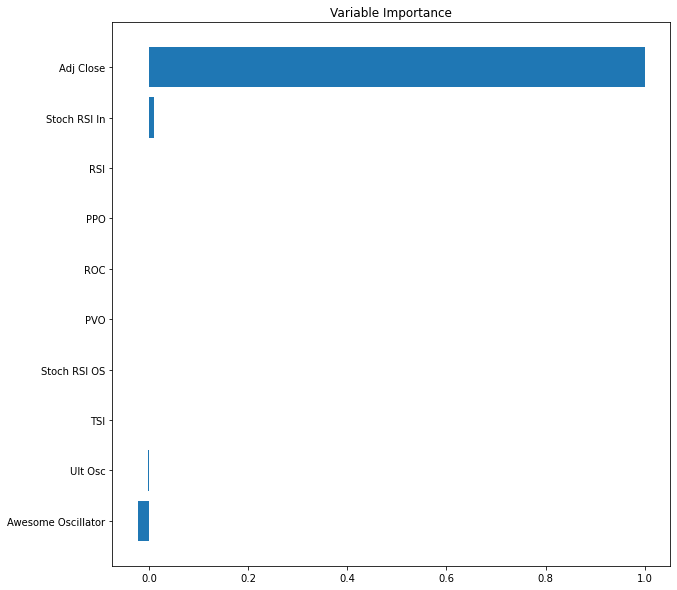

In [47]:
#OLS
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit()



for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    rModel = linear_model.LinearRegression()
    rModel.fit(X_tr,y_tr)
    y_pred = rModel.predict(X_ts)
    train_score = rModel.score(X_tr,y_tr)
    test_score = rModel.score(X_ts,y_ts)
    print('LM Train R-Squared:',train_score)
    print('LM Test R-Squared:',test_score)
    sns.regplot(x=y_ts,y=y_pred)
    plt.title('Predictions vs True')
    plt.xlabel('y_test')
    plt.ylabel('y_pred')
    plt.show()
    lm_imp = rModel.coef_
    sorted_idx = np.argsort(lm_imp)
    num_features = np.arange(sorted_idx.shape[0])
    plt.figure(figsize=(10,10))
    plt.barh(num_features,lm_imp[sorted_idx],align='center')
    plt.yticks(num_features, X_train_columns[sorted_idx])
    plt.title('Variable Importance')
    plt.show()


Alpha is: 0.1
Ridge Train R-Squared: 0.995517229161711
Ridge Test R-Squared: 0.9889627479557022


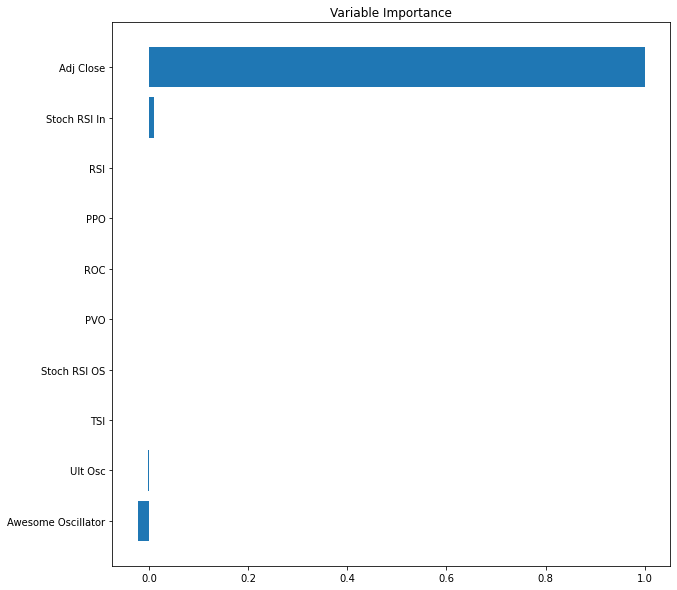

Alpha is: 1.0
Ridge Train R-Squared: 0.995514189008628
Ridge Test R-Squared: 0.988988929640431


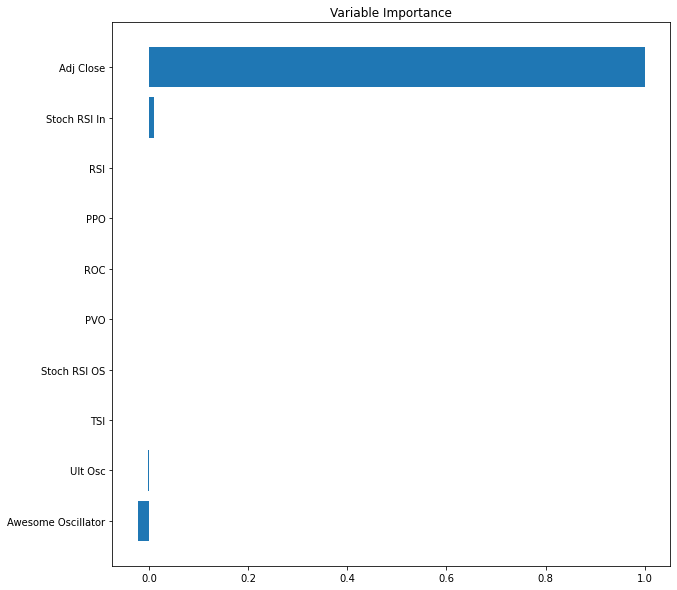

Alpha is: 10.0
Ridge Train R-Squared: 0.9952393644339426
Ridge Test R-Squared: 0.9884158715201856


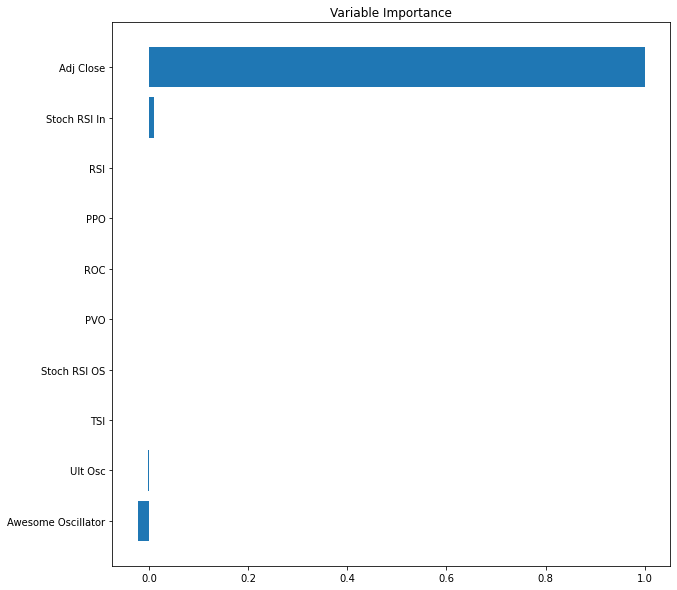

Alpha is: 0.1
Ridge Train R-Squared: 0.9939997001395751
Ridge Test R-Squared: 0.9734388448198583


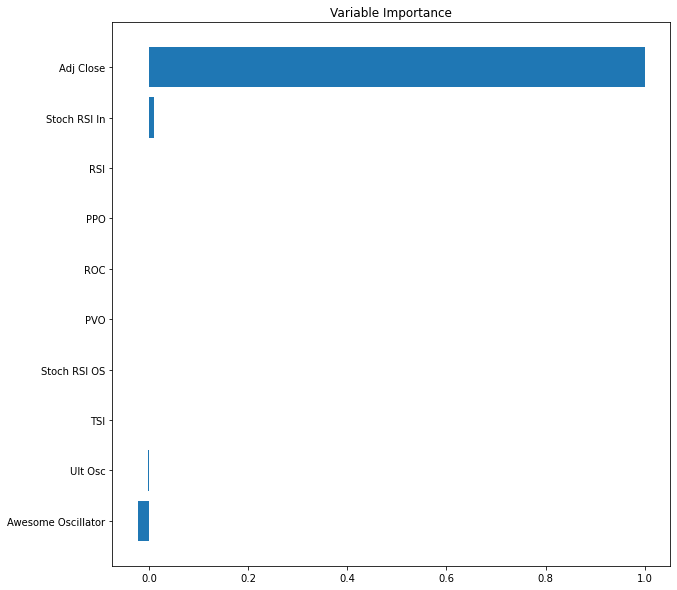

Alpha is: 1.0
Ridge Train R-Squared: 0.9939993931779538
Ridge Test R-Squared: 0.973397712239383


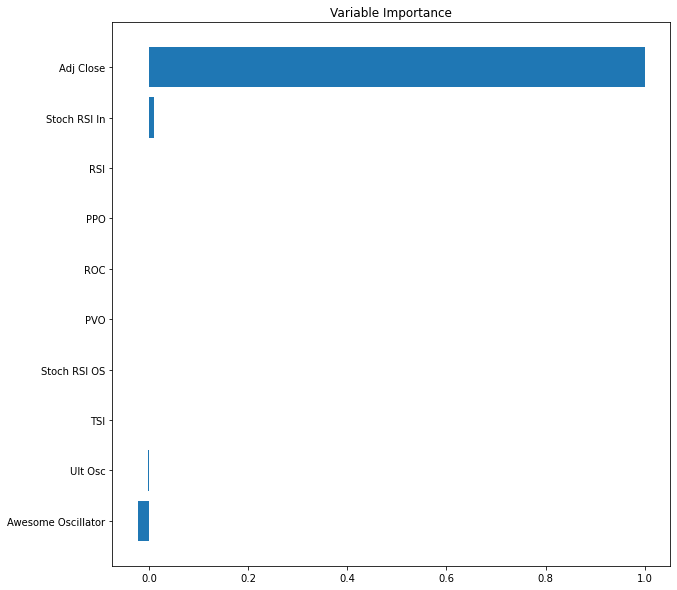

Alpha is: 10.0
Ridge Train R-Squared: 0.993969608558082
Ridge Test R-Squared: 0.9727592752951325


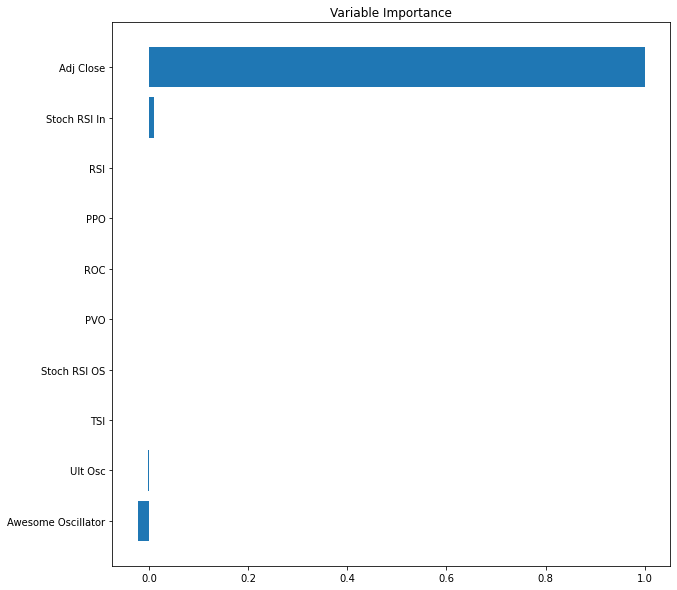

Alpha is: 0.1
Ridge Train R-Squared: 0.9943220288687175
Ridge Test R-Squared: 0.9927276422107871


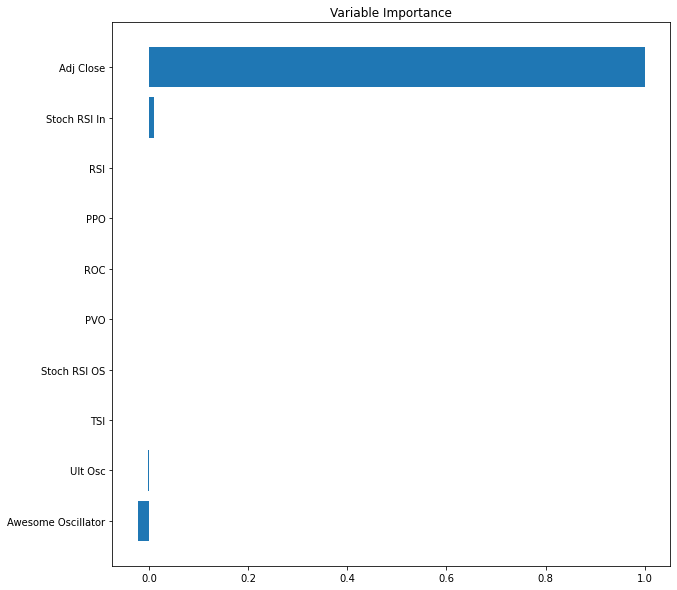

Alpha is: 1.0
Ridge Train R-Squared: 0.9943219144405199
Ridge Test R-Squared: 0.9926932957980356


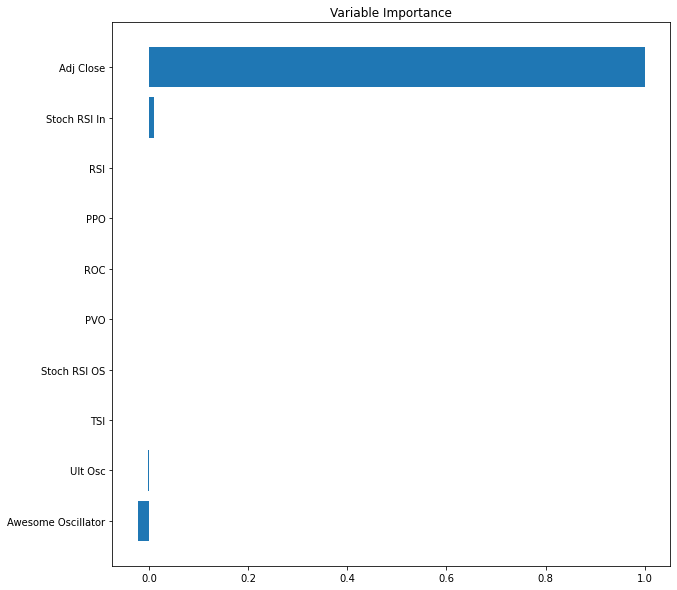

Alpha is: 10.0
Ridge Train R-Squared: 0.9943106340581457
Ridge Test R-Squared: 0.9922353015200385


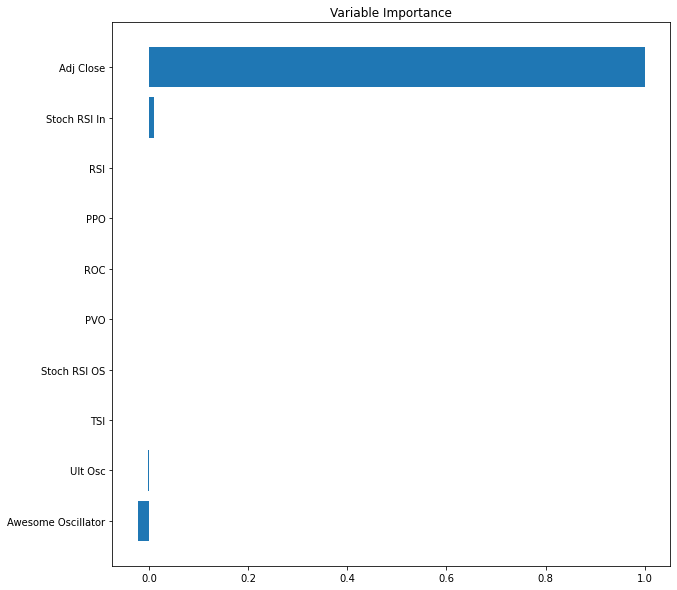

Alpha is: 0.1
Ridge Train R-Squared: 0.9983473929662633
Ridge Test R-Squared: 0.993302170064603


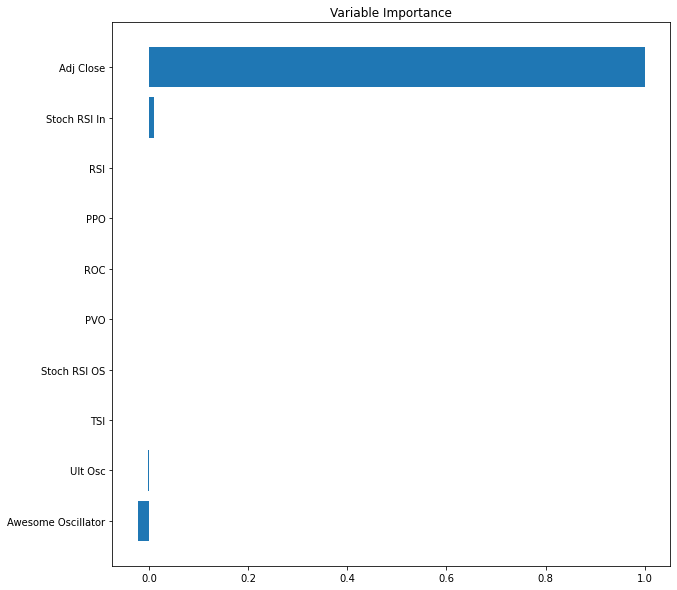

Alpha is: 1.0
Ridge Train R-Squared: 0.9983473889571322
Ridge Test R-Squared: 0.9932989013347036


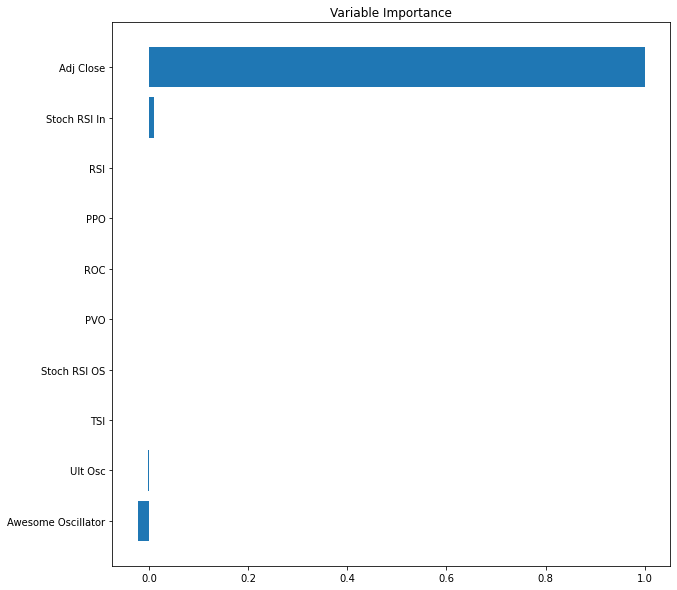

Alpha is: 10.0
Ridge Train R-Squared: 0.998347010483616
Ridge Test R-Squared: 0.9932616373754999


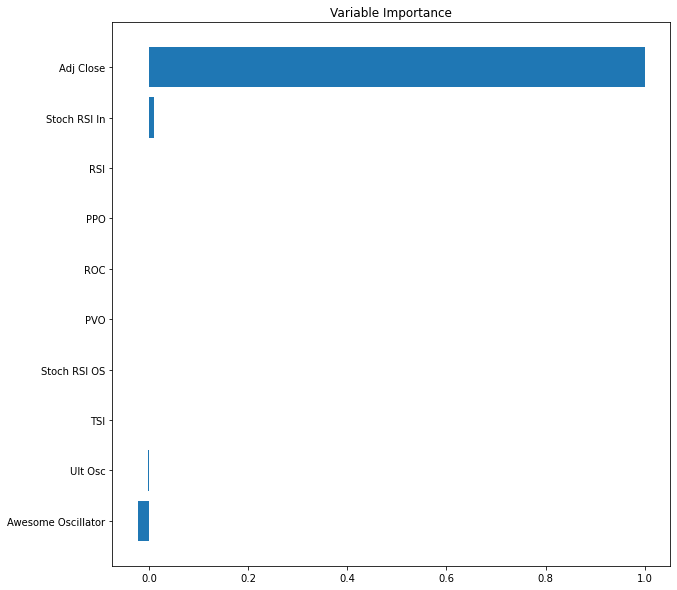

Alpha is: 0.1
Ridge Train R-Squared: 0.9992301420417239
Ridge Test R-Squared: 0.9696779138673114


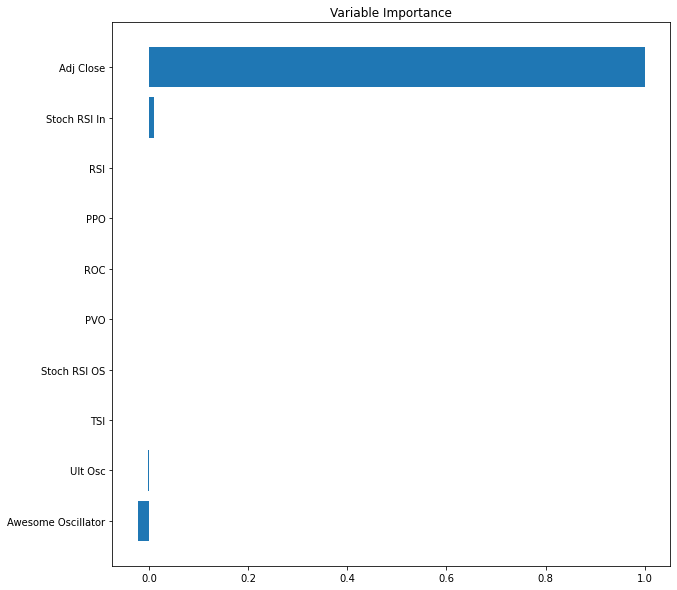

Alpha is: 1.0
Ridge Train R-Squared: 0.9992301416822771
Ridge Test R-Squared: 0.9696803084552525


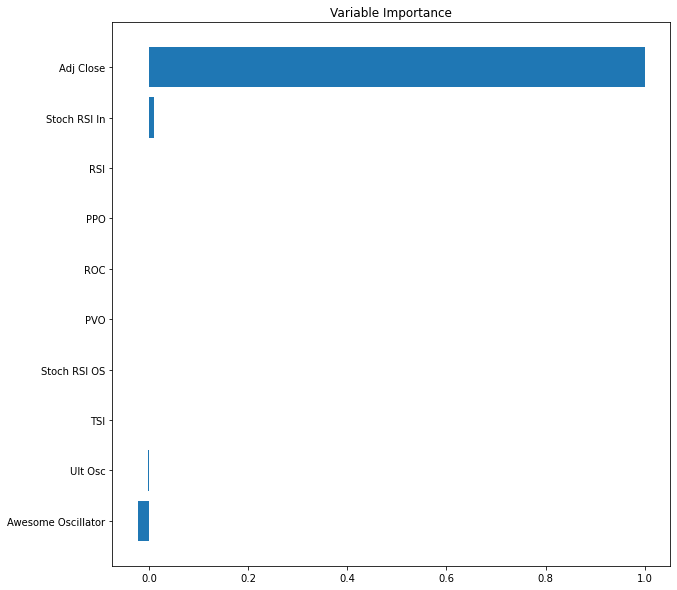

Alpha is: 10.0
Ridge Train R-Squared: 0.9992301086029449
Ridge Test R-Squared: 0.9697002816791733


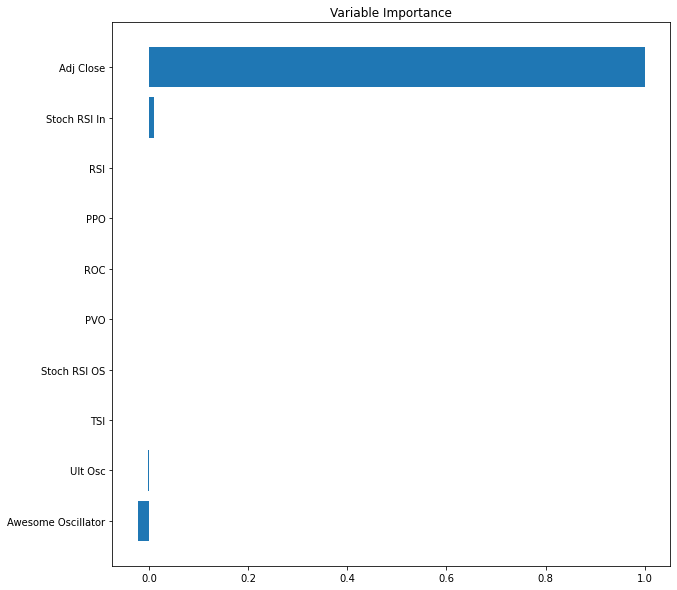

In [48]:
#Ridge Model

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    

    for alpha in [0.1, 1.0, 10.0]:
        print('Alpha is:',alpha)
        ridge_model = linear_model.Ridge(alpha)
        ridge_model.fit(X_tr,y_tr)
        ridge_train_score = ridge_model.score(X_tr,y_tr)
        ridge_test_score = ridge_model.score(X_ts,y_ts)
        print('Ridge Train R-Squared:',ridge_train_score)
        print('Ridge Test R-Squared:',ridge_test_score )
        lm_imp = rModel.coef_
        sorted_idx = np.argsort(lm_imp)
        num_features = np.arange(sorted_idx.shape[0])
        plt.figure(figsize=(10,10))
        plt.barh(num_features,lm_imp[sorted_idx],align='center')
        plt.yticks(num_features, X_train_columns[sorted_idx])
        plt.title('Variable Importance')
        plt.show()


rfr Train R-Squared: 0.9992533066149749
rfr Test R-Squared: 0.7836069068359732


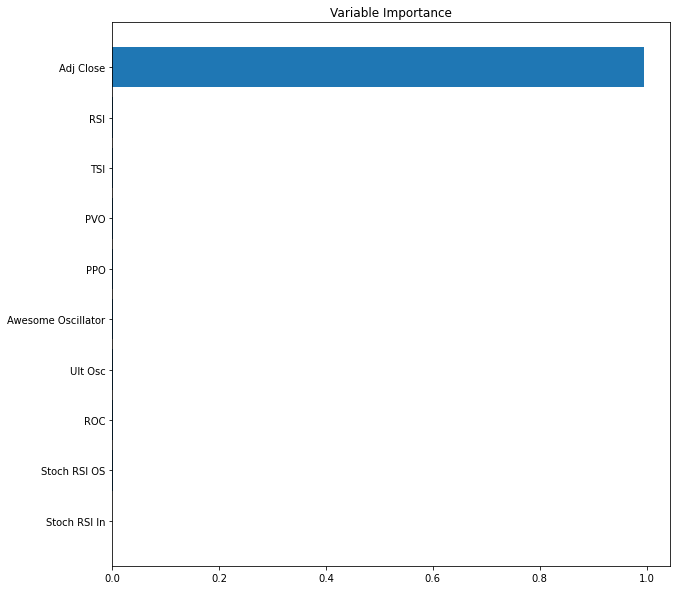

rfr Train R-Squared: 0.9990226504476527
rfr Test R-Squared: 0.9599653060909207


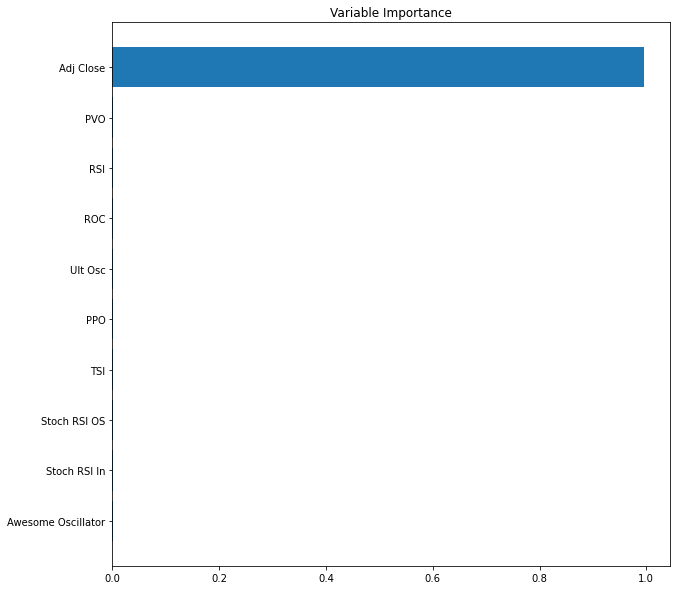

rfr Train R-Squared: 0.9990789146437794
rfr Test R-Squared: -2.3535120355225745


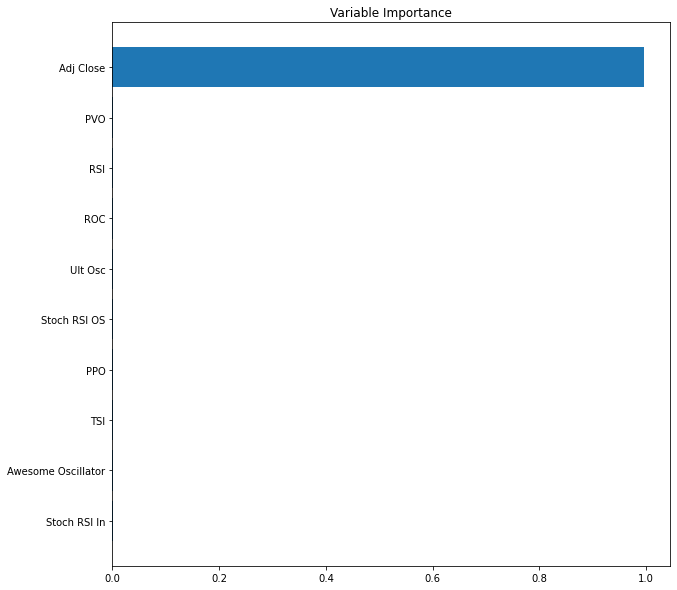

rfr Train R-Squared: 0.9997360842884888
rfr Test R-Squared: -2.5545737724641304


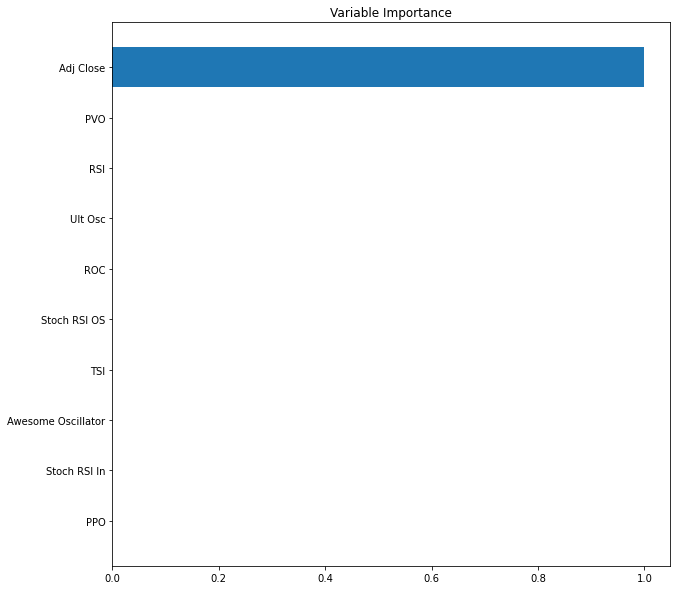

rfr Train R-Squared: 0.9998758011912003
rfr Test R-Squared: -1.2029235077719833


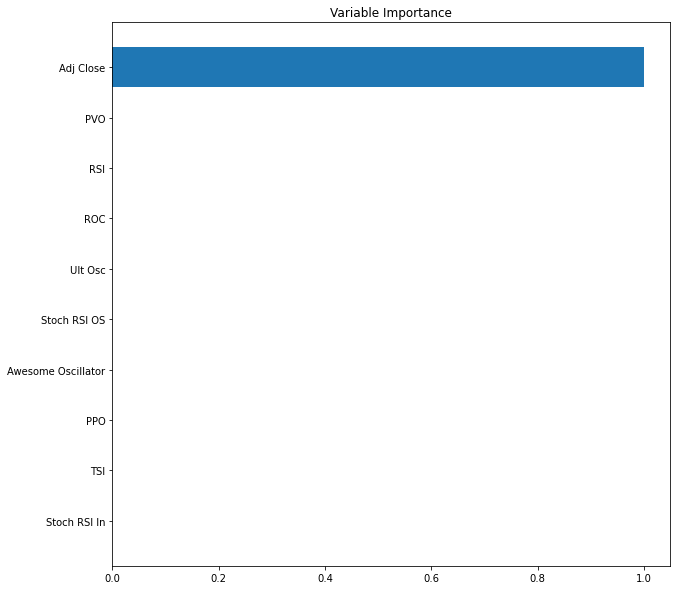

In [50]:
#Random Forest

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    
    rfr = RandomForestRegressor()
    rfr.fit(X_tr,y_tr)
    y_pred = rfr.predict(X_ts)
    train_score = rfr.score(X_tr,y_tr)
    test_score = rfr.score(X_ts,y_ts)
    print('rfr Train R-Squared:',train_score)
    print('rfr Test R-Squared:',test_score)

    rfr_imp = rfr.feature_importances_
    sorted_idx = np.argsort(rfr_imp)
    num_features = np.arange(sorted_idx.shape[0])
    plt.figure(figsize=(10,10))
    plt.barh(num_features,rfr_imp[sorted_idx],align='center')
    plt.yticks(num_features, X_train_columns[sorted_idx])
    plt.title('Variable Importance')
    plt.show()


In [51]:
df_trend = df[['Adj Close','Adj Close Shift','MACD','ADX','Aroon','CCI','DPO','EMA','Ichimoku Base','Ichimoku CL','KST','MASS','PSAR','STC','TRIX','VI','WMA']]

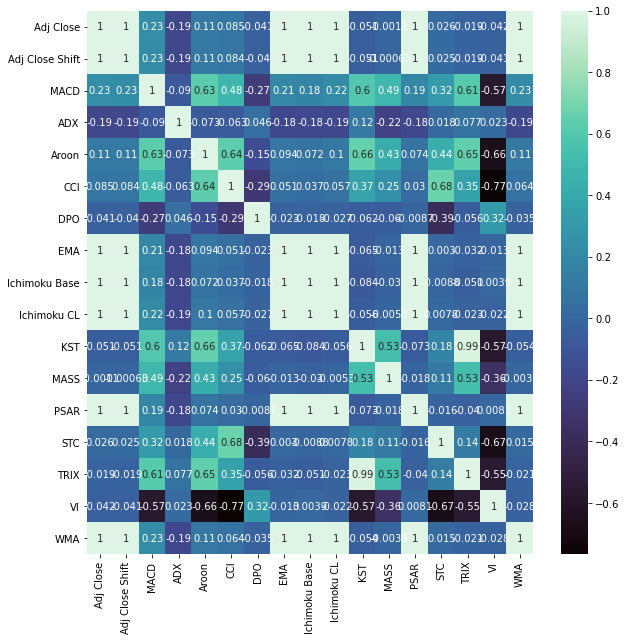

In [52]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_trend.corr(),annot=True,cmap='mako')

In [53]:
#We can drop Ichimoku Base, Ichimoku CL,EMA and PSAR as they have a perfect corr with other indicators
df_trend.drop(columns=['Ichimoku Base','Ichimoku CL','PSAR','EMA'],inplace=True)

C:\Users\Jonat\anaconda3\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [54]:
#Spliting the dta into training and testing
X = df_trend.drop(columns=['Adj Close Shift'])
y = df_trend['Adj Close Shift']
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
y_train = y[:int(X.shape[0]*0.7)]
y_test = y[int(X.shape[0]*0.7):]
X_train_columns = X_train.columns

LM Train R-Squared: 0.9954446203455785
LM Test R-Squared: 0.9887658613744629


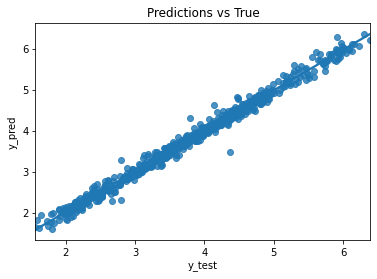

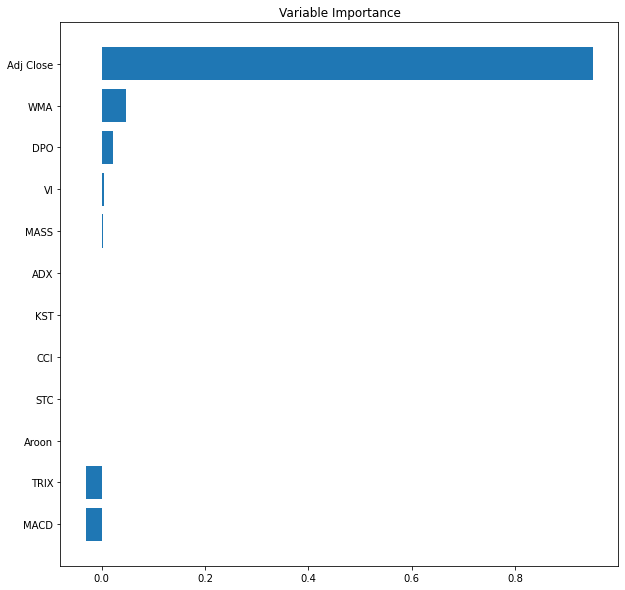

LM Train R-Squared: 0.9939333354339983
LM Test R-Squared: 0.973269271326066


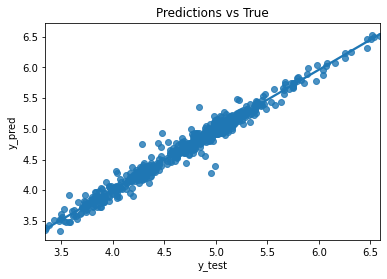

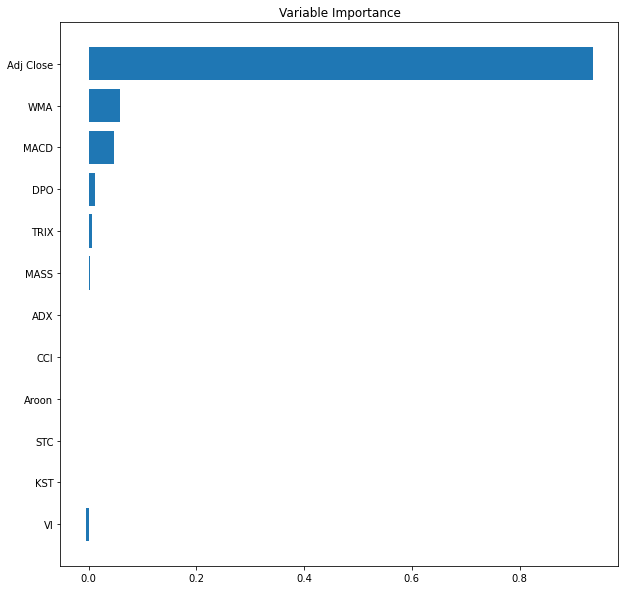

LM Train R-Squared: 0.9942680902561608
LM Test R-Squared: 0.9929598212329072


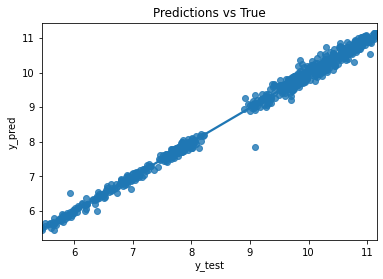

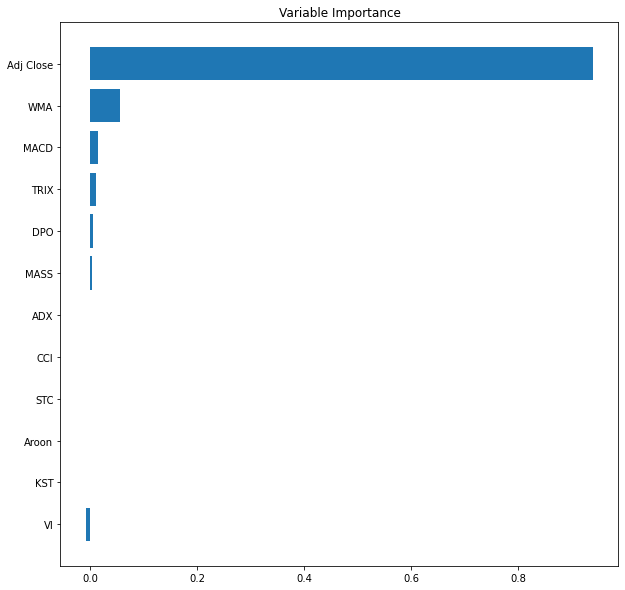

LM Train R-Squared: 0.9983433782973608
LM Test R-Squared: 0.9933049024347863


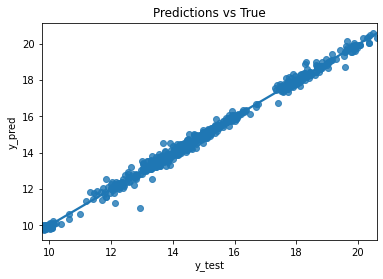

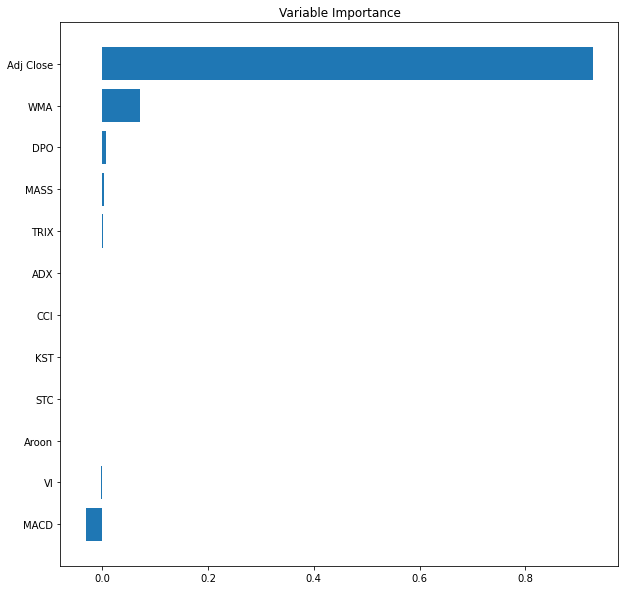

LM Train R-Squared: 0.9992296819941857
LM Test R-Squared: 0.9699523612323573


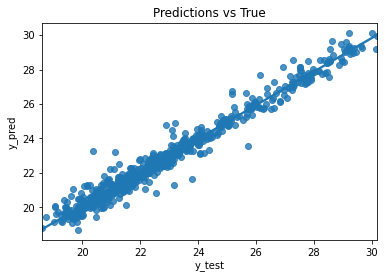

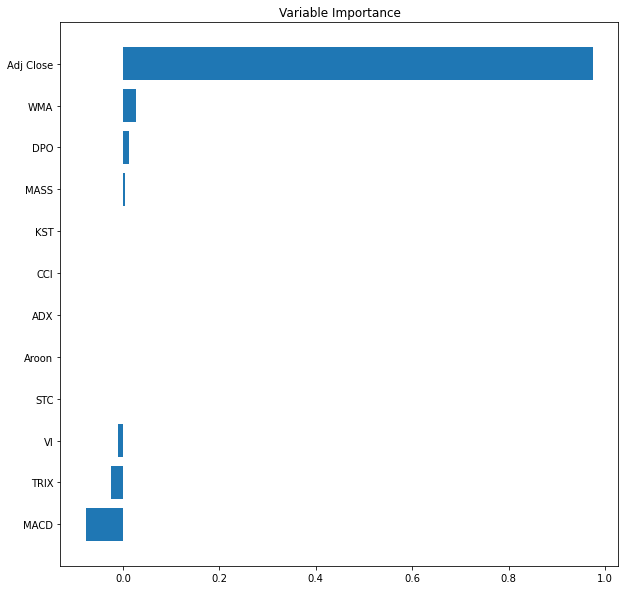

In [55]:
#OLS

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    rModel = linear_model.LinearRegression()
    rModel.fit(X_tr,y_tr)
    y_pred = rModel.predict(X_ts)
    train_score = rModel.score(X_tr,y_tr)
    test_score = rModel.score(X_ts,y_ts)
    print('LM Train R-Squared:',train_score)
    print('LM Test R-Squared:',test_score)
    sns.regplot(x=y_ts,y=y_pred)
    plt.title('Predictions vs True')
    plt.xlabel('y_test')
    plt.ylabel('y_pred')
    plt.show()
    lm_imp = rModel.coef_
    sorted_idx = np.argsort(lm_imp)
    num_features = np.arange(sorted_idx.shape[0])
    plt.figure(figsize=(10,10))
    plt.barh(num_features,lm_imp[sorted_idx],align='center')
    plt.yticks(num_features, X_train_columns[sorted_idx])
    plt.title('Variable Importance')
    plt.show()

Alpha is: 0.1
Ridge Train R-Squared: 0.9954389605182126
Ridge Test R-Squared: 0.9887583716100331


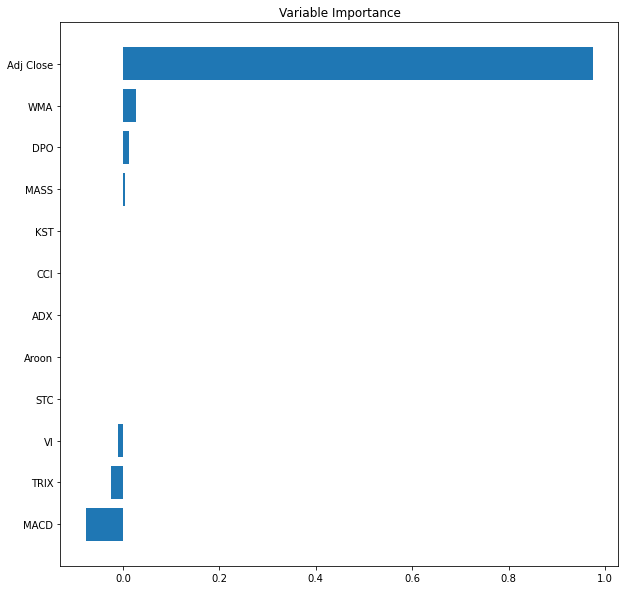

Alpha is: 1.0
Ridge Train R-Squared: 0.9953008270018666
Ridge Test R-Squared: 0.9883915763641453


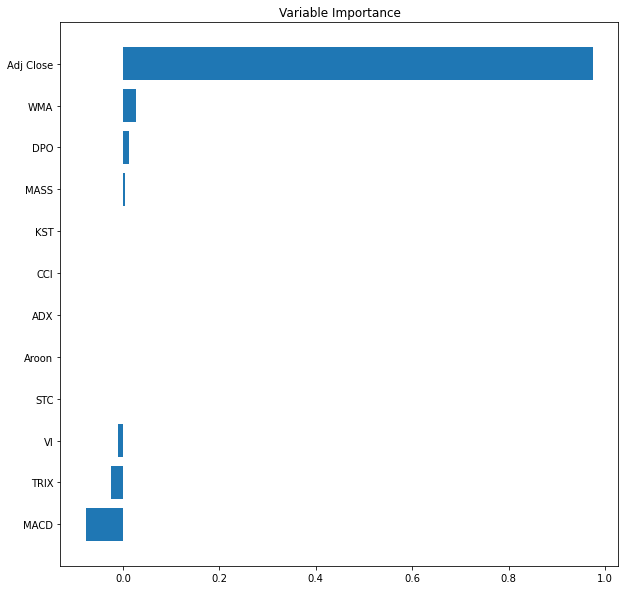

Alpha is: 10.0
Ridge Train R-Squared: 0.9949609820400914
Ridge Test R-Squared: 0.9876078916787235


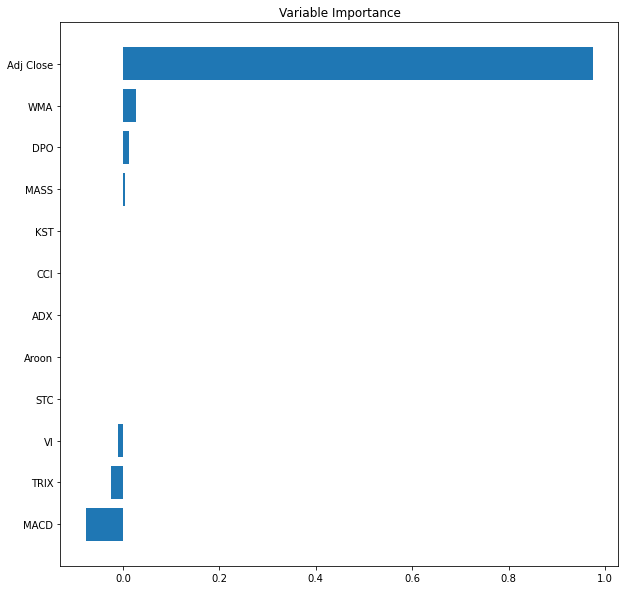

Alpha is: 0.1
Ridge Train R-Squared: 0.993932715971044
Ridge Test R-Squared: 0.9732549987476921


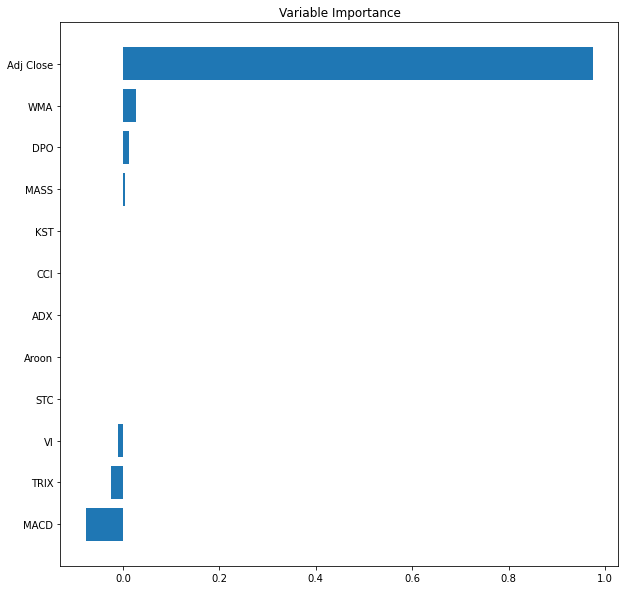

Alpha is: 1.0
Ridge Train R-Squared: 0.9938964224257981
Ridge Test R-Squared: 0.9730418391924657


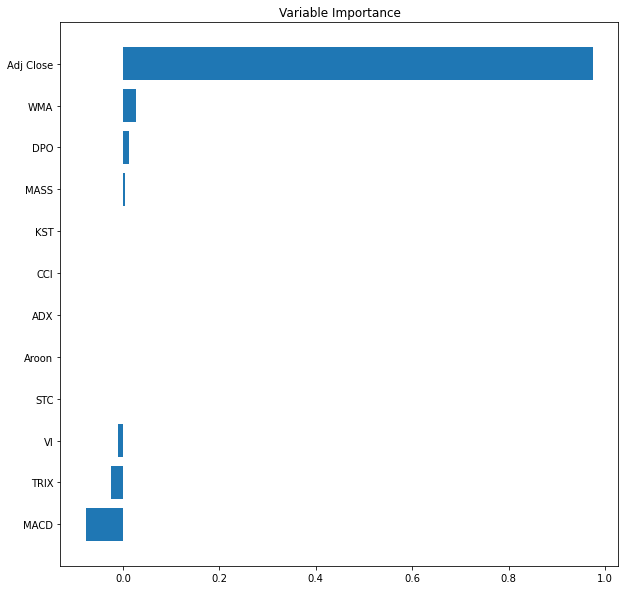

Alpha is: 10.0
Ridge Train R-Squared: 0.993560446728012
Ridge Test R-Squared: 0.9714224082001404


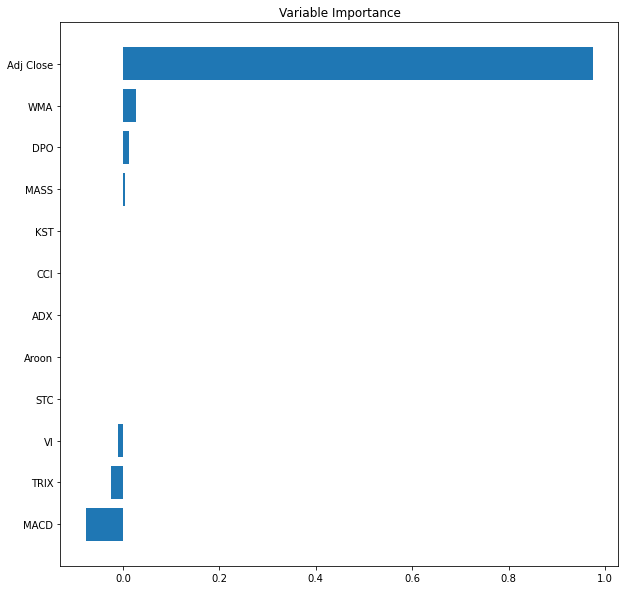

Alpha is: 0.1
Ridge Train R-Squared: 0.9942678099389335
Ridge Test R-Squared: 0.9929605591103605


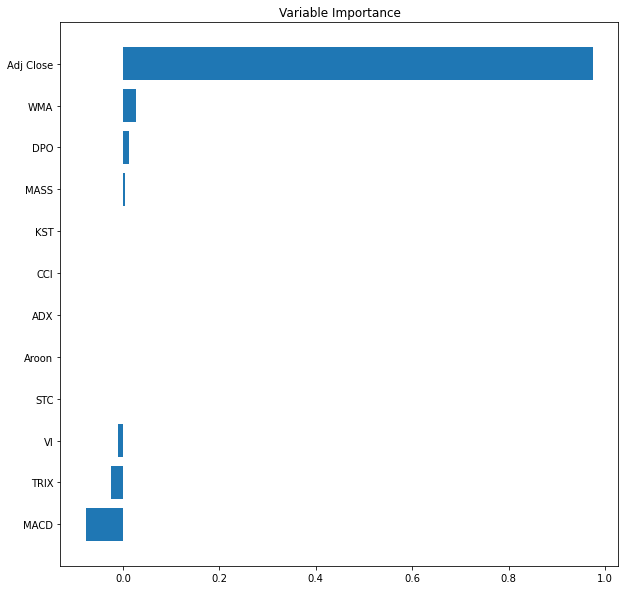

Alpha is: 1.0
Ridge Train R-Squared: 0.9942489962007093
Ridge Test R-Squared: 0.9929473187515739


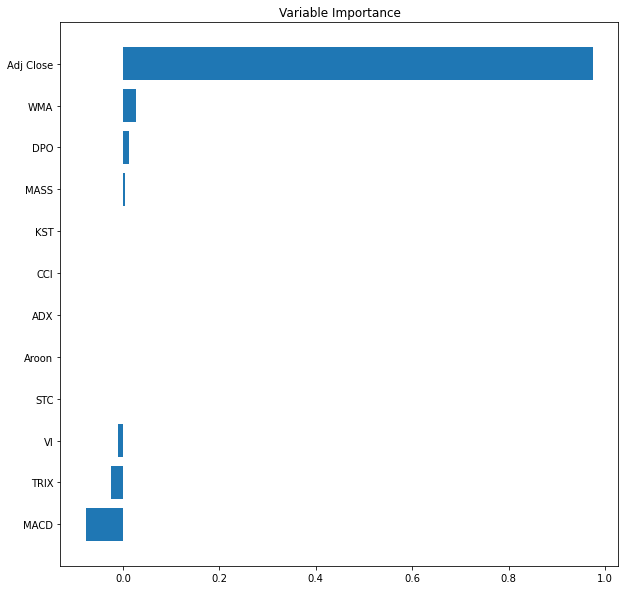

Alpha is: 10.0
Ridge Train R-Squared: 0.9939994733146975
Ridge Test R-Squared: 0.9926232813867284


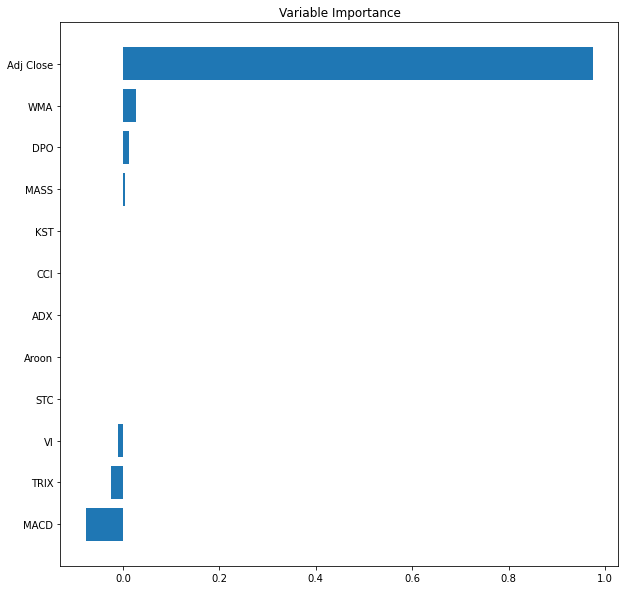

Alpha is: 0.1
Ridge Train R-Squared: 0.9983433498754255
Ridge Test R-Squared: 0.993299560307661


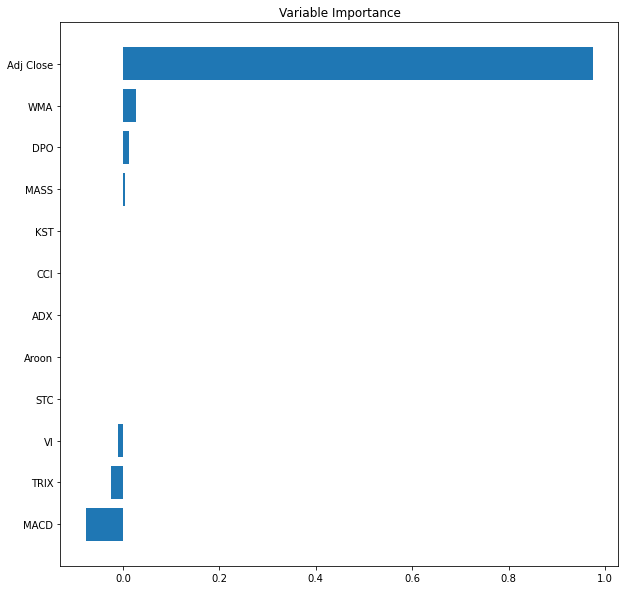

Alpha is: 1.0
Ridge Train R-Squared: 0.998341150626936
Ridge Test R-Squared: 0.993245432507865


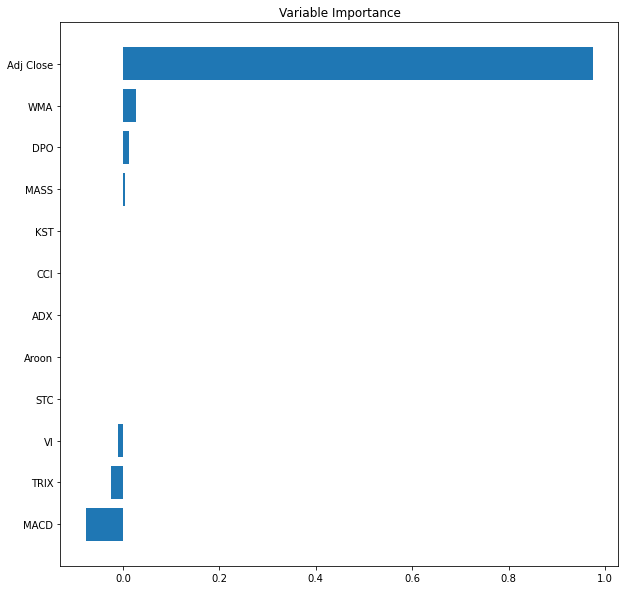

Alpha is: 10.0
Ridge Train R-Squared: 0.9982938290772964
Ridge Test R-Squared: 0.9927766871476252


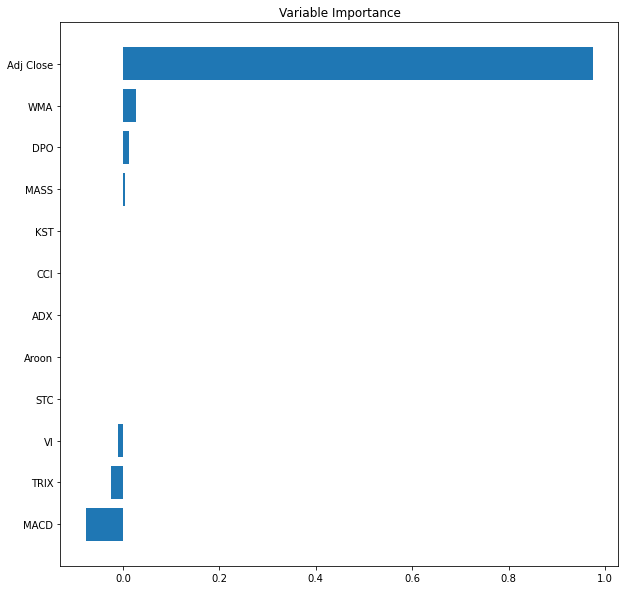

Alpha is: 0.1
Ridge Train R-Squared: 0.9992296782924106
Ridge Test R-Squared: 0.9699690034938208


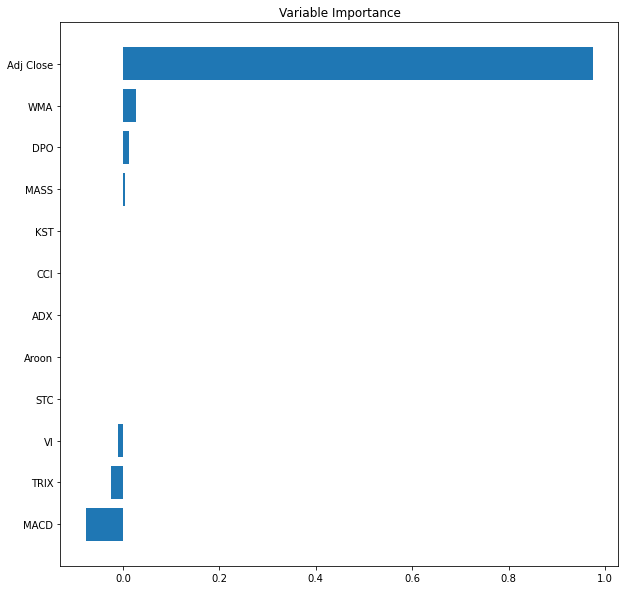

Alpha is: 1.0
Ridge Train R-Squared: 0.9992293503577205
Ridge Test R-Squared: 0.9700953362115399


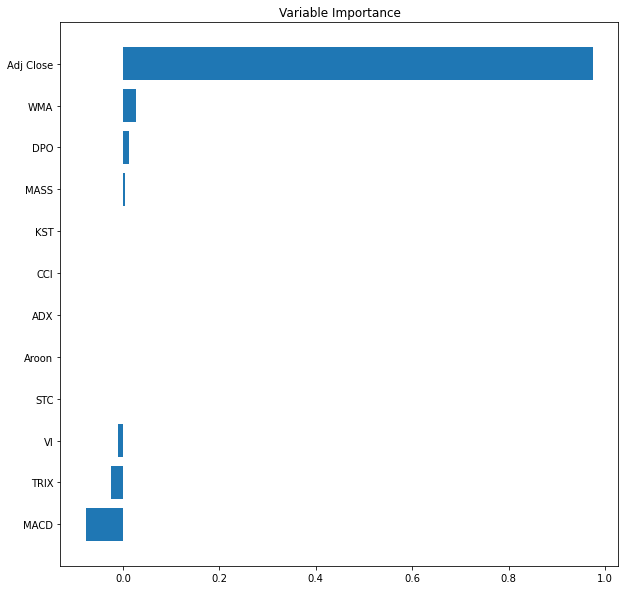

Alpha is: 10.0
Ridge Train R-Squared: 0.9992154121606774
Ridge Test R-Squared: 0.9702964568296143


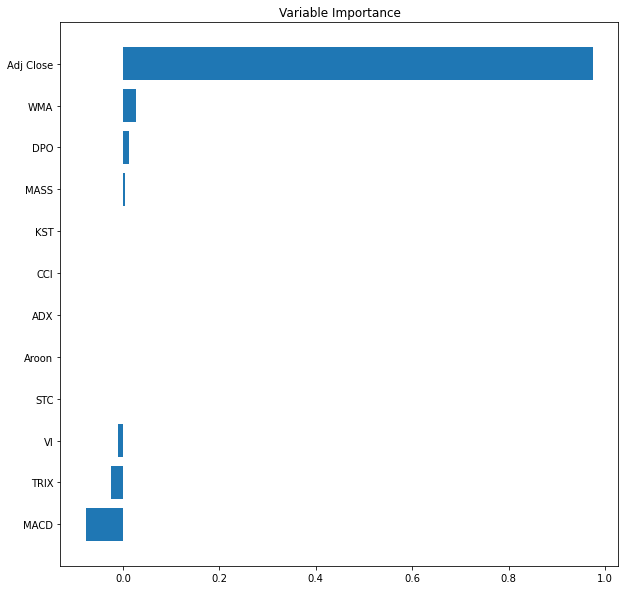

In [56]:
#Ridge Model

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    

    for alpha in [0.1, 1.0, 10.0]:
        print('Alpha is:',alpha)
        ridge_model = linear_model.Ridge(alpha)
        ridge_model.fit(X_tr,y_tr)
        ridge_train_score = ridge_model.score(X_tr,y_tr)
        ridge_test_score = ridge_model.score(X_ts,y_ts)
        print('Ridge Train R-Squared:',ridge_train_score)
        print('Ridge Test R-Squared:',ridge_test_score )
        lm_imp = rModel.coef_
        sorted_idx = np.argsort(lm_imp)
        num_features = np.arange(sorted_idx.shape[0])
        plt.figure(figsize=(10,10))
        plt.barh(num_features,lm_imp[sorted_idx],align='center')
        plt.yticks(num_features, X_train_columns[sorted_idx])
        plt.title('Variable Importance')
        plt.show()


rfr Train R-Squared: 0.9992673499665548
rfr Test R-Squared: 0.7976934278719514


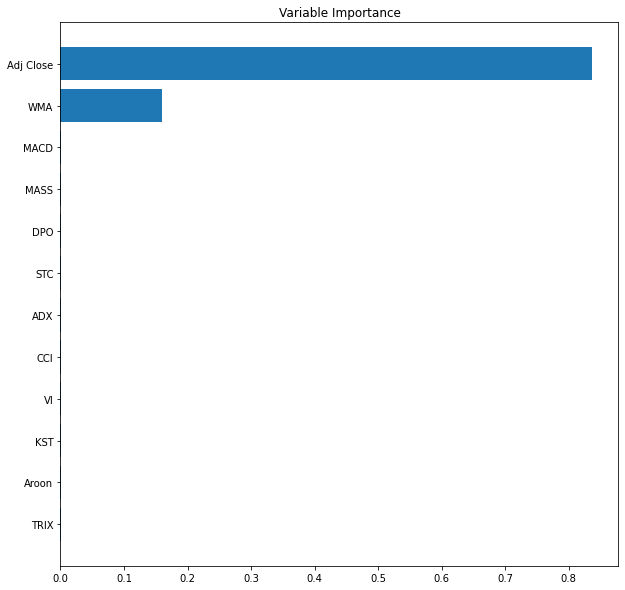

rfr Train R-Squared: 0.9990307982836828
rfr Test R-Squared: 0.9588508134999865


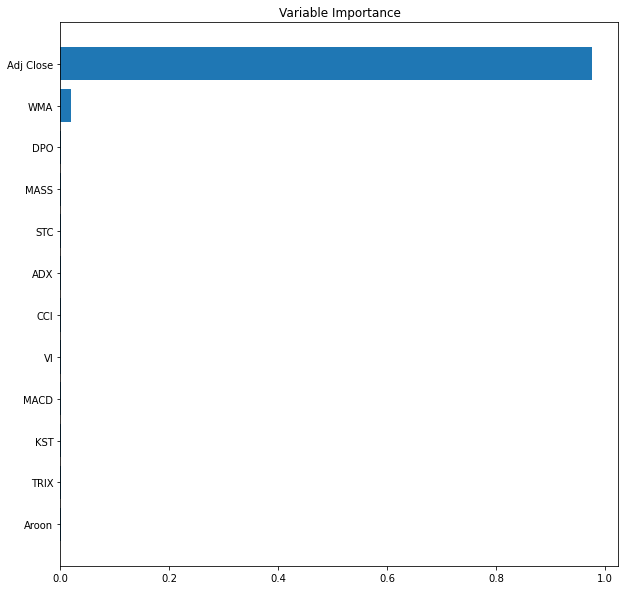

rfr Train R-Squared: 0.999085880479891
rfr Test R-Squared: -2.1600818573725653


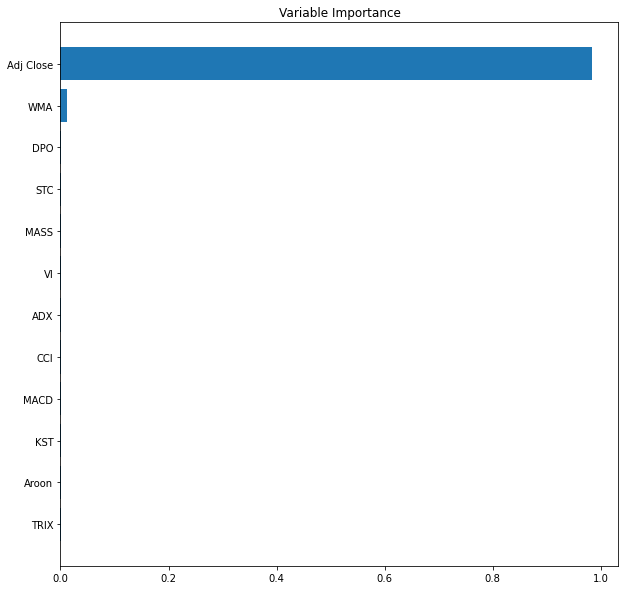

rfr Train R-Squared: 0.9997433244946357
rfr Test R-Squared: -2.5451618965262286


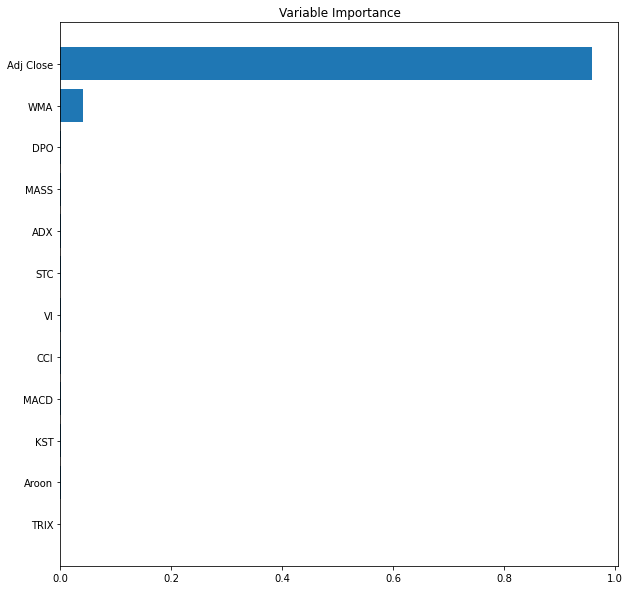

rfr Train R-Squared: 0.9998739966667635
rfr Test R-Squared: -1.14262579809203


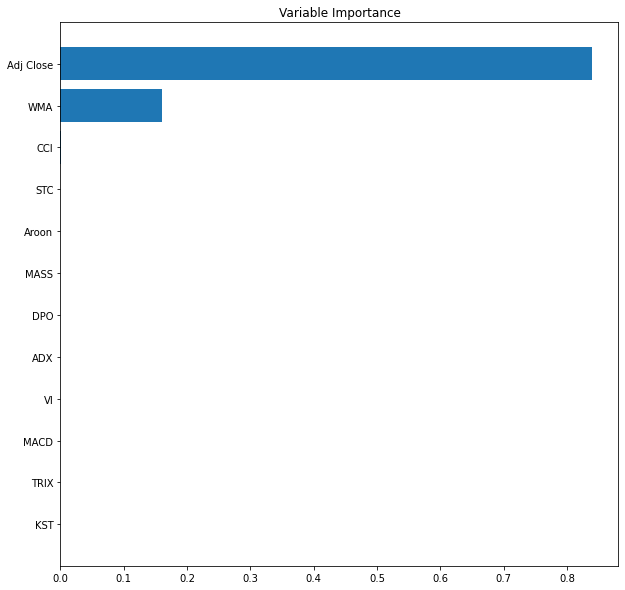

In [57]:
#Random Forest

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    
    rfr = RandomForestRegressor()
    rfr.fit(X_tr,y_tr)
    y_pred = rfr.predict(X_ts)
    train_score = rfr.score(X_tr,y_tr)
    test_score = rfr.score(X_ts,y_ts)
    print('rfr Train R-Squared:',train_score)
    print('rfr Test R-Squared:',test_score)

    rfr_imp = rfr.feature_importances_
    sorted_idx = np.argsort(rfr_imp)
    num_features = np.arange(sorted_idx.shape[0])
    plt.figure(figsize=(10,10))
    plt.barh(num_features,rfr_imp[sorted_idx],align='center')
    plt.yticks(num_features, X_train_columns[sorted_idx])
    plt.title('Variable Importance')
    plt.show()

In [59]:
df_volatility = df[['Adj Close','Adj Close Shift','Bollinger Avg','Bollinger High','Bollinger Low','ATR','Donchain Mid','Donchain High','Donchain Low','Keltner Mid','Keltner High','Keltner Low','Ulcer']]

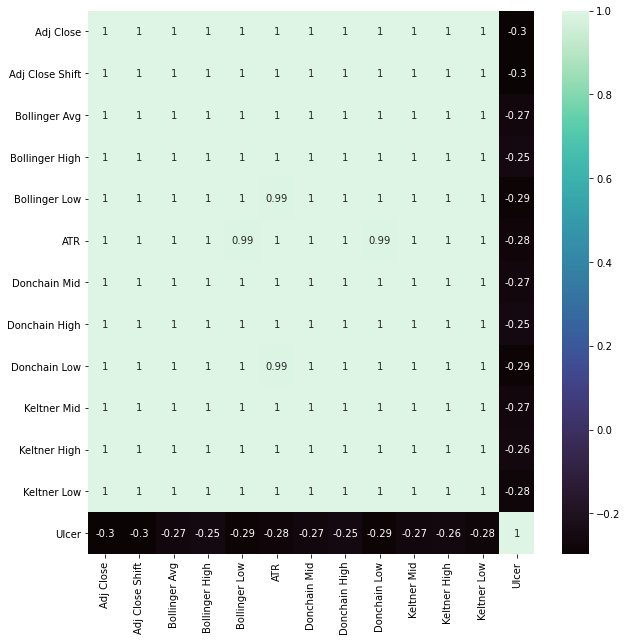

In [60]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_volatility.corr(),annot=True,cmap='mako')

In [66]:
#Drop all but Ulcer and Bollinger Avg
df_volatility = df[['Adj Close','Adj Close Shift','Ulcer','Bollinger Avg']]

In [67]:
#Spliting the dta into training and testing
X = df_volatility.drop(columns=['Adj Close Shift'])
y = df_volatility['Adj Close Shift']
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
y_train = y[:int(X.shape[0]*0.7)]
y_test = y[int(X.shape[0]*0.7):]
X_train_columns = X_train.columns

LM Train R-Squared: 0.995428215608684
LM Test R-Squared: 0.9888938693292041


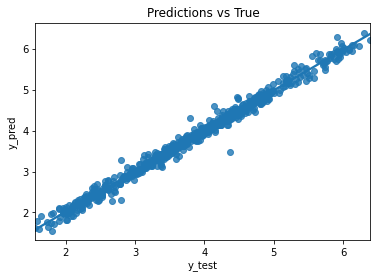

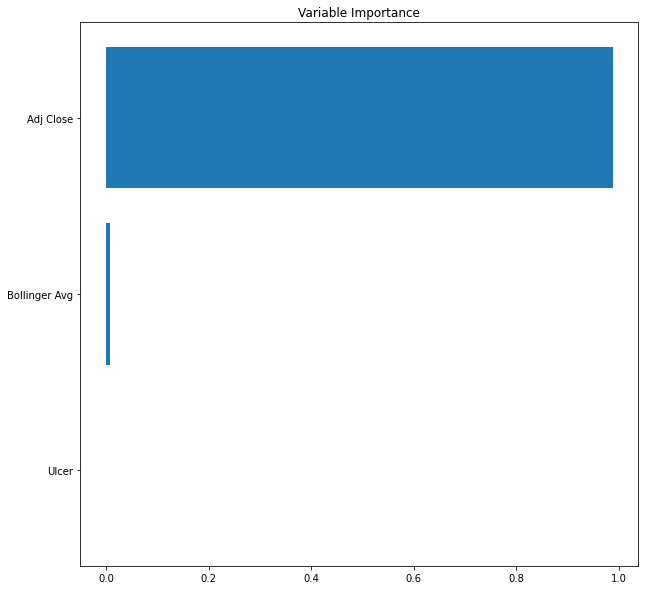

LM Train R-Squared: 0.9939036010433728
LM Test R-Squared: 0.9733893722183369


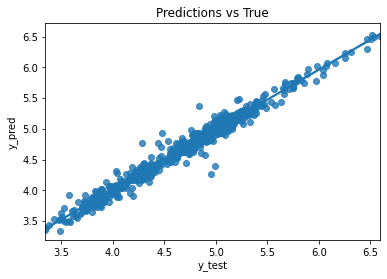

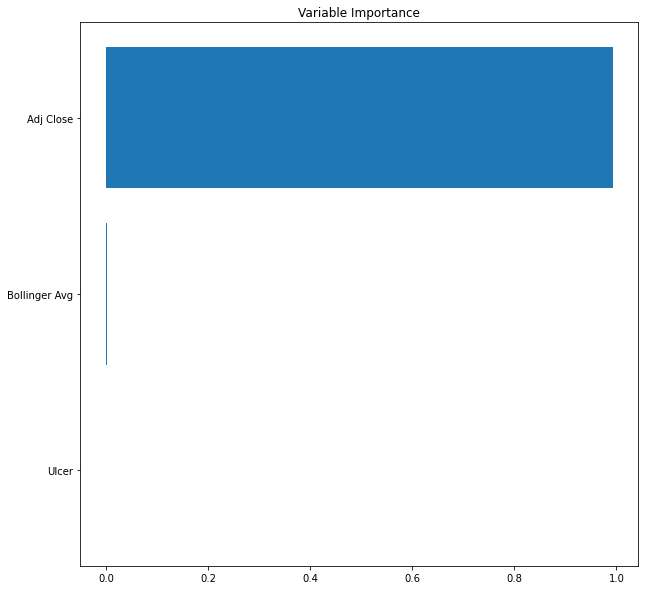

LM Train R-Squared: 0.9942454815369995
LM Test R-Squared: 0.992926591563141


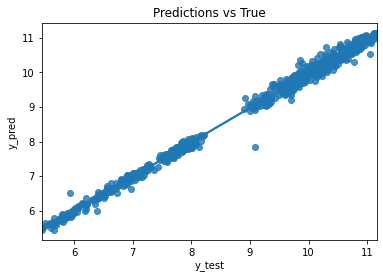

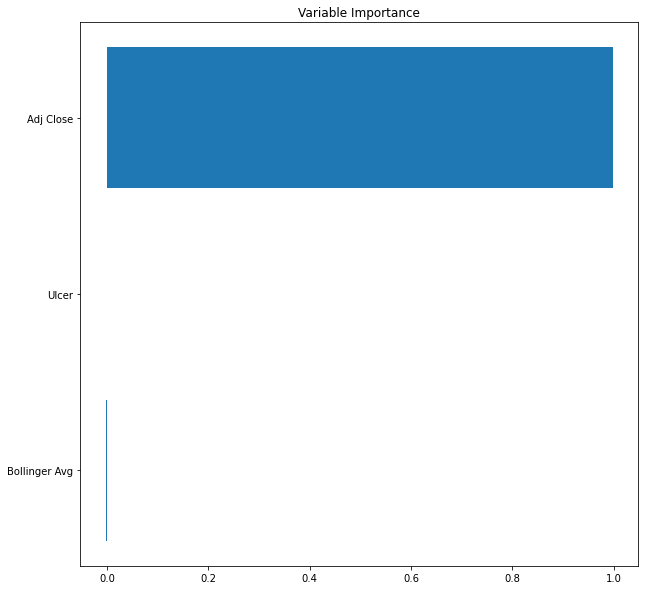

LM Train R-Squared: 0.9983370081023926
LM Test R-Squared: 0.9933046930208582


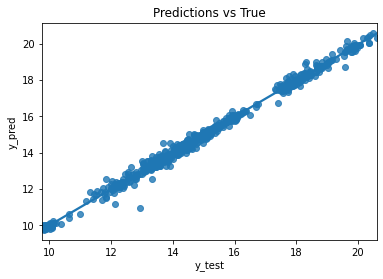

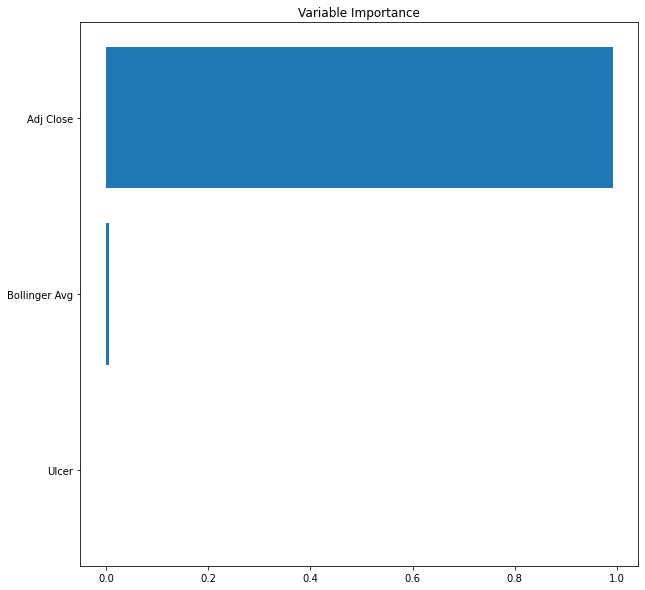

LM Train R-Squared: 0.9992269601709615
LM Test R-Squared: 0.9698753791334871


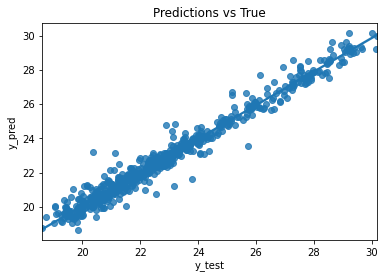

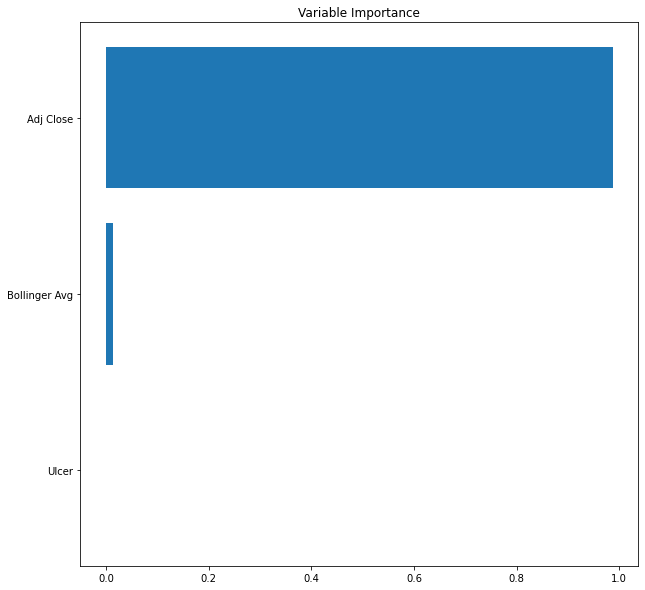

In [68]:
#OLS

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    rModel = linear_model.LinearRegression()
    rModel.fit(X_tr,y_tr)
    y_pred = rModel.predict(X_ts)
    train_score = rModel.score(X_tr,y_tr)
    test_score = rModel.score(X_ts,y_ts)
    print('LM Train R-Squared:',train_score)
    print('LM Test R-Squared:',test_score)
    sns.regplot(x=y_ts,y=y_pred)
    plt.title('Predictions vs True')
    plt.xlabel('y_test')
    plt.ylabel('y_pred')
    plt.show()
    lm_imp = rModel.coef_
    sorted_idx = np.argsort(lm_imp)
    num_features = np.arange(sorted_idx.shape[0])
    plt.figure(figsize=(10,10))
    plt.barh(num_features,lm_imp[sorted_idx],align='center')
    plt.yticks(num_features, X_train_columns[sorted_idx])
    plt.title('Variable Importance')
    plt.show()

Alpha is: 0.1
Ridge Train R-Squared: 0.9954271747407327
Ridge Test R-Squared: 0.9888876459393606


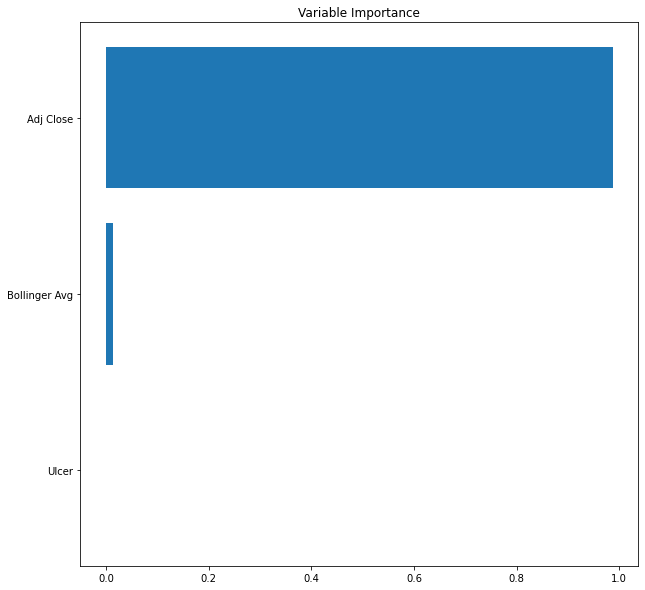

Alpha is: 1.0
Ridge Train R-Squared: 0.9953467671161539
Ridge Test R-Squared: 0.988656803038728


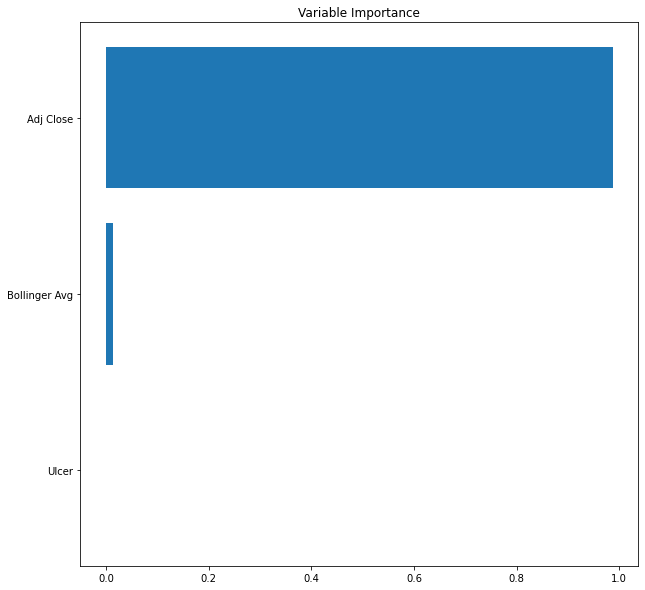

Alpha is: 10.0
Ridge Train R-Squared: 0.99363932852376
Ridge Test R-Squared: 0.9841761480059371


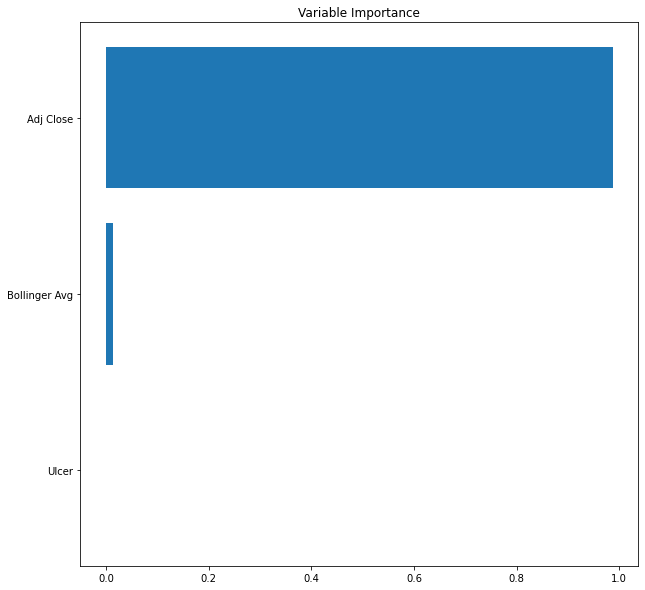

Alpha is: 0.1
Ridge Train R-Squared: 0.9939034941069415
Ridge Test R-Squared: 0.9733811434163735


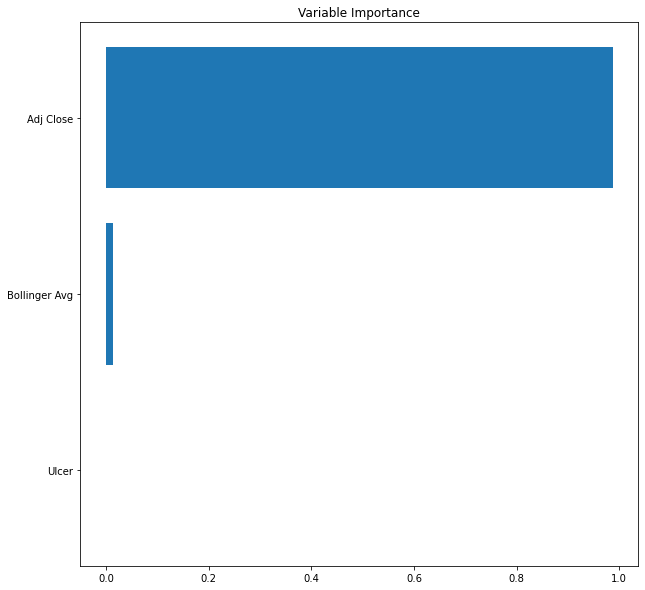

Alpha is: 1.0
Ridge Train R-Squared: 0.9938936354150486
Ridge Test R-Squared: 0.9732665734663697


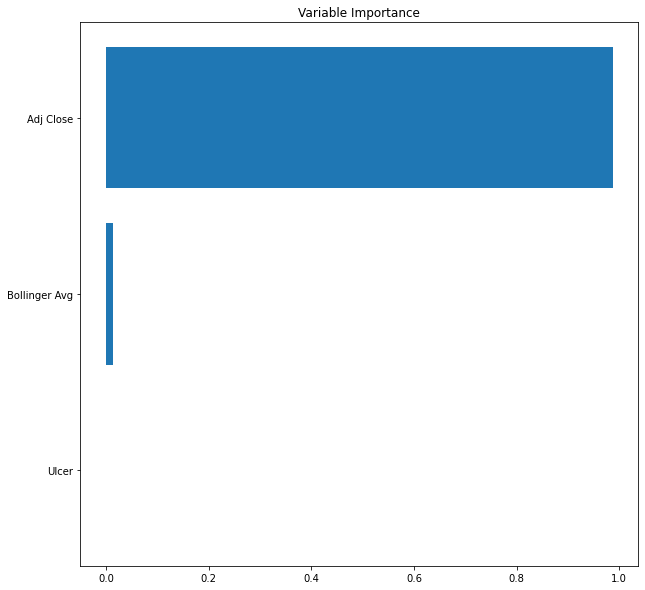

Alpha is: 10.0
Ridge Train R-Squared: 0.9933526242612181
Ridge Test R-Squared: 0.9701400575130875


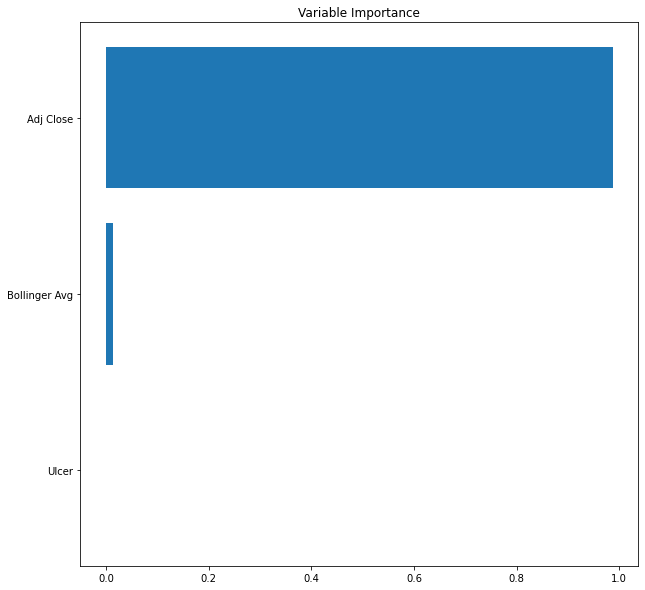

Alpha is: 0.1
Ridge Train R-Squared: 0.9942454380778069
Ridge Test R-Squared: 0.9929243704173902


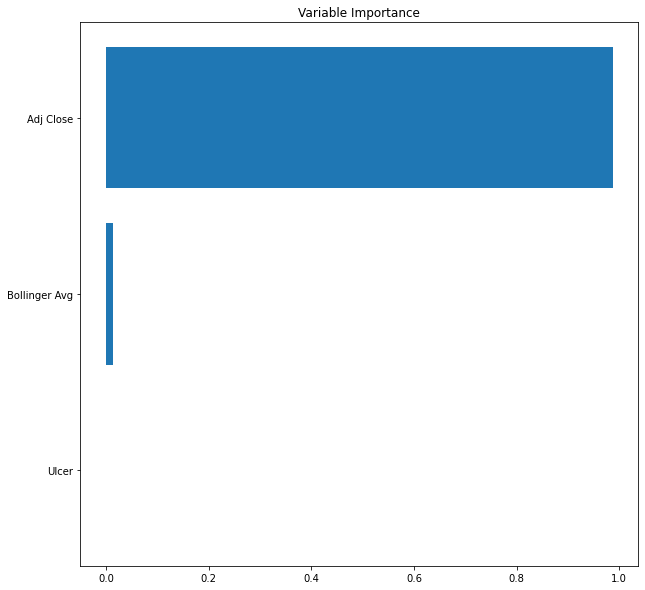

Alpha is: 1.0
Ridge Train R-Squared: 0.9942413291955476
Ridge Test R-Squared: 0.992898010505729


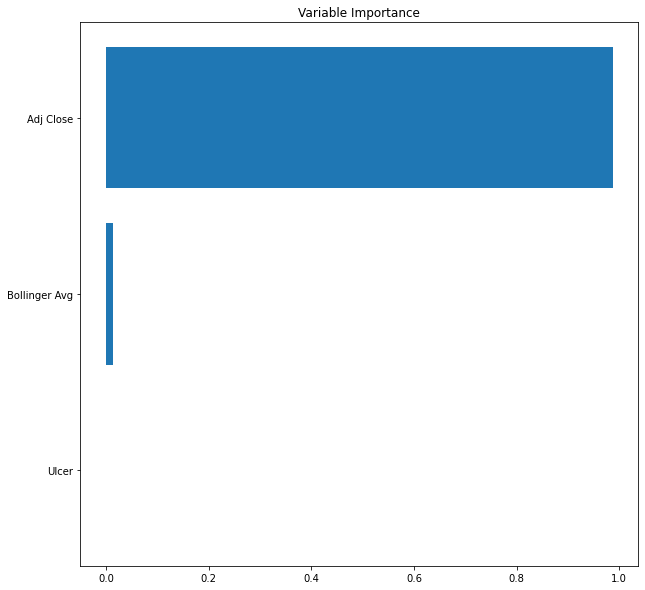

Alpha is: 10.0
Ridge Train R-Squared: 0.9939686112217971
Ridge Test R-Squared: 0.9922140444920206


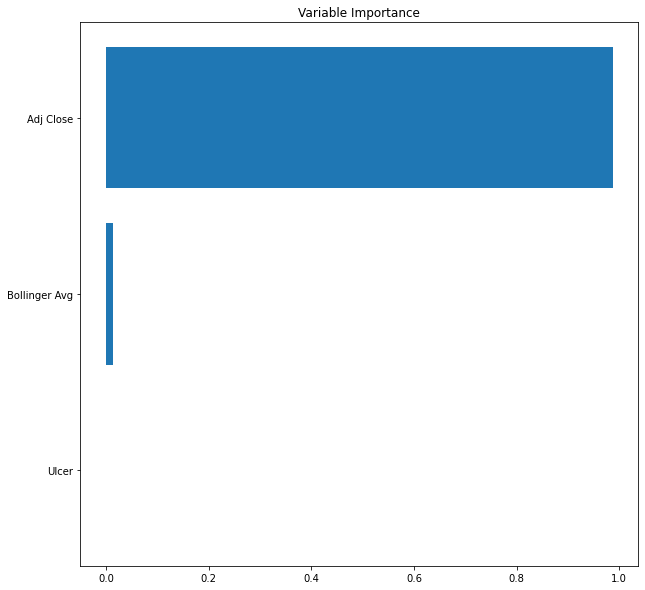

Alpha is: 0.1
Ridge Train R-Squared: 0.9983370038327063
Ridge Test R-Squared: 0.9933041409097456


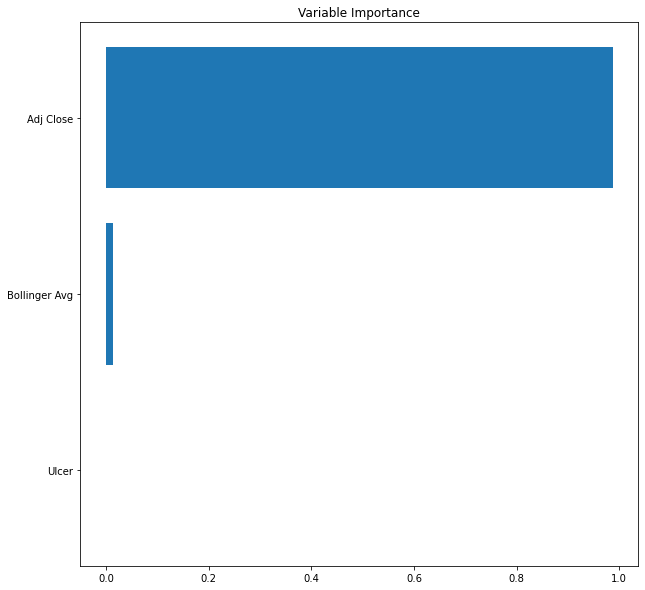

Alpha is: 1.0
Ridge Train R-Squared: 0.9983365927688373
Ridge Test R-Squared: 0.9932971379175547


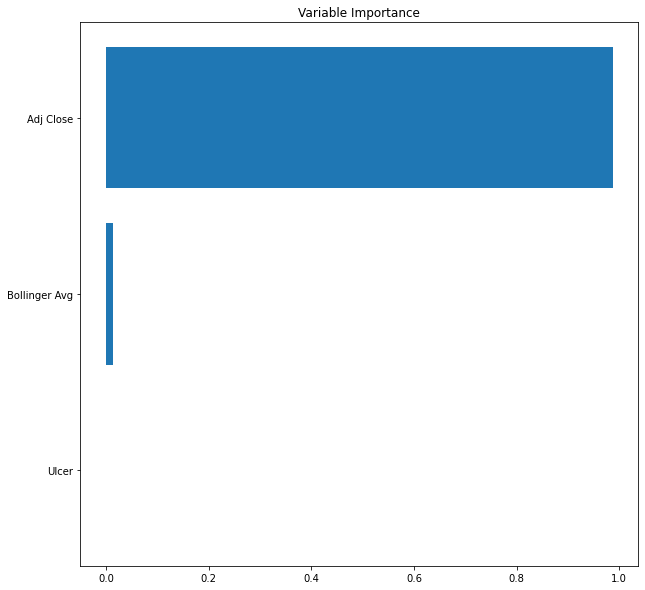

Alpha is: 10.0
Ridge Train R-Squared: 0.9983048877262906
Ridge Test R-Squared: 0.9930752116295597


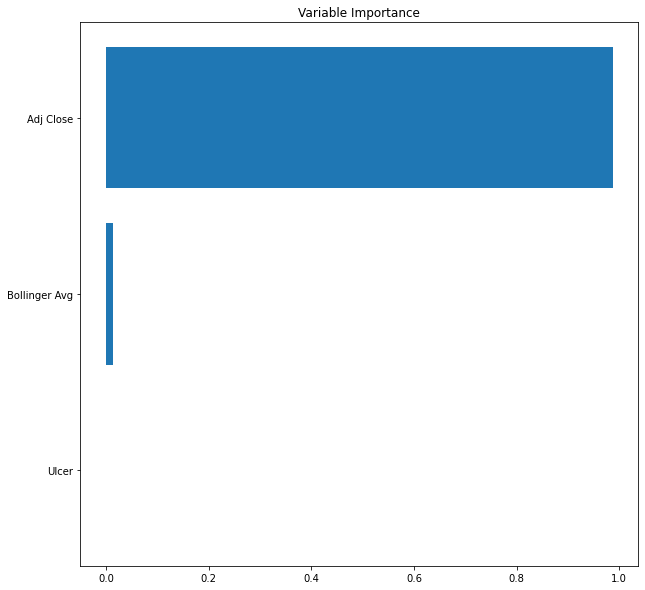

Alpha is: 0.1
Ridge Train R-Squared: 0.999226959688997
Ridge Test R-Squared: 0.9698769598057594


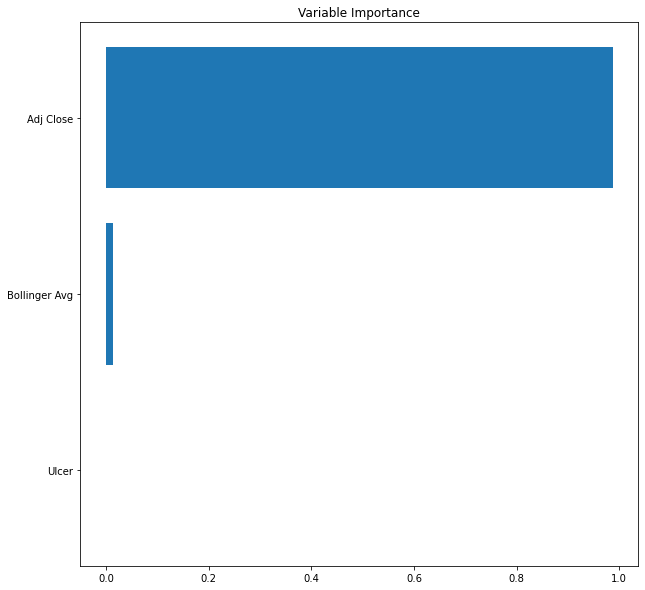

Alpha is: 1.0
Ridge Train R-Squared: 0.9992269126245847
Ridge Test R-Squared: 0.9698896141405688


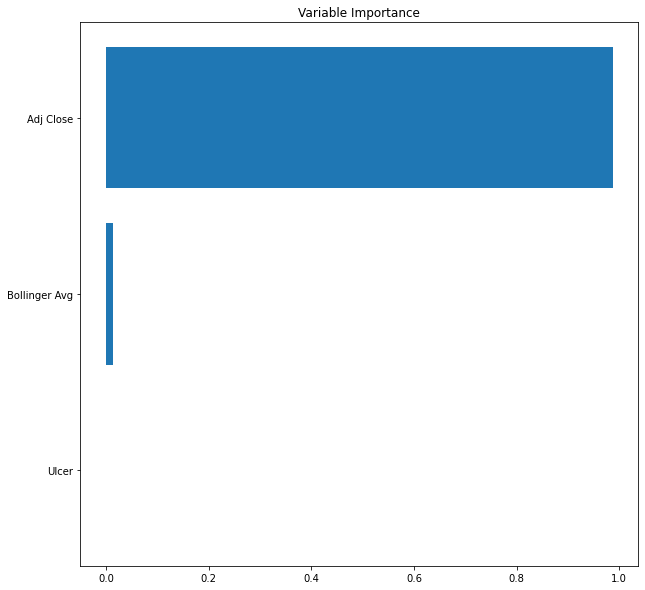

Alpha is: 10.0
Ridge Train R-Squared: 0.9992227890635401
Ridge Test R-Squared: 0.969881033693329


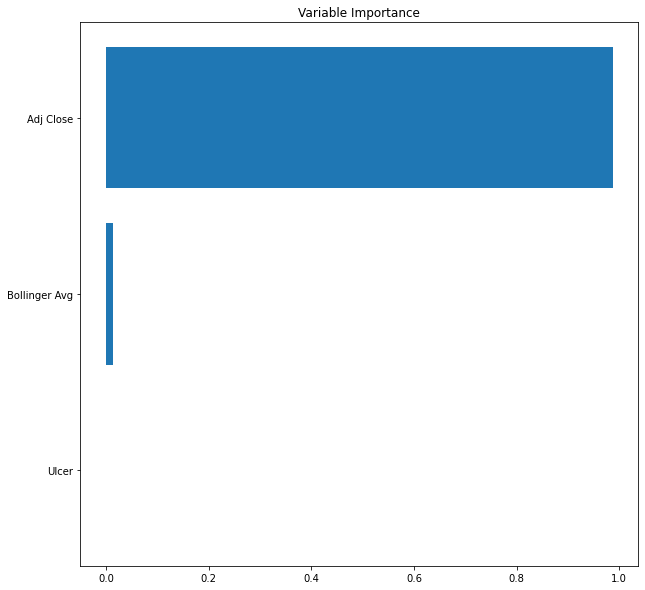

In [69]:
#Ridge Model

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    

    for alpha in [0.1, 1.0, 10.0]:
        print('Alpha is:',alpha)
        ridge_model = linear_model.Ridge(alpha)
        ridge_model.fit(X_tr,y_tr)
        ridge_train_score = ridge_model.score(X_tr,y_tr)
        ridge_test_score = ridge_model.score(X_ts,y_ts)
        print('Ridge Train R-Squared:',ridge_train_score)
        print('Ridge Test R-Squared:',ridge_test_score )
        lm_imp = rModel.coef_
        sorted_idx = np.argsort(lm_imp)
        num_features = np.arange(sorted_idx.shape[0])
        plt.figure(figsize=(10,10))
        plt.barh(num_features,lm_imp[sorted_idx],align='center')
        plt.yticks(num_features, X_train_columns[sorted_idx])
        plt.title('Variable Importance')
        plt.show()

rfr Train R-Squared: 0.9991950736150503
rfr Test R-Squared: 0.8055357213044028


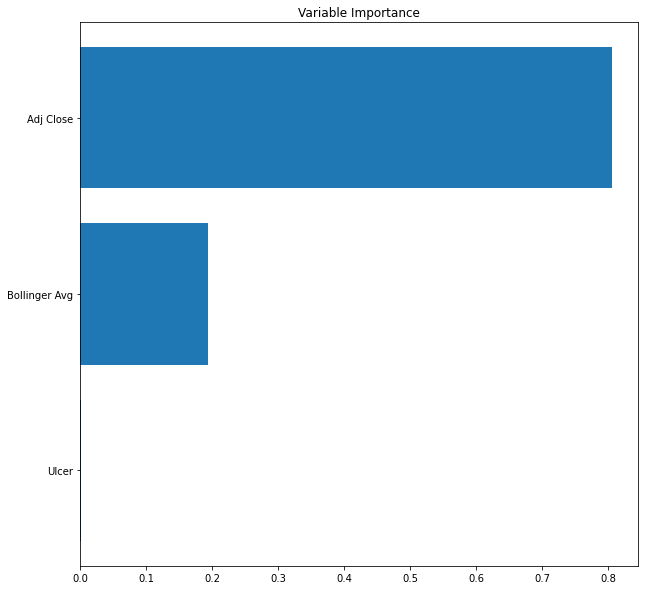

rfr Train R-Squared: 0.9990430111834188
rfr Test R-Squared: 0.9521972017933665


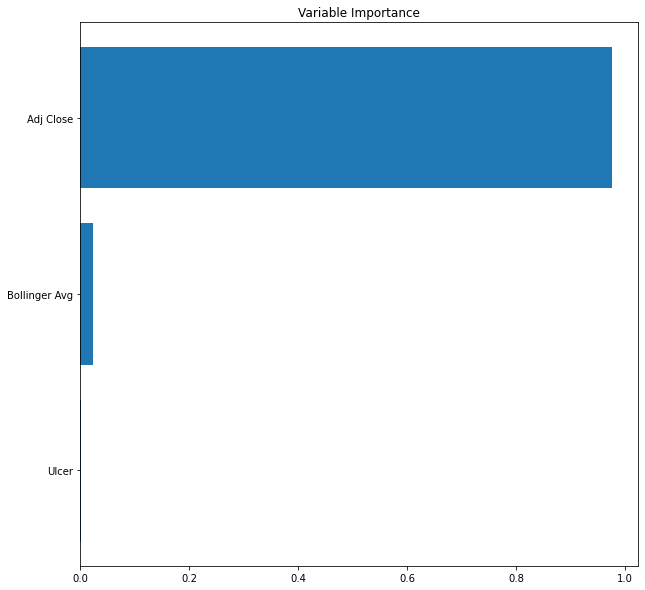

rfr Train R-Squared: 0.9990303593779609
rfr Test R-Squared: -2.1725594560808057


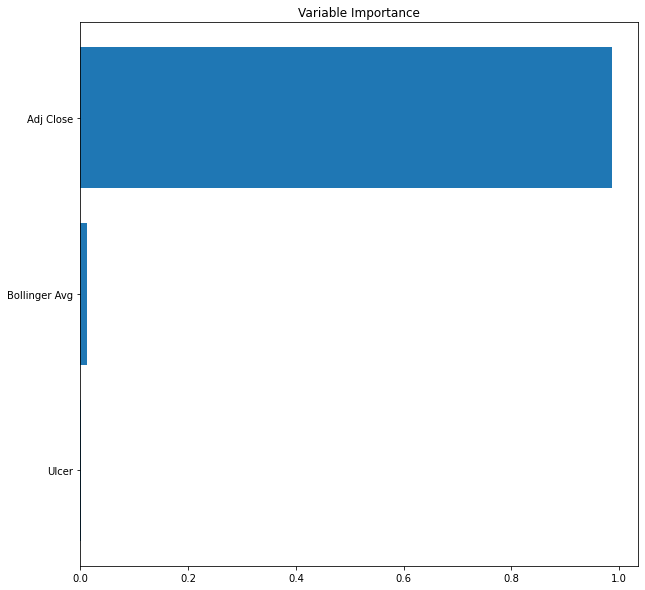

rfr Train R-Squared: 0.9997133630715921
rfr Test R-Squared: -2.4324658230040352


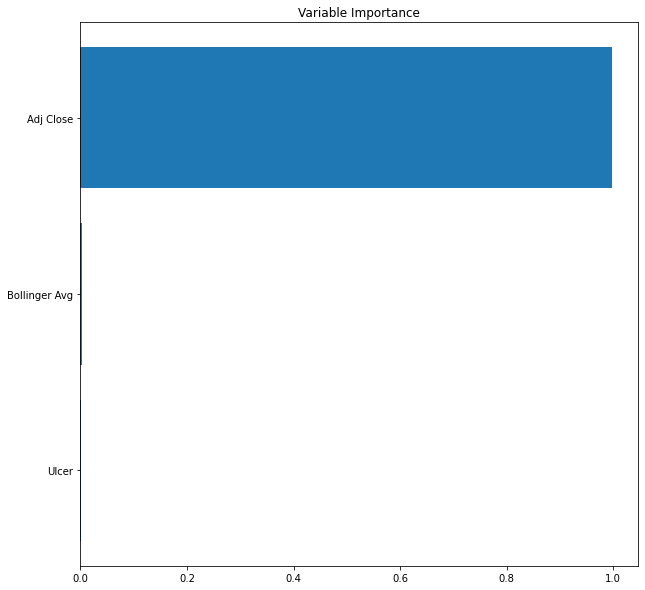

rfr Train R-Squared: 0.9998733984663243
rfr Test R-Squared: -1.0703023052152214


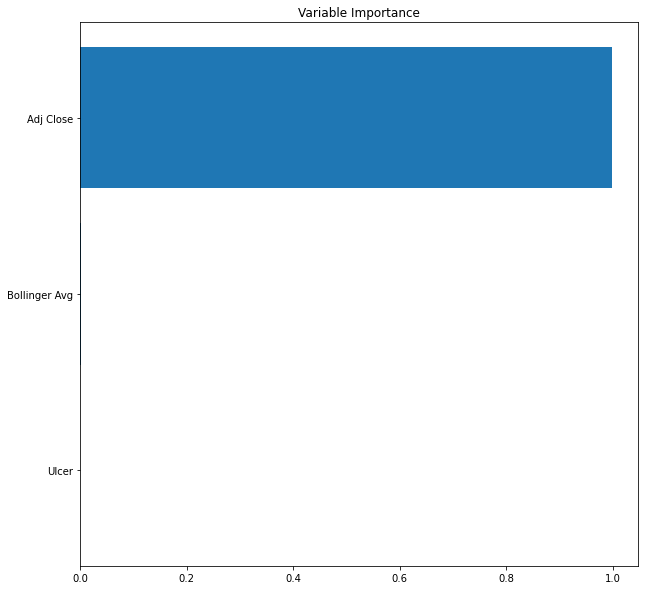

In [70]:
#Random Forest

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    
    rfr = RandomForestRegressor()
    rfr.fit(X_tr,y_tr)
    y_pred = rfr.predict(X_ts)
    train_score = rfr.score(X_tr,y_tr)
    test_score = rfr.score(X_ts,y_ts)
    print('rfr Train R-Squared:',train_score)
    print('rfr Test R-Squared:',test_score)

    rfr_imp = rfr.feature_importances_
    sorted_idx = np.argsort(rfr_imp)
    num_features = np.arange(sorted_idx.shape[0])
    plt.figure(figsize=(10,10))
    plt.barh(num_features,rfr_imp[sorted_idx],align='center')
    plt.yticks(num_features, X_train_columns[sorted_idx])
    plt.title('Variable Importance')
    plt.show()

In [61]:
df_volume = df[['Adj Close','Adj Close Shift','OBV','ADI','CMF','EoM','FI','MFI','VPT','VWAP']]

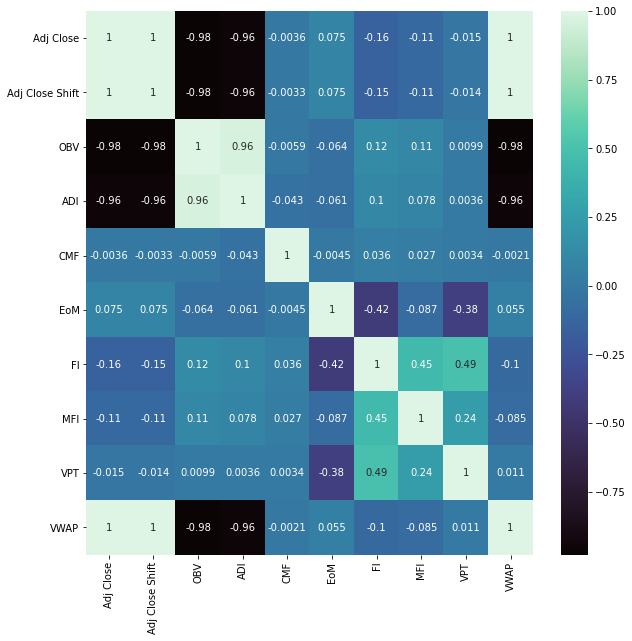

In [62]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_volume.corr(),annot=True,cmap='mako')

In [64]:
#Going to drop VWAP
df_volume.drop(columns=['VWAP'],inplace=True)

C:\Users\Jonat\anaconda3\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [76]:
#Spliting the dta into training and testing
X = df_volume.drop(columns=['Adj Close Shift'])
y = df_volume['Adj Close Shift']
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
y_train = y[:int(X.shape[0]*0.7)]
y_test = y[int(X.shape[0]*0.7):]
X_train_columns = X_train.columns

LM Train R-Squared: 0.995500986600485
LM Test R-Squared: 0.9877838946017568


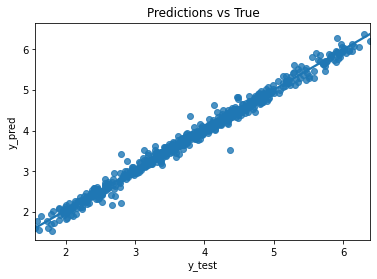

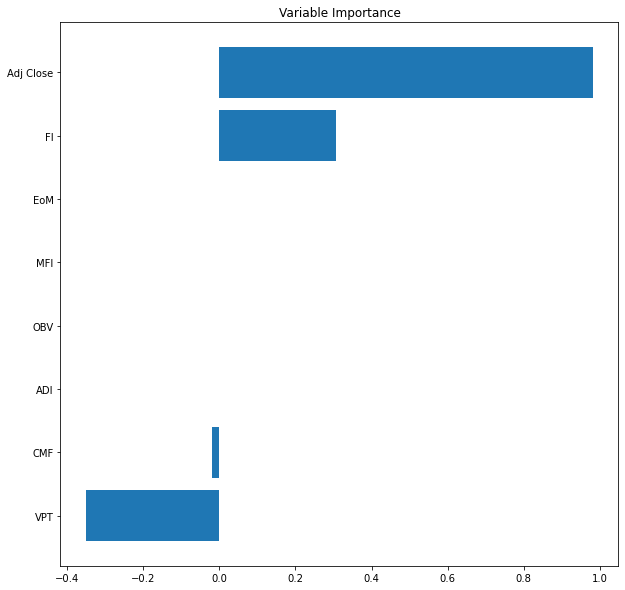

LM Train R-Squared: 0.9939214910552632
LM Test R-Squared: 0.9727616765705209


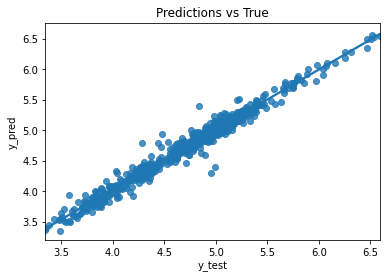

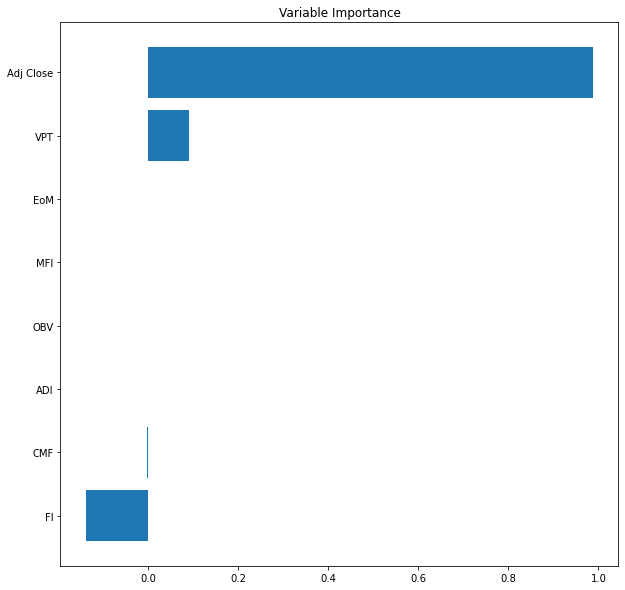

LM Train R-Squared: 0.9942728016156518
LM Test R-Squared: 0.992814600624566


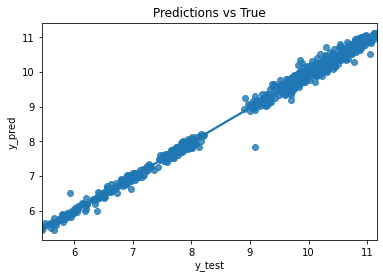

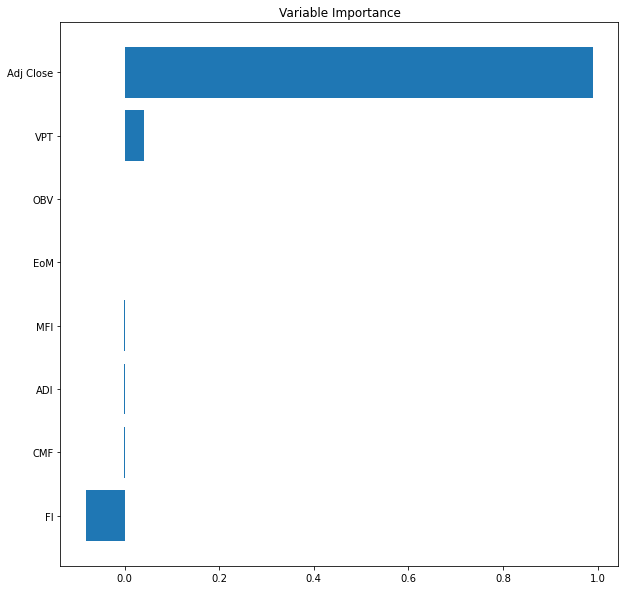

LM Train R-Squared: 0.9983429745872957
LM Test R-Squared: 0.9932317571027431


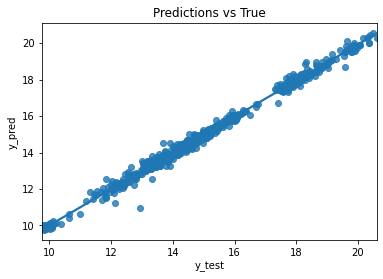

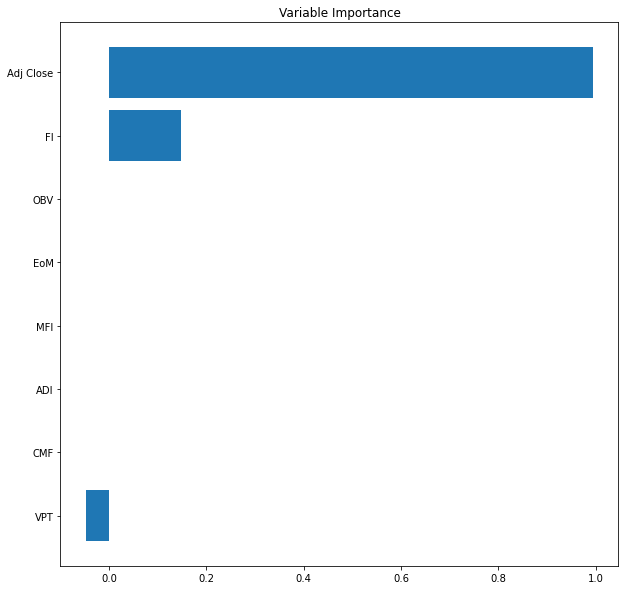

LM Train R-Squared: 0.9992294786170928
LM Test R-Squared: 0.9699770676900917


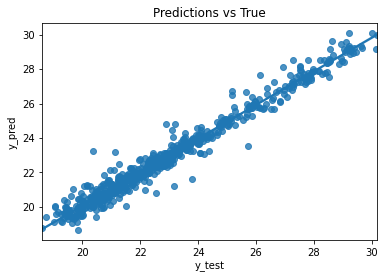

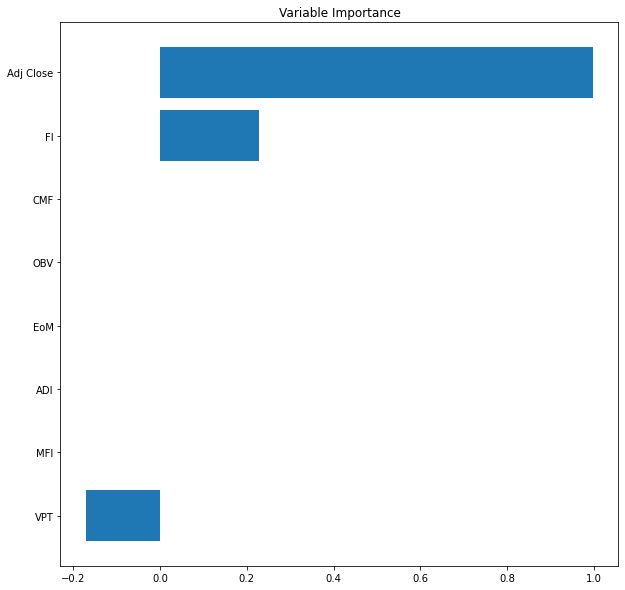

In [77]:
#OLS

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    rModel = linear_model.LinearRegression()
    rModel.fit(X_tr,y_tr)
    y_pred = rModel.predict(X_ts)
    train_score = rModel.score(X_tr,y_tr)
    test_score = rModel.score(X_ts,y_ts)
    print('LM Train R-Squared:',train_score)
    print('LM Test R-Squared:',test_score)
    sns.regplot(x=y_ts,y=y_pred)
    plt.title('Predictions vs True')
    plt.xlabel('y_test')
    plt.ylabel('y_pred')
    plt.show()
    lm_imp = rModel.coef_
    sorted_idx = np.argsort(lm_imp)
    num_features = np.arange(sorted_idx.shape[0])
    plt.figure(figsize=(10,10))
    plt.barh(num_features,lm_imp[sorted_idx],align='center')
    plt.yticks(num_features, X_train_columns[sorted_idx])
    plt.title('Variable Importance')
    plt.show()

Alpha is: 0.1
Ridge Train R-Squared: 0.9954956365260813
Ridge Test R-Squared: 0.9876321738974616


C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.54665e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


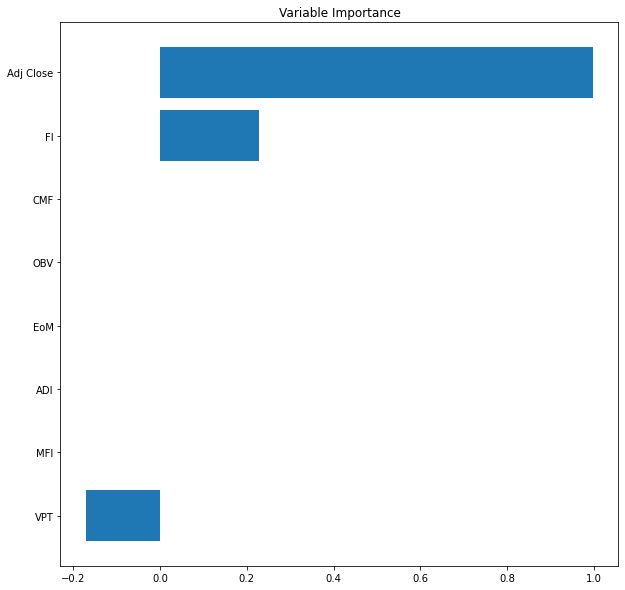

Alpha is: 1.0
Ridge Train R-Squared: 0.9954547396094579
Ridge Test R-Squared: 0.9867131614306855


C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.39779e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


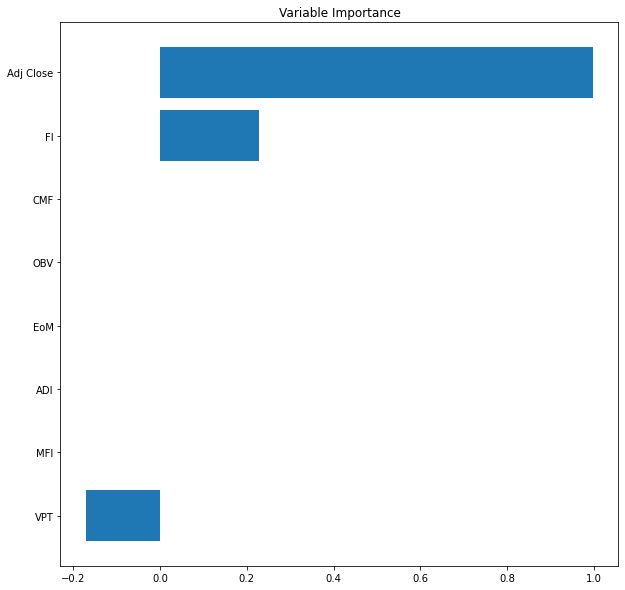

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.41517e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 10.0
Ridge Train R-Squared: 0.9937751753907004
Ridge Test R-Squared: 0.9635977825120968


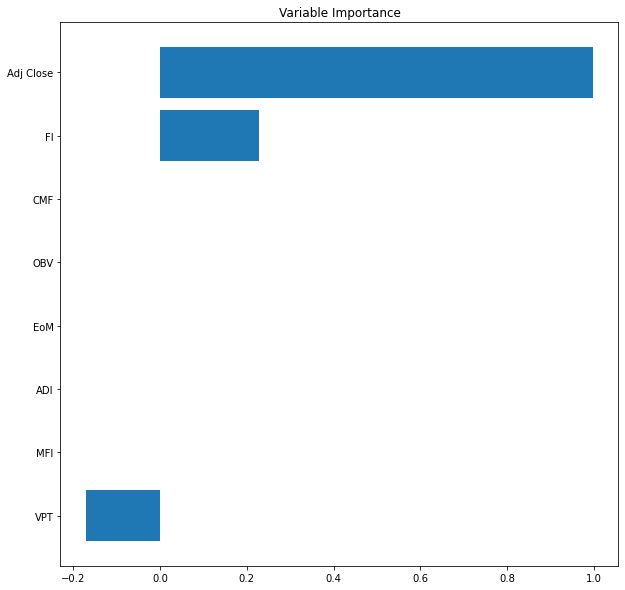

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.52922e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 0.1
Ridge Train R-Squared: 0.9939211488772769
Ridge Test R-Squared: 0.9727223196995498


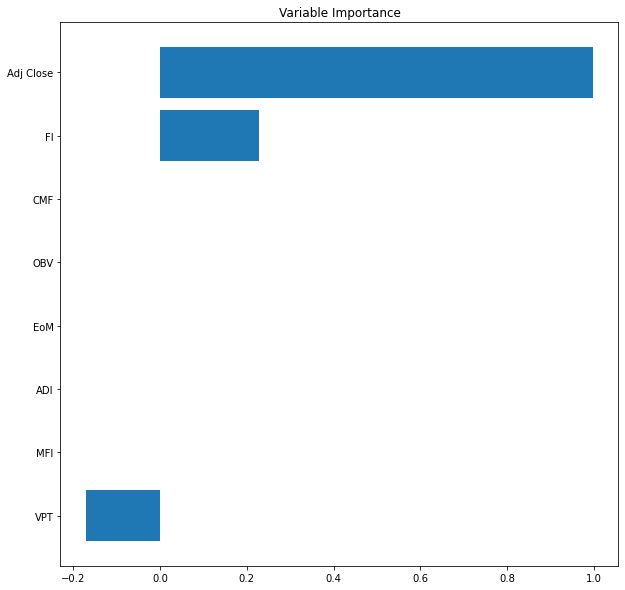

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.38466e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 1.0
Ridge Train R-Squared: 0.9939189989479683
Ridge Test R-Squared: 0.972213736847676


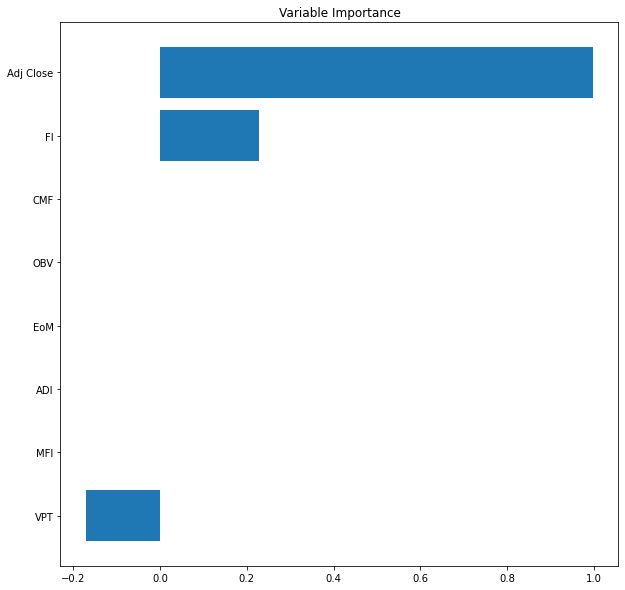

Alpha is: 10.0
Ridge Train R-Squared: 0.9938227533304088
Ridge Test R-Squared: 0.9608995236776022


C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.33731e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


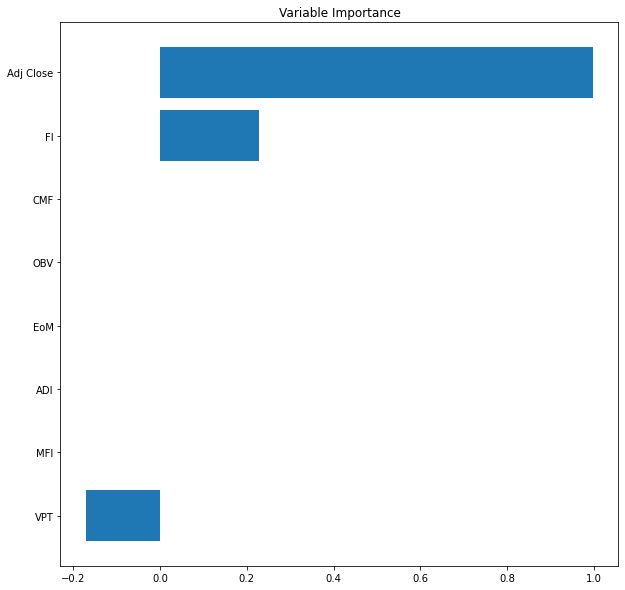

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.20572e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 0.1
Ridge Train R-Squared: 0.9942727391376563
Ridge Test R-Squared: 0.9928160646808779


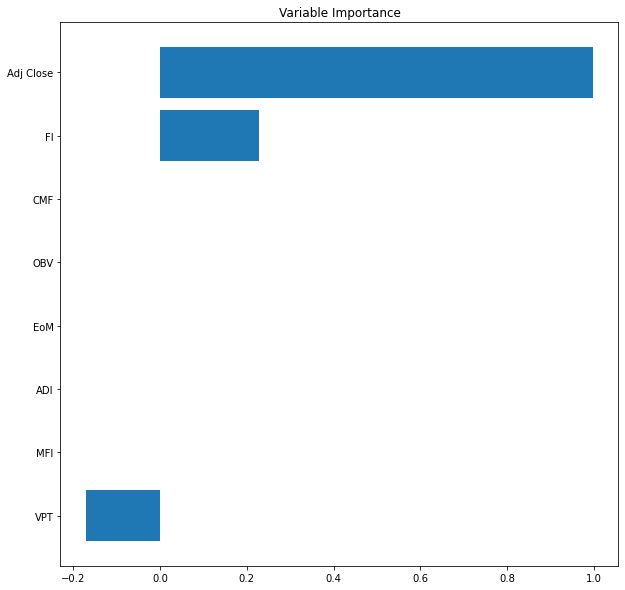

Alpha is: 1.0
Ridge Train R-Squared: 0.9942721517878429
Ridge Test R-Squared: 0.9927808210047226


C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.41448e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


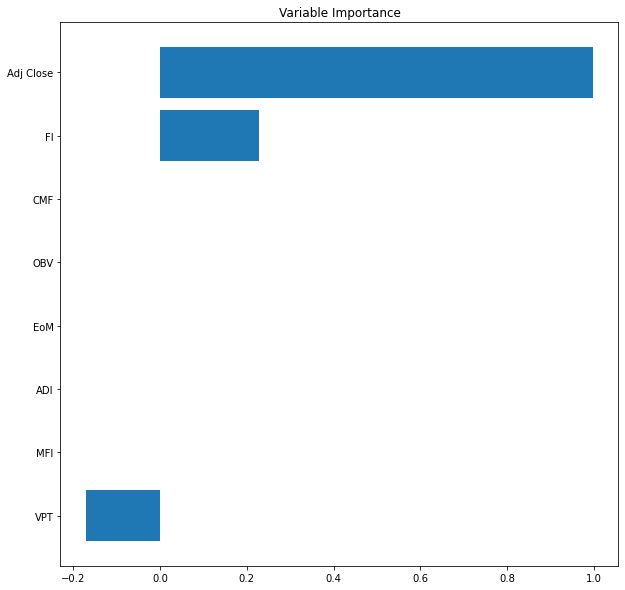

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.3105e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 10.0
Ridge Train R-Squared: 0.9942429581377319
Ridge Test R-Squared: 0.9921713615744103


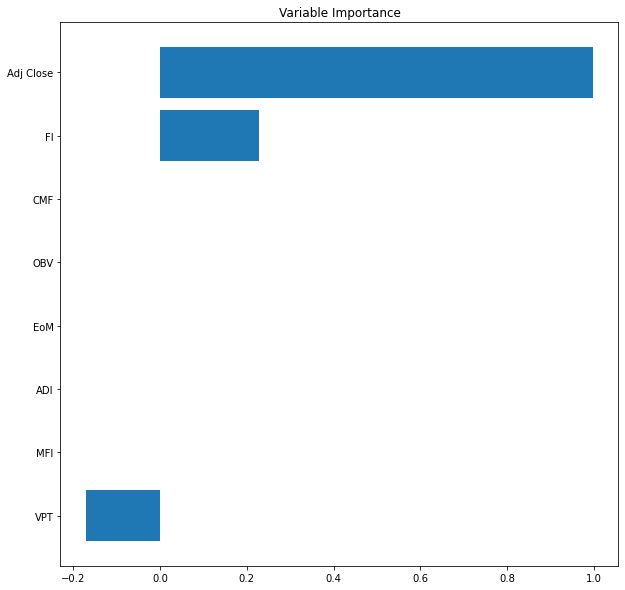

Alpha is: 0.1
Ridge Train R-Squared: 0.9983429527206437
Ridge Test R-Squared: 0.9932294208810934


C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.4099e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


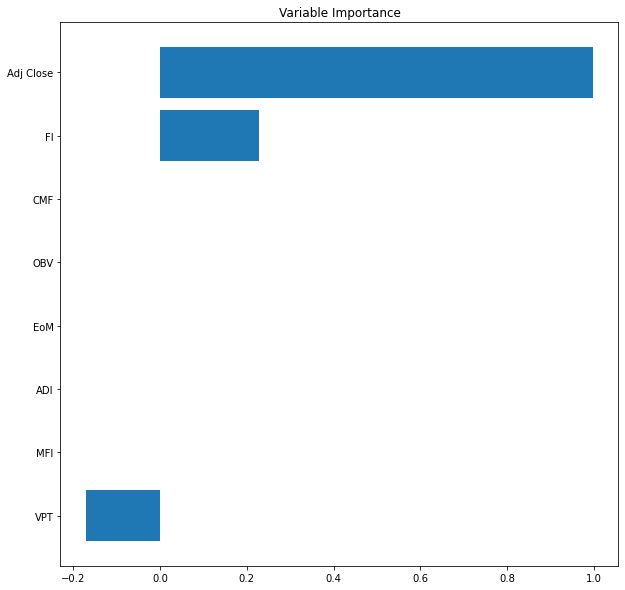

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.59474e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 1.0
Ridge Train R-Squared: 0.9983426737153194
Ridge Test R-Squared: 0.993213495874364


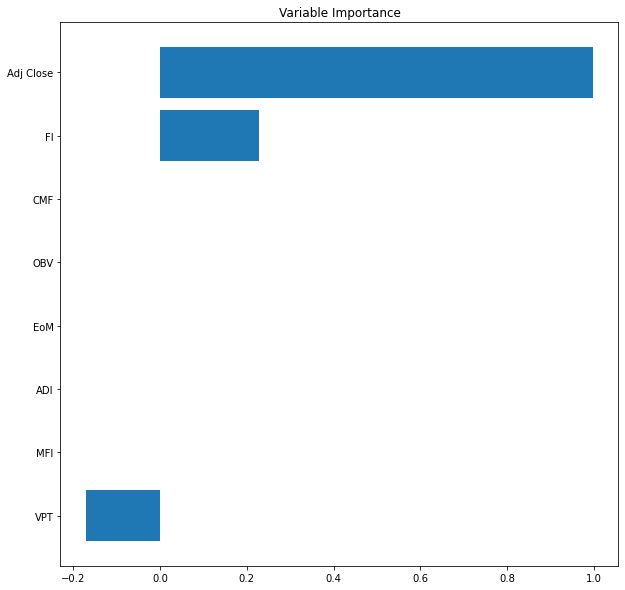

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.27006e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 10.0
Ridge Train R-Squared: 0.9983403121014721
Ridge Test R-Squared: 0.99306708297626


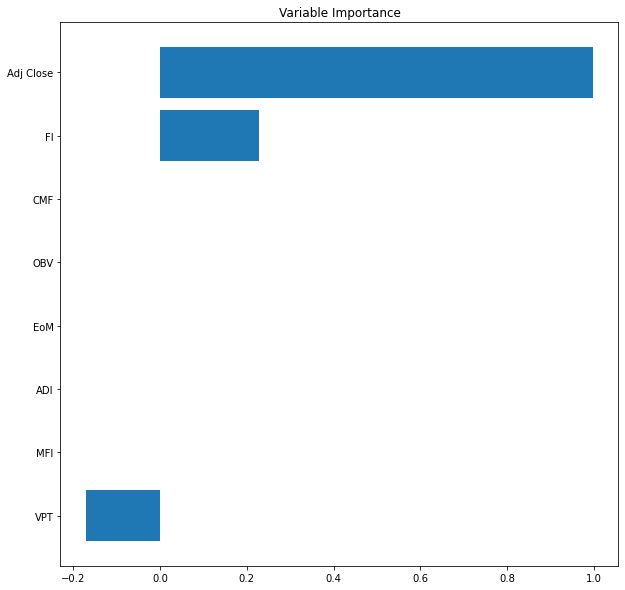

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.86844e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 0.1
Ridge Train R-Squared: 0.9992294685092566
Ridge Test R-Squared: 0.9699720915048876


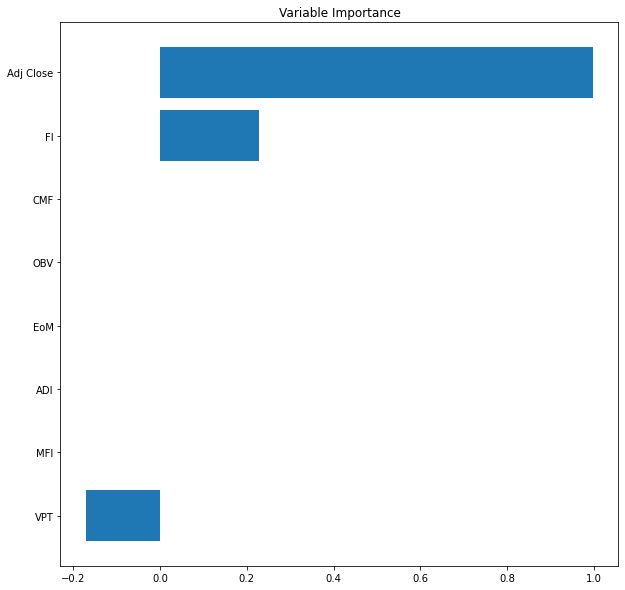

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.74224e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 1.0
Ridge Train R-Squared: 0.9992292051035069
Ridge Test R-Squared: 0.9699387083924174


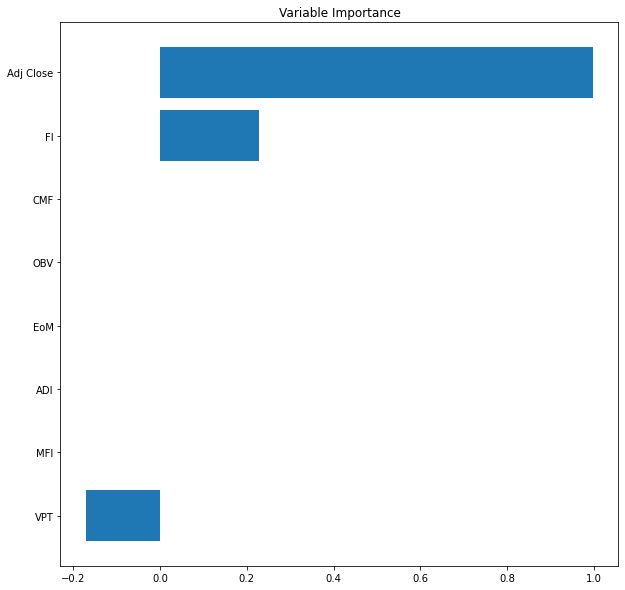

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.04001e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 10.0
Ridge Train R-Squared: 0.9992283977654207
Ridge Test R-Squared: 0.9698870100307692


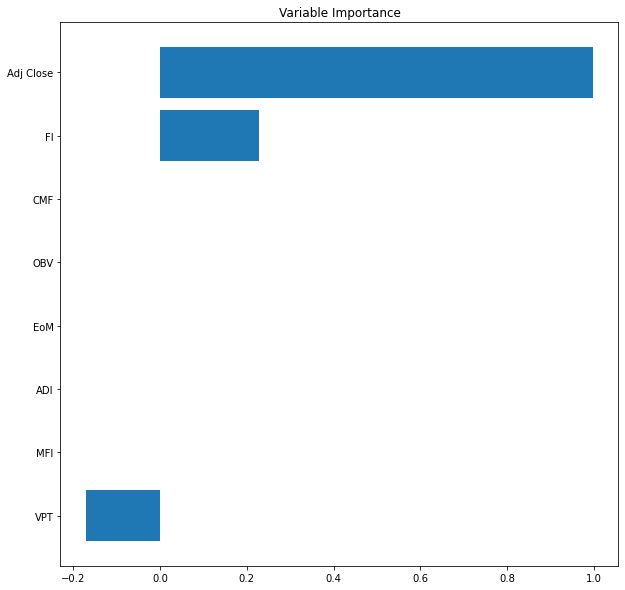

In [78]:
#Ridge Model

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    

    for alpha in [0.1, 1.0, 10.0]:
        print('Alpha is:',alpha)
        ridge_model = linear_model.Ridge(alpha)
        ridge_model.fit(X_tr,y_tr)
        ridge_train_score = ridge_model.score(X_tr,y_tr)
        ridge_test_score = ridge_model.score(X_ts,y_ts)
        print('Ridge Train R-Squared:',ridge_train_score)
        print('Ridge Test R-Squared:',ridge_test_score )
        lm_imp = rModel.coef_
        sorted_idx = np.argsort(lm_imp)
        num_features = np.arange(sorted_idx.shape[0])
        plt.figure(figsize=(10,10))
        plt.barh(num_features,lm_imp[sorted_idx],align='center')
        plt.yticks(num_features, X_train_columns[sorted_idx])
        plt.title('Variable Importance')
        plt.show()

rfr Train R-Squared: 0.9992460250821389
rfr Test R-Squared: 0.7629217287602182


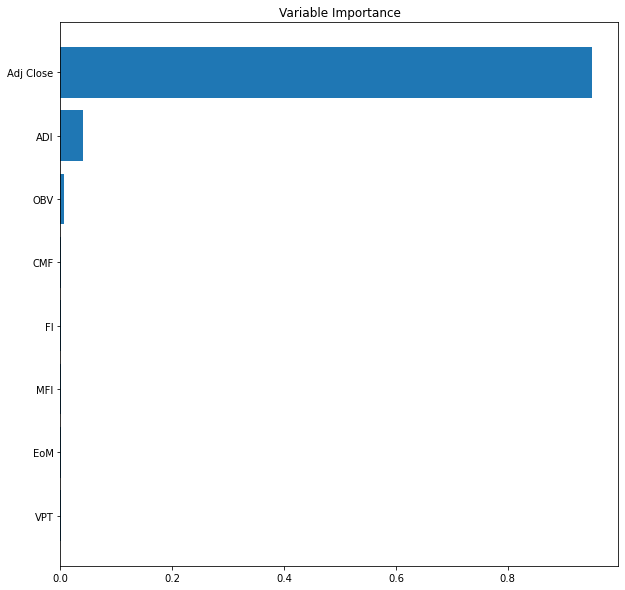

rfr Train R-Squared: 0.9989890212671918
rfr Test R-Squared: 0.9532633128674737


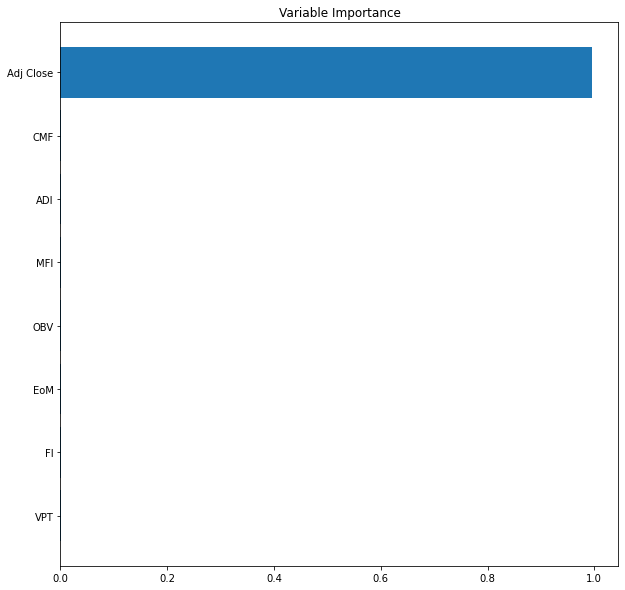

rfr Train R-Squared: 0.9990178327786811
rfr Test R-Squared: -2.07708295420167


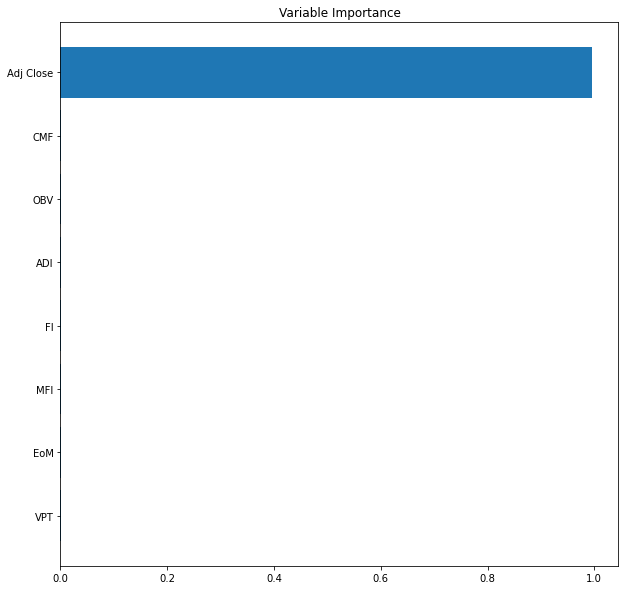

rfr Train R-Squared: 0.9997328358007574
rfr Test R-Squared: -2.6214469179277398


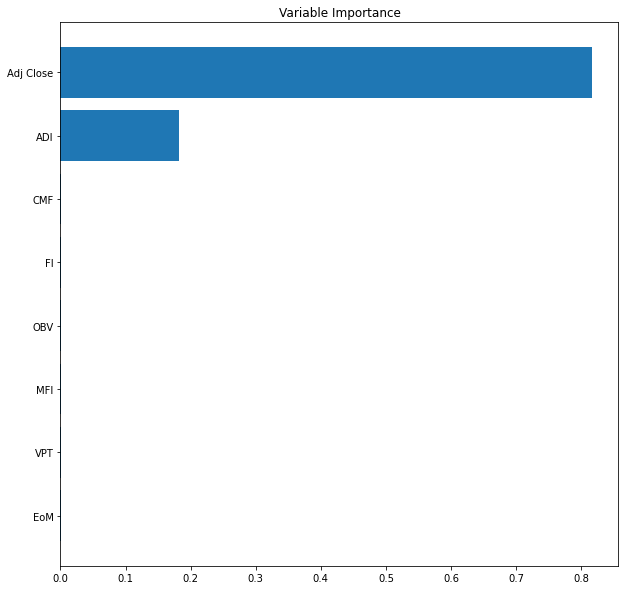

rfr Train R-Squared: 0.9998797405928397
rfr Test R-Squared: -0.965369661413275


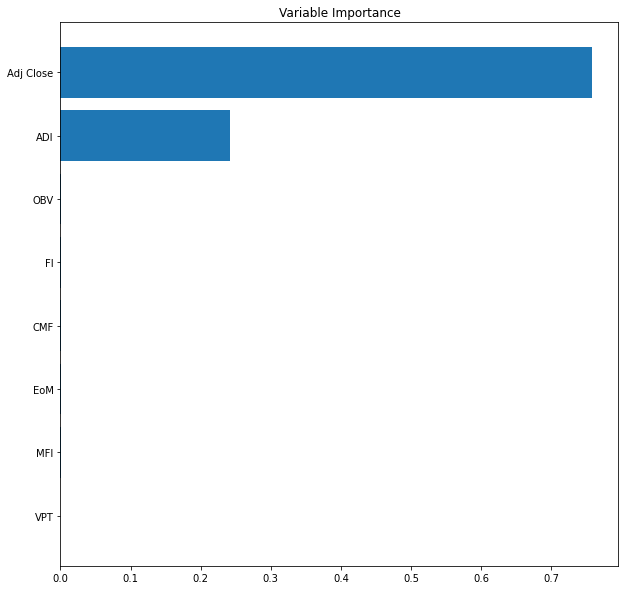

In [79]:
#Random Forest

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    
    rfr = RandomForestRegressor()
    rfr.fit(X_tr,y_tr)
    y_pred = rfr.predict(X_ts)
    train_score = rfr.score(X_tr,y_tr)
    test_score = rfr.score(X_ts,y_ts)
    print('rfr Train R-Squared:',train_score)
    print('rfr Test R-Squared:',test_score)

    rfr_imp = rfr.feature_importances_
    sorted_idx = np.argsort(rfr_imp)
    num_features = np.arange(sorted_idx.shape[0])
    plt.figure(figsize=(10,10))
    plt.barh(num_features,rfr_imp[sorted_idx],align='center')
    plt.yticks(num_features, X_train_columns[sorted_idx])
    plt.title('Variable Importance')
    plt.show()

Now let's combined the best of each into a df and see how it performs

In [85]:
df_combined = df[['Adj Close','Adj Close Shift','Stoch RSI In','WMA','Bollinger Avg','FI']]

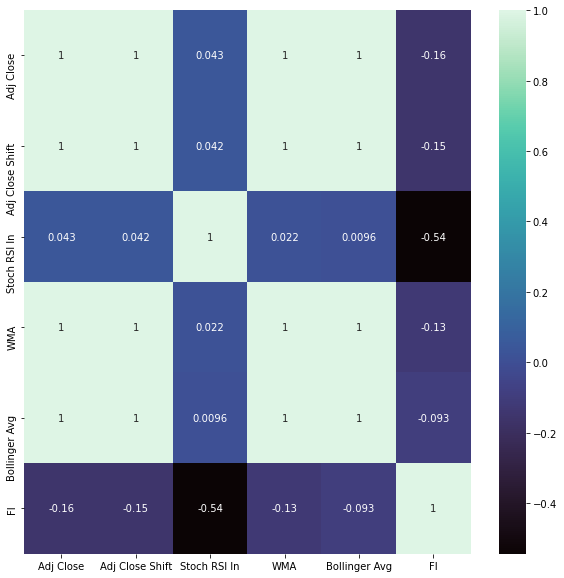

In [91]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_combined.corr(),annot=True,cmap='mako')

In [92]:
df_combined.drop(columns=['Bollinger Avg'],inplace=True)

C:\Users\Jonat\anaconda3\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [93]:
#Spliting the dta into training and testing
X = df_combined.drop(columns=['Adj Close Shift'])
y = df_combined['Adj Close Shift']
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
y_train = y[:int(X.shape[0]*0.7)]
y_test = y[int(X.shape[0]*0.7):]
X_train_columns = X_train.columns

LM Train R-Squared: 0.9954130260076114
LM Test R-Squared: 0.988853620214194


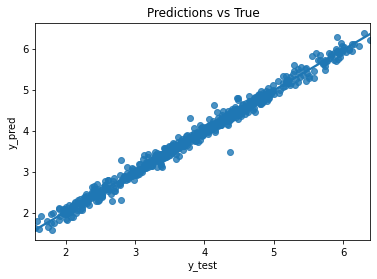

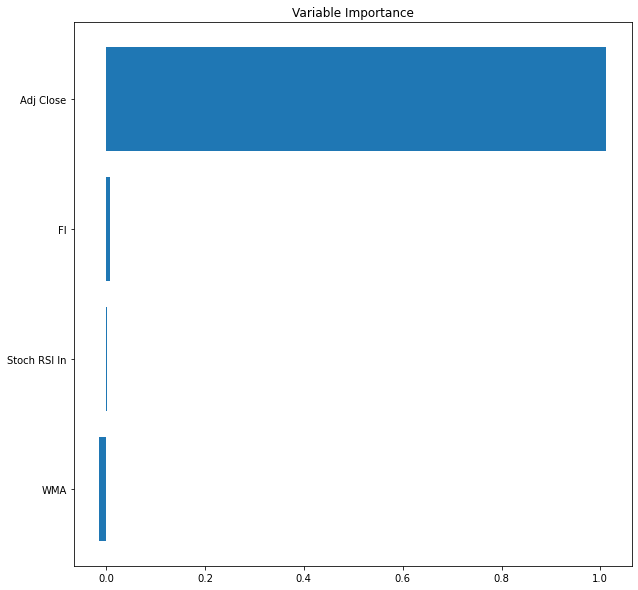

LM Train R-Squared: 0.9938889438189565
LM Test R-Squared: 0.9734737497052426


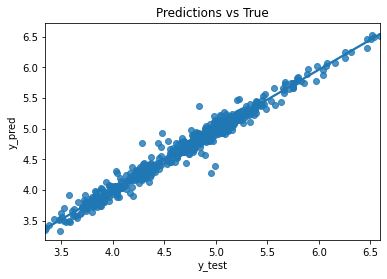

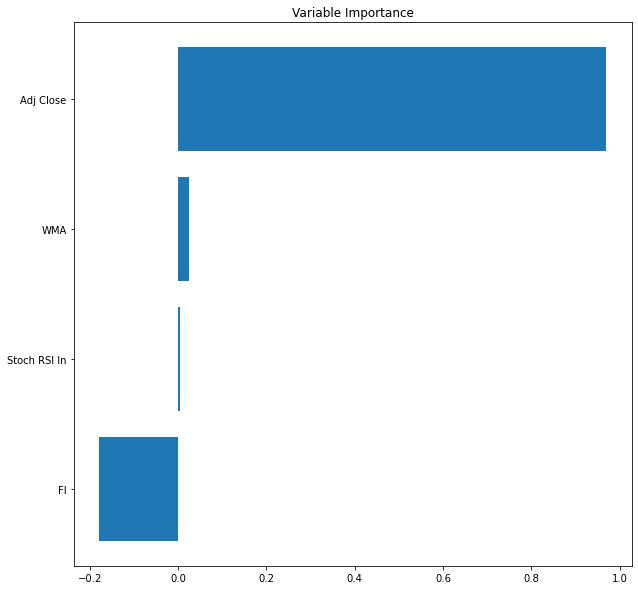

LM Train R-Squared: 0.9942445936451951
LM Test R-Squared: 0.9929664688973595


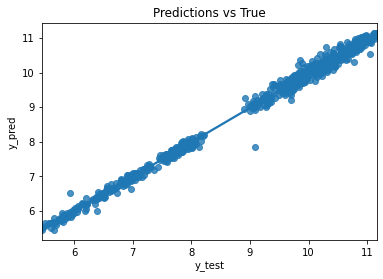

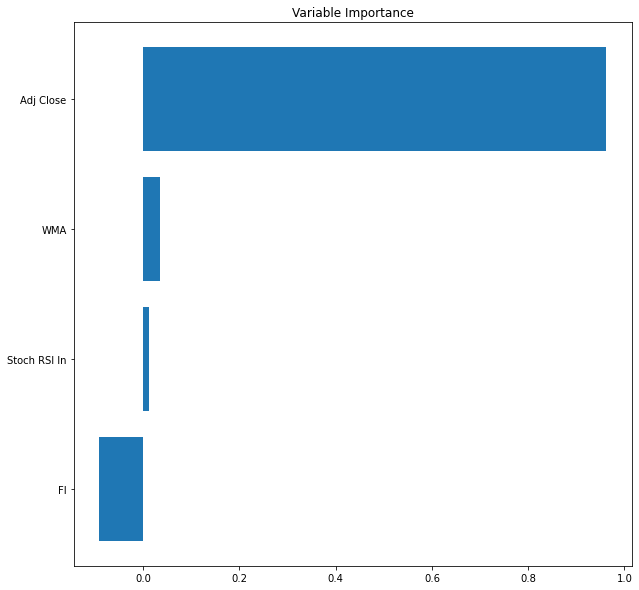

LM Train R-Squared: 0.9983384418152287
LM Test R-Squared: 0.9933194147101934


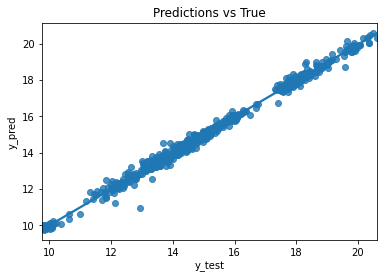

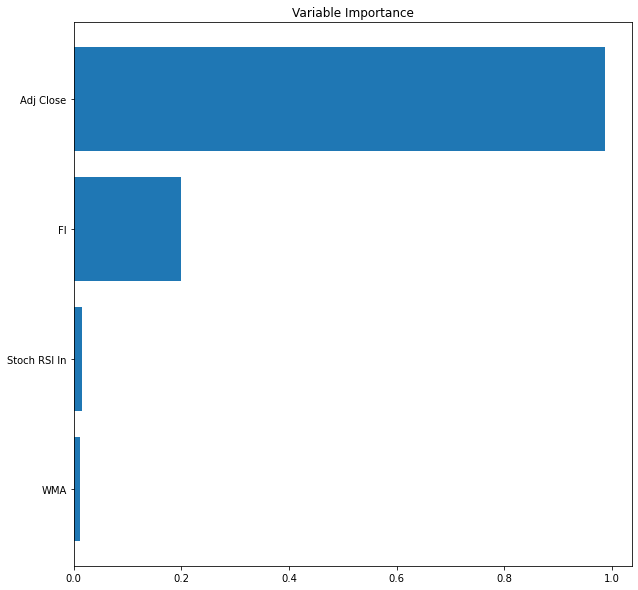

LM Train R-Squared: 0.9992280201981593
LM Test R-Squared: 0.9698069361553338


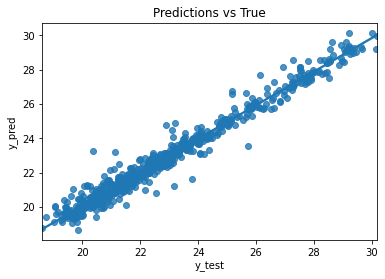

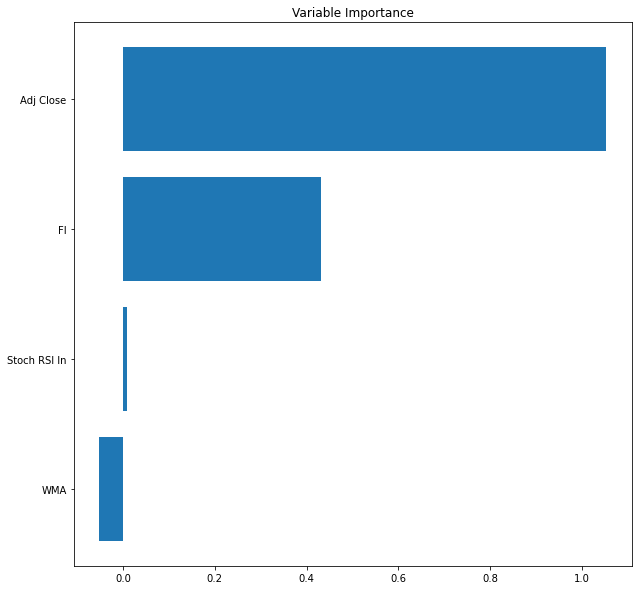

In [94]:
#OLS

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    rModel = linear_model.LinearRegression()
    rModel.fit(X_tr,y_tr)
    y_pred = rModel.predict(X_ts)
    train_score = rModel.score(X_tr,y_tr)
    test_score = rModel.score(X_ts,y_ts)
    print('LM Train R-Squared:',train_score)
    print('LM Test R-Squared:',test_score)
    sns.regplot(x=y_ts,y=y_pred)
    plt.title('Predictions vs True')
    plt.xlabel('y_test')
    plt.ylabel('y_pred')
    plt.show()
    lm_imp = rModel.coef_
    sorted_idx = np.argsort(lm_imp)
    num_features = np.arange(sorted_idx.shape[0])
    plt.figure(figsize=(10,10))
    plt.barh(num_features,lm_imp[sorted_idx],align='center')
    plt.yticks(num_features, X_train_columns[sorted_idx])
    plt.title('Variable Importance')
    plt.show()

Alpha is: 0.1
Ridge Train R-Squared: 0.9954069876507519
Ridge Test R-Squared: 0.9888609716242981


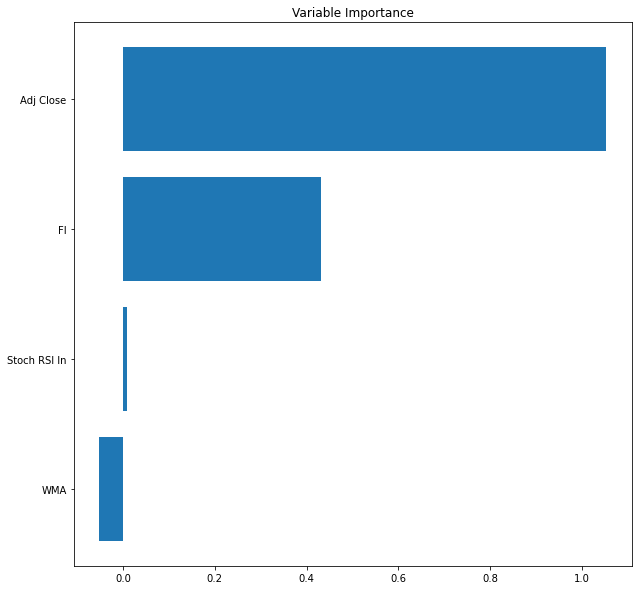

Alpha is: 1.0
Ridge Train R-Squared: 0.9952280075208877
Ridge Test R-Squared: 0.9884726022468094


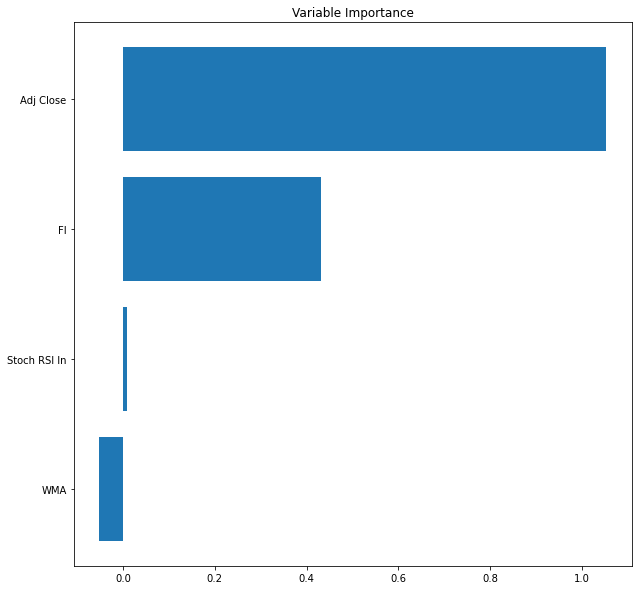

Alpha is: 10.0
Ridge Train R-Squared: 0.9947304711727326
Ridge Test R-Squared: 0.9873001832362766


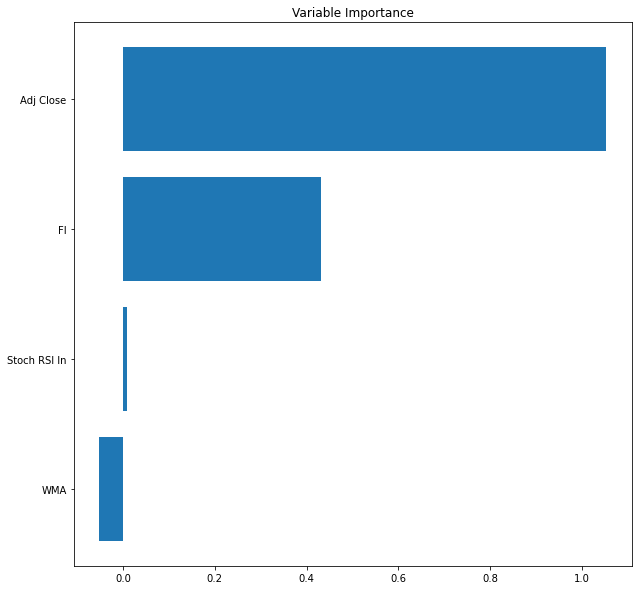

Alpha is: 0.1
Ridge Train R-Squared: 0.9938882819387984
Ridge Test R-Squared: 0.9734956641991267


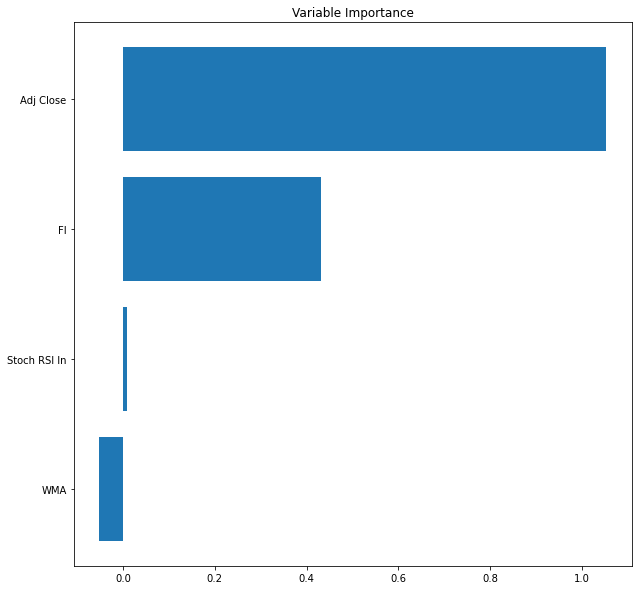

Alpha is: 1.0
Ridge Train R-Squared: 0.9938498952724746
Ridge Test R-Squared: 0.9734898157867318


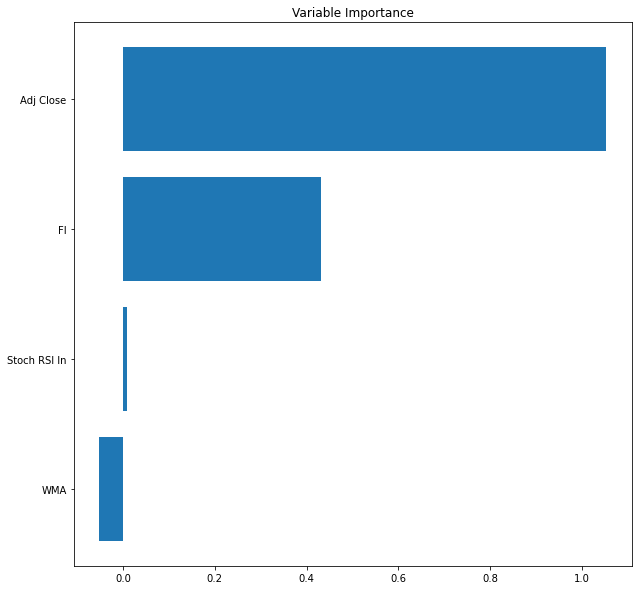

Alpha is: 10.0
Ridge Train R-Squared: 0.993397067643296
Ridge Test R-Squared: 0.9720129921558964


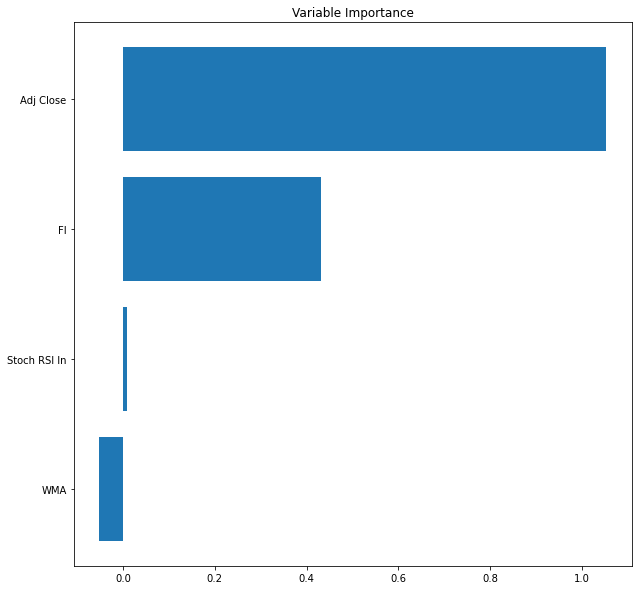

Alpha is: 0.1
Ridge Train R-Squared: 0.9942443565833672
Ridge Test R-Squared: 0.9929665751406632


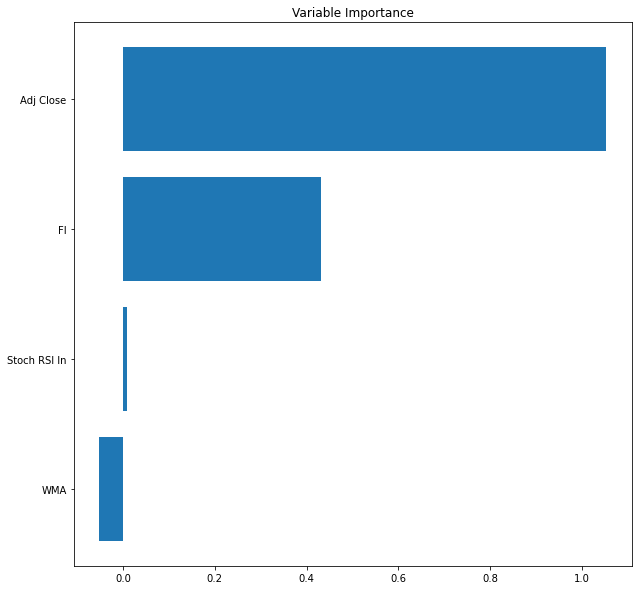

Alpha is: 1.0
Ridge Train R-Squared: 0.9942269741112592
Ridge Test R-Squared: 0.9929527891283599


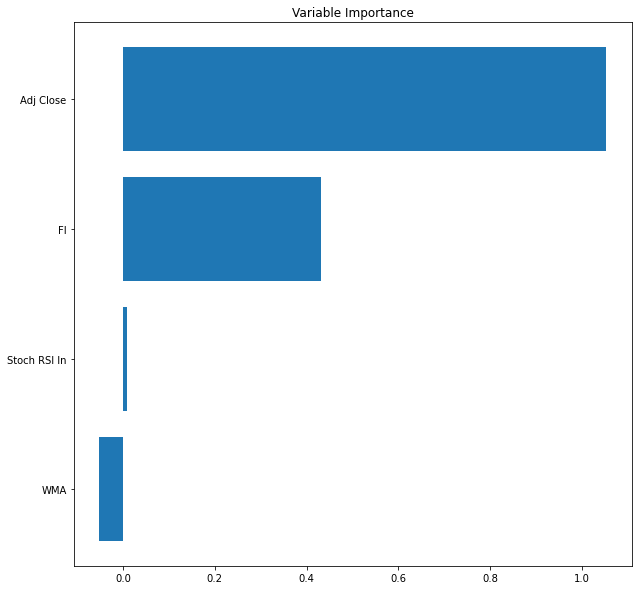

Alpha is: 10.0
Ridge Train R-Squared: 0.9939255051117587
Ridge Test R-Squared: 0.9925214241656359


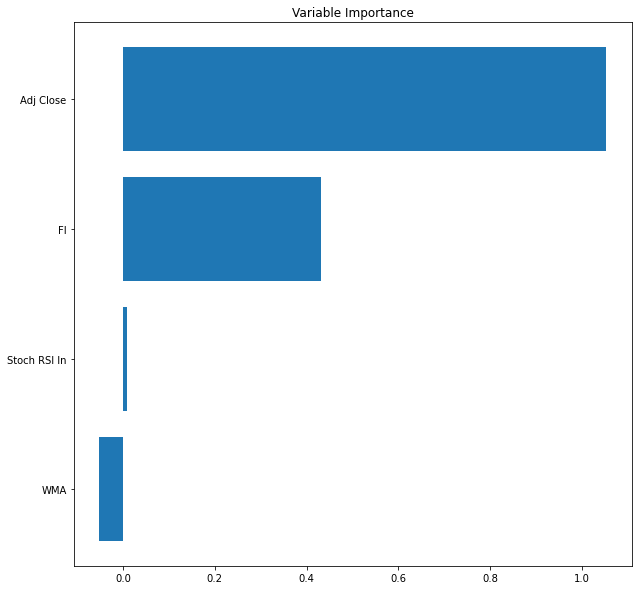

Alpha is: 0.1
Ridge Train R-Squared: 0.998338310583918
Ridge Test R-Squared: 0.9933128309392911


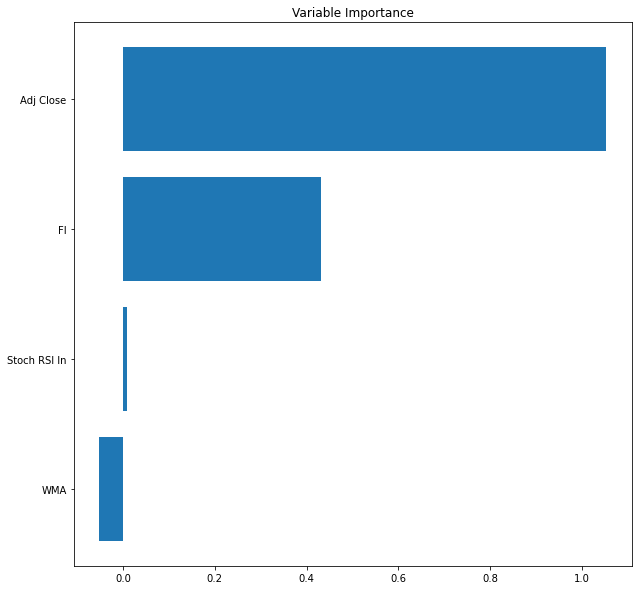

Alpha is: 1.0
Ridge Train R-Squared: 0.998335473782989
Ridge Test R-Squared: 0.9932710336753731


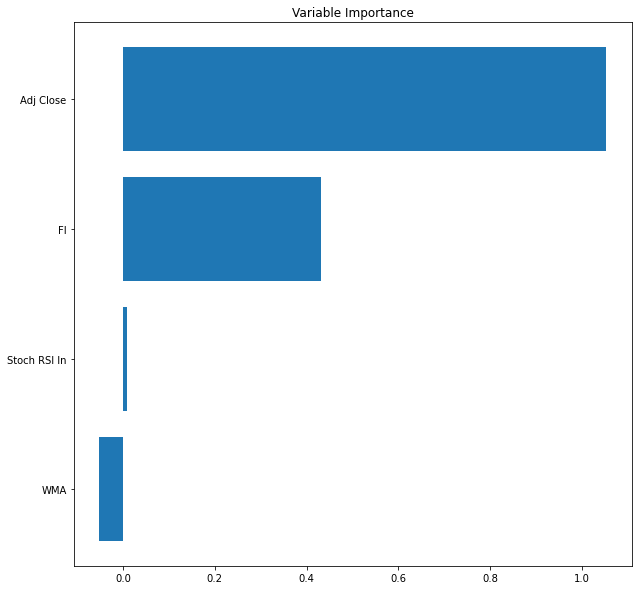

Alpha is: 10.0
Ridge Train R-Squared: 0.9982818219533833
Ridge Test R-Squared: 0.9928560181515794


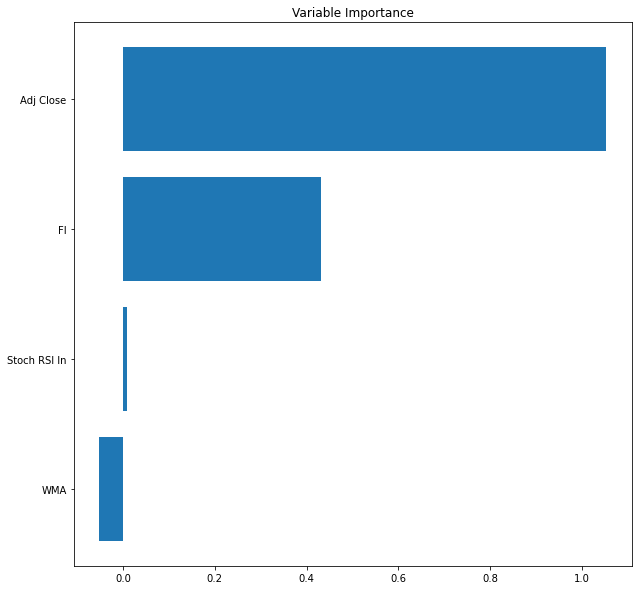

Alpha is: 0.1
Ridge Train R-Squared: 0.999227958432702
Ridge Test R-Squared: 0.9698403698245415


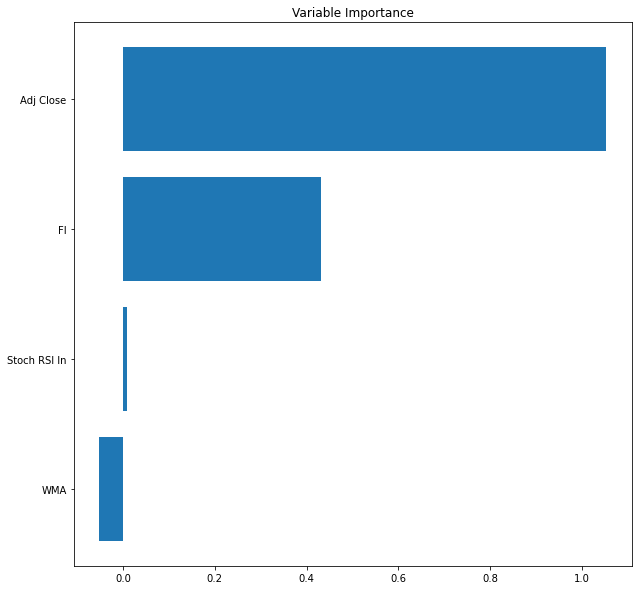

Alpha is: 1.0
Ridge Train R-Squared: 0.9992266973125816
Ridge Test R-Squared: 0.9699788174478852


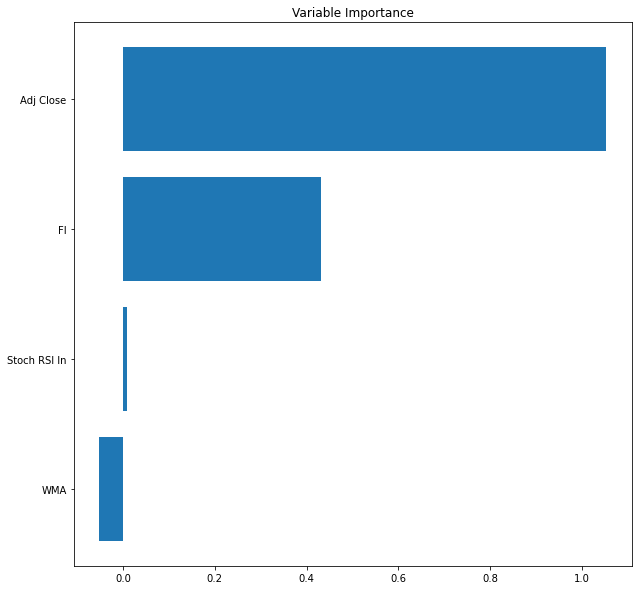

Alpha is: 10.0
Ridge Train R-Squared: 0.9992131741864226
Ridge Test R-Squared: 0.9702047841028443


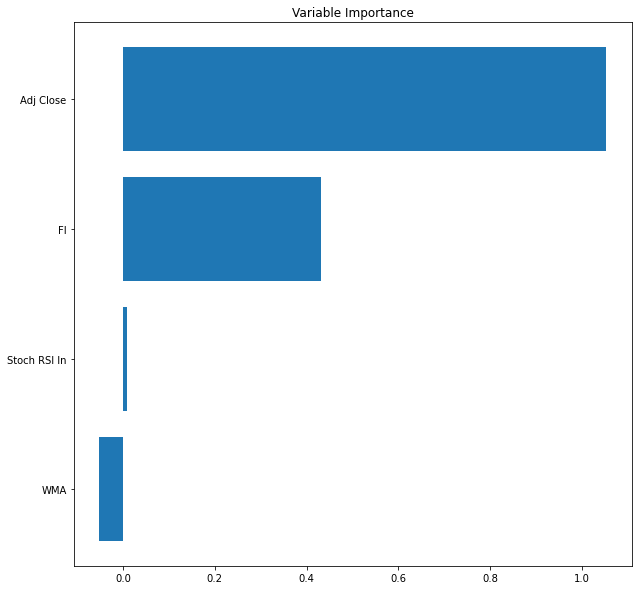

In [95]:
#Ridge Model

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    

    for alpha in [0.1, 1.0, 10.0]:
        print('Alpha is:',alpha)
        ridge_model = linear_model.Ridge(alpha)
        ridge_model.fit(X_tr,y_tr)
        ridge_train_score = ridge_model.score(X_tr,y_tr)
        ridge_test_score = ridge_model.score(X_ts,y_ts)
        print('Ridge Train R-Squared:',ridge_train_score)
        print('Ridge Test R-Squared:',ridge_test_score )
        lm_imp = rModel.coef_
        sorted_idx = np.argsort(lm_imp)
        num_features = np.arange(sorted_idx.shape[0])
        plt.figure(figsize=(10,10))
        plt.barh(num_features,lm_imp[sorted_idx],align='center')
        plt.yticks(num_features, X_train_columns[sorted_idx])
        plt.title('Variable Importance')
        plt.show()

rfr Train R-Squared: 0.9991913334207139
rfr Test R-Squared: 0.8142692216294052


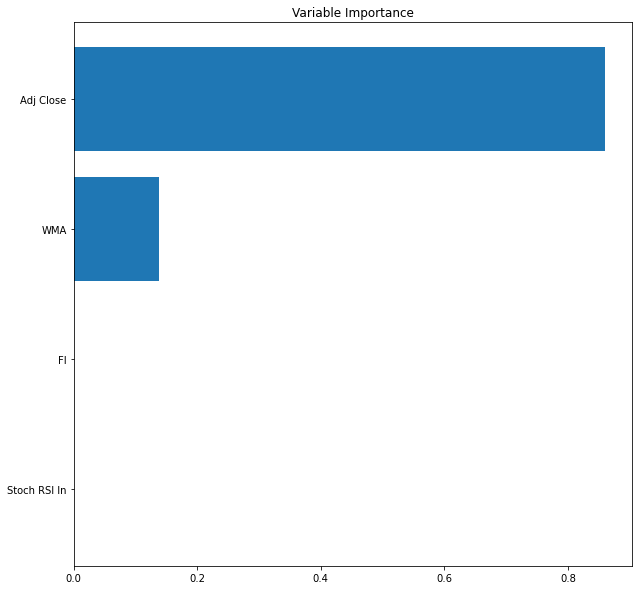

rfr Train R-Squared: 0.9989652597975974
rfr Test R-Squared: 0.9601231768661572


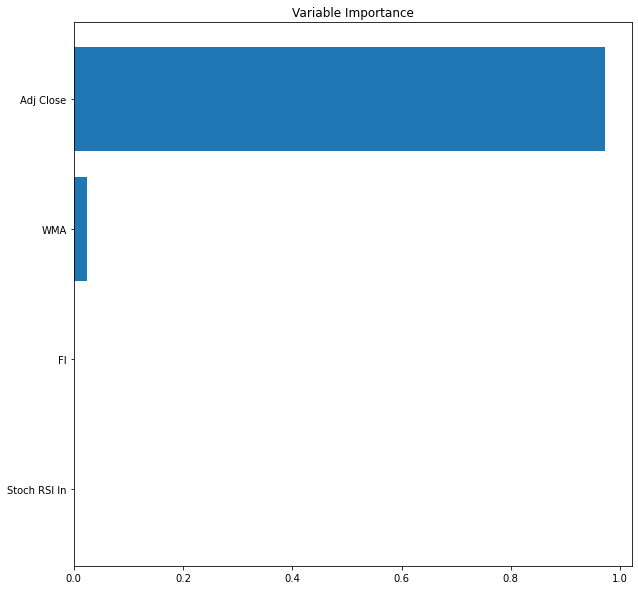

rfr Train R-Squared: 0.9990071767970302
rfr Test R-Squared: -2.1562114559127585


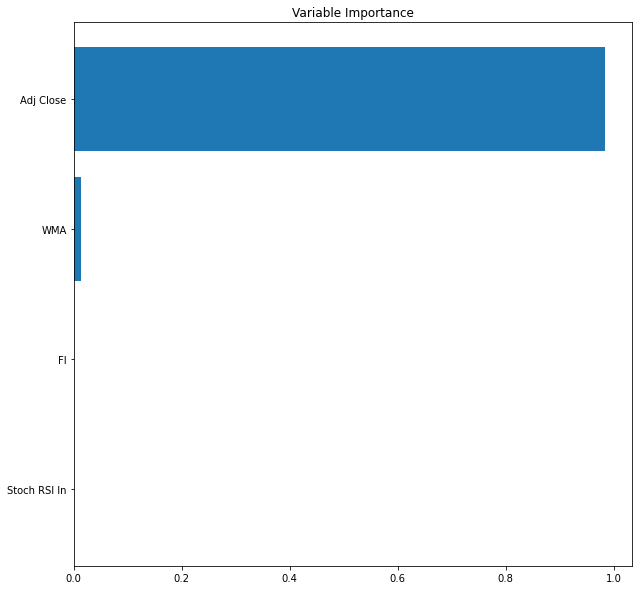

rfr Train R-Squared: 0.9997194447526403
rfr Test R-Squared: -2.3842826846676175


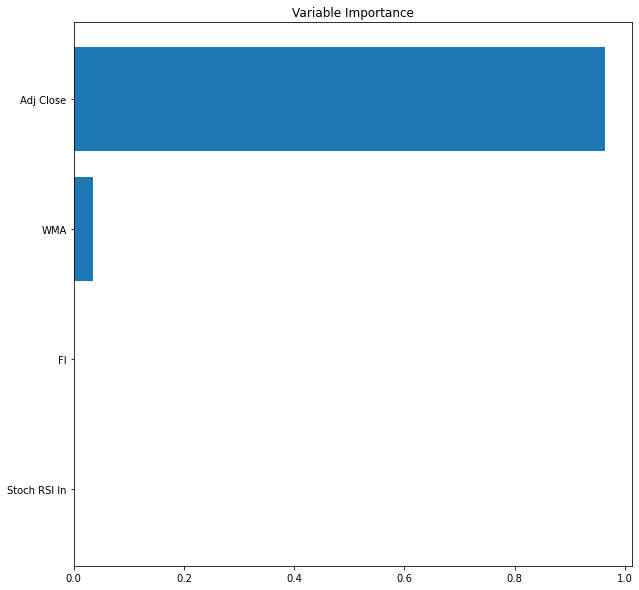

rfr Train R-Squared: 0.9998640456825341
rfr Test R-Squared: -1.0597728567595777


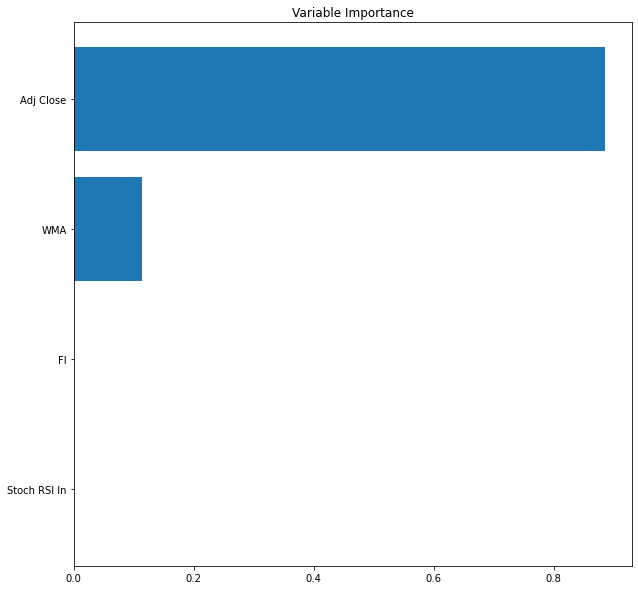

In [96]:
#Random Forest

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    
    rfr = RandomForestRegressor()
    rfr.fit(X_tr,y_tr)
    y_pred = rfr.predict(X_ts)
    train_score = rfr.score(X_tr,y_tr)
    test_score = rfr.score(X_ts,y_ts)
    print('rfr Train R-Squared:',train_score)
    print('rfr Test R-Squared:',test_score)

    rfr_imp = rfr.feature_importances_
    sorted_idx = np.argsort(rfr_imp)
    num_features = np.arange(sorted_idx.shape[0])
    plt.figure(figsize=(10,10))
    plt.barh(num_features,rfr_imp[sorted_idx],align='center')
    plt.yticks(num_features, X_train_columns[sorted_idx])
    plt.title('Variable Importance')
    plt.show()